<p style="font-size:22px;"><strong>Note:</strong> The path of all datasets can be adjusted to access the <strong>Data</strong> within the Git repository structure, but the <strong>file names must remain the same</strong>.</p>


In [12]:
import rpy2
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


# Fisher-Pitman Permutation Test for Comparison of Total SNVs, Indels, and SVs Across Tumor Types

In [5]:
%%R
library(coin)

set.seed(1234)

snv_indel_sv = read.csv('/IPMNPDAC_WGS/Data/snvindelsvTotalnb4StatTest.csv')

snv_indel_sv = snv_indel_sv[,c('tumourType', 'total_indels', 'total_SNVs', 'total_SV')]
#X = as.numeric(tmbdf$snv_indel_TMB)
A = as.factor(snv_indel_sv$tumourType)
Xsnv = as.numeric(snv_indel_sv$total_SNVs)
Xindel = as.numeric(snv_indel_sv$total_indels)
Xsv = as.numeric(snv_indel_sv$total_SV)

snvtest = oneway_test(Xsnv~A, data=snv_indel_sv,  distribution = approximate(nresample = 9999))   
indeltest = oneway_test(Xindel~A, data=snv_indel_sv,  distribution = approximate(nresample = 9999))
svtest = oneway_test(Xsv~A, data=snv_indel_sv,  distribution = approximate(nresample = 9999))
print(snvtest)
print(indeltest)
print(svtest)


	Approximative Two-Sample Fisher-Pitman Permutation Test

data:  Xsnv by A (invasive, nonInvasive)
Z = 2.8447, p-value = 0.0038
alternative hypothesis: true mu is not equal to 0


	Approximative Two-Sample Fisher-Pitman Permutation Test

data:  Xindel by A (invasive, nonInvasive)
Z = 2.5685, p-value = 0.009101
alternative hypothesis: true mu is not equal to 0


	Approximative Two-Sample Fisher-Pitman Permutation Test

data:  Xsv by A (invasive, nonInvasive)
Z = 3.3662, p-value = 3e-04
alternative hypothesis: true mu is not equal to 0



In [7]:
%%R
A

 [1] nonInvasive nonInvasive nonInvasive nonInvasive nonInvasive nonInvasive
 [7] nonInvasive nonInvasive nonInvasive nonInvasive nonInvasive nonInvasive
[13] nonInvasive nonInvasive nonInvasive nonInvasive nonInvasive nonInvasive
[19] nonInvasive nonInvasive nonInvasive nonInvasive invasive    invasive   
[25] invasive    invasive    invasive    invasive    invasive    invasive   
[31] invasive    invasive    invasive    invasive    invasive    invasive   
[37] invasive    invasive    invasive    invasive    invasive   
Levels: invasive nonInvasive


# Fig.1.B. Mutational Landscape of IPMNs and PDACs

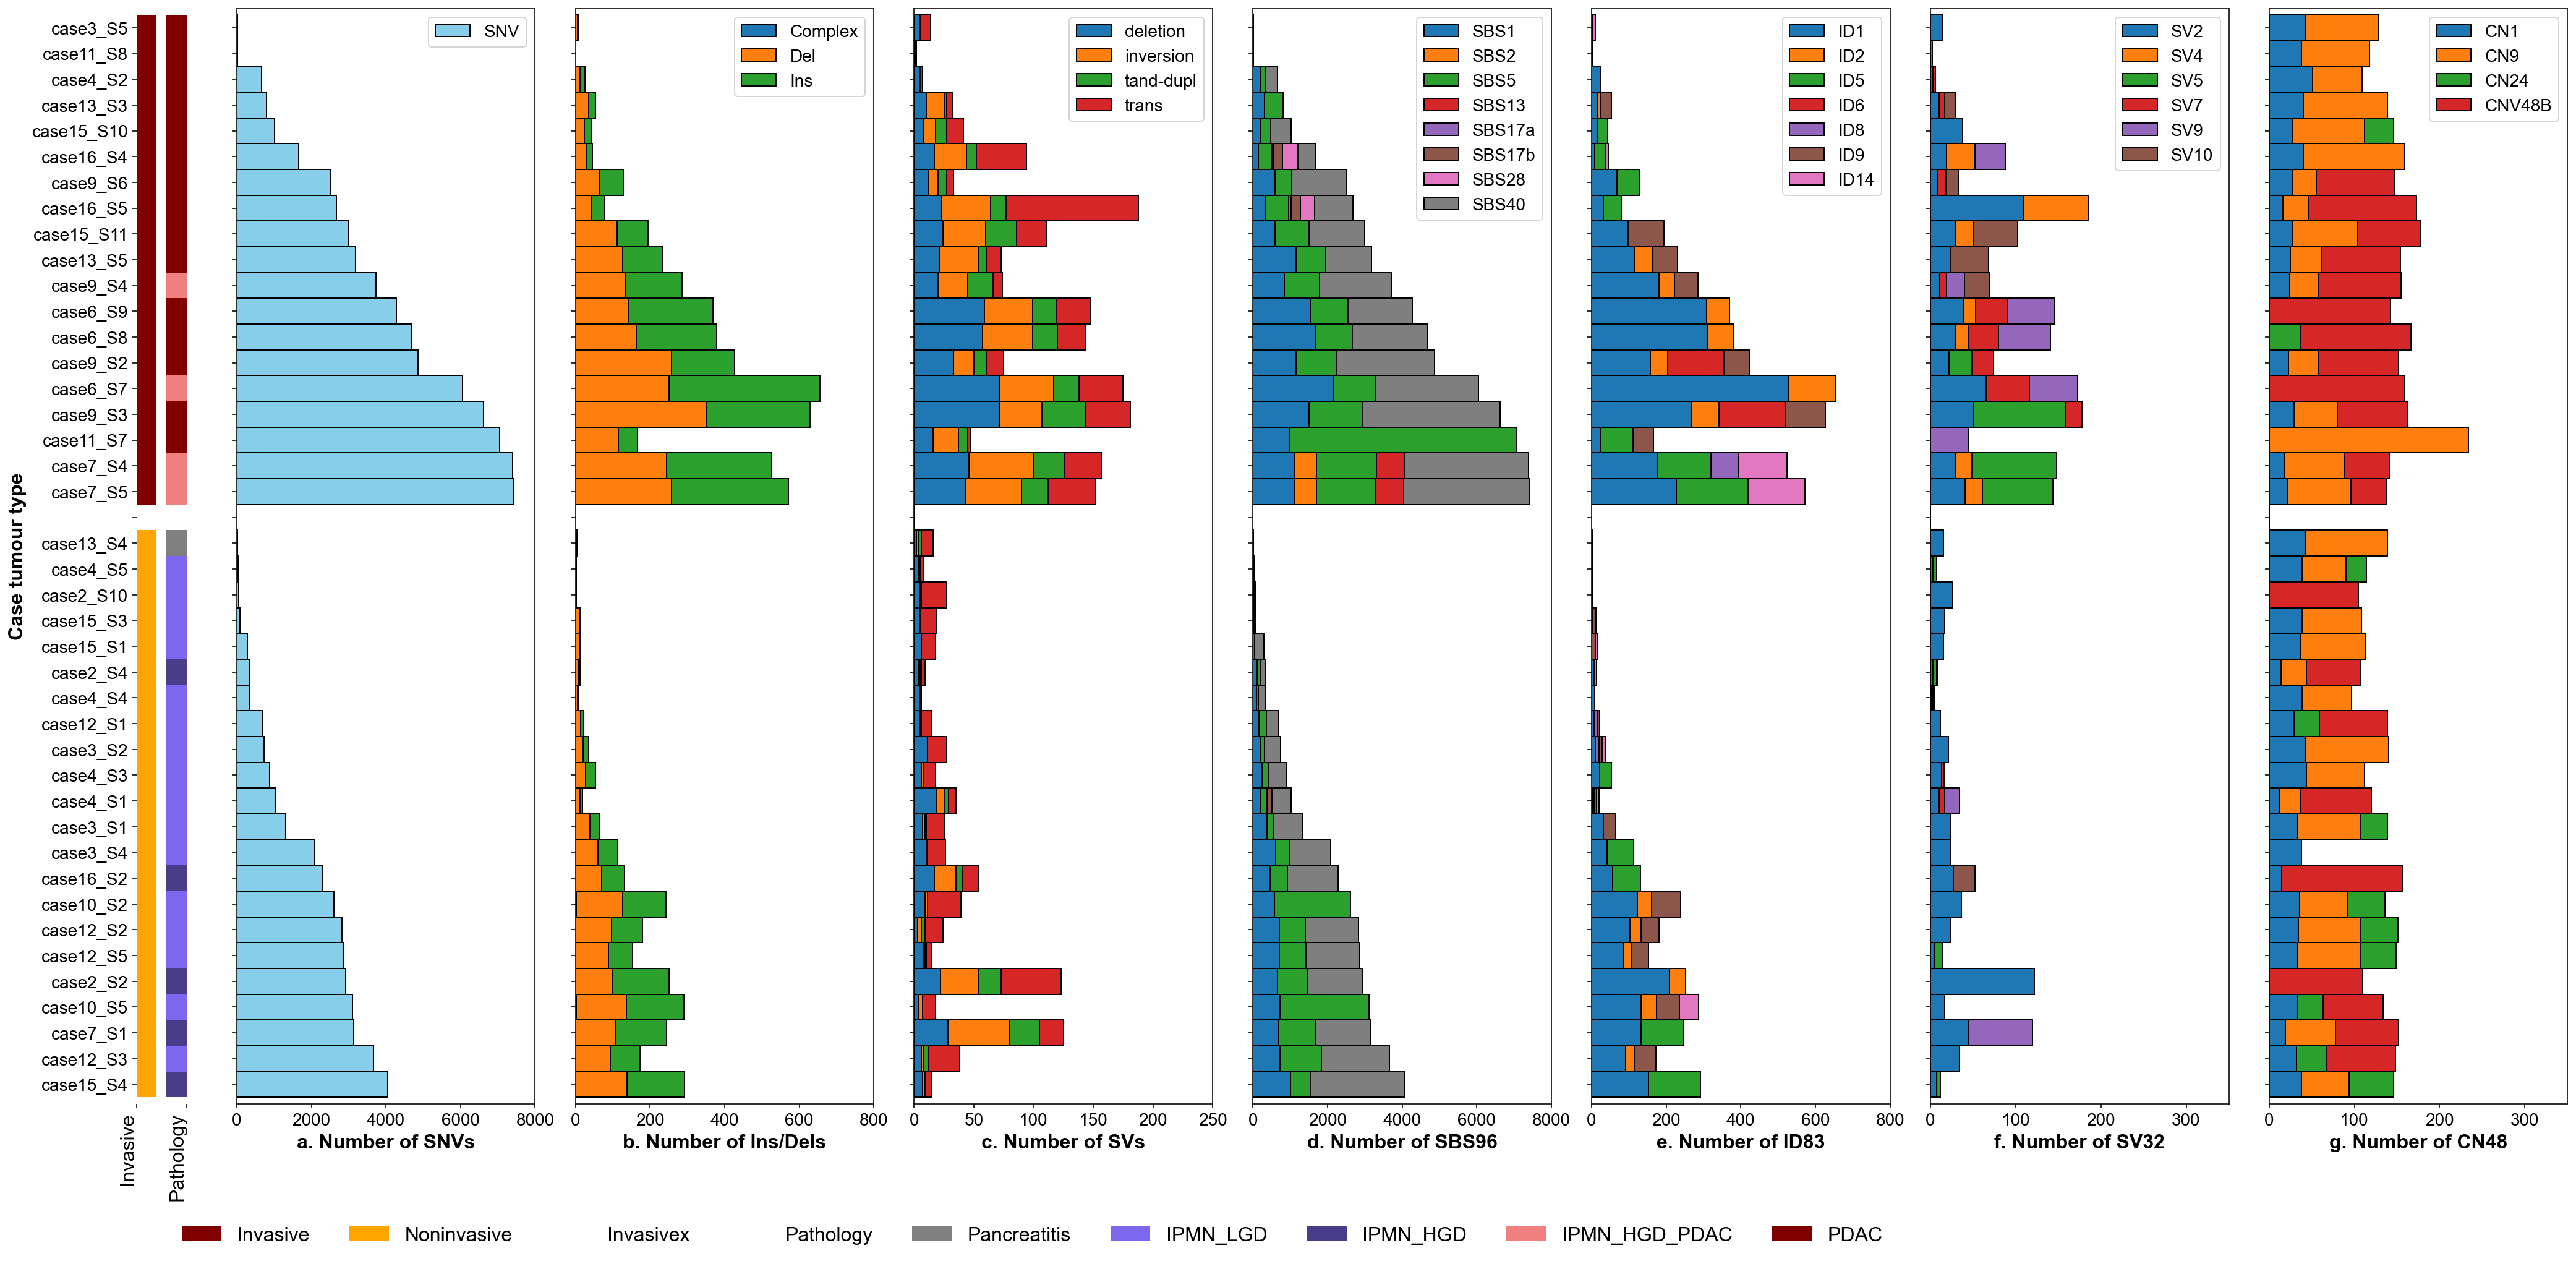

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.family'] = 'Arial'  # Affects all text elements

import shutup
shutup.please()

datapath = '/IPMNPDAC_WGS/Data/'

## 0) preparation samplelegend
dfSample = pd.read_csv(datapath + 'tumorTypetemplate.csv')

## 1) preparation SNV
plotSNV = pd.read_csv(datapath + '41samplesSNVNumberBarPlot.csv')

## 2) preparation indels  
plotIndel = pd.read_csv(datapath + 'total41NumberIntersectIndels.csv')
plotIndel['typeTumorSample'] = [x[3:] for x in plotIndel.typeTumosample]

## 3) preparation SVs 
plotBrass = pd.read_csv(datapath + 'total41NumberBrass.csv')
plotBrass = plotBrass.rename(columns = {'tandem-duplication':'tand-dupl', 'translocation':'trans'})
plotBrass['typeTumorSample'] = [x[3:] for x in plotBrass.typeTumorSample]

## 4) SBS96 preparation  
plotsbsig = pd.read_csv(datapath + '41sbsigReorder.csv')
plotsbsig['typeTumorSample'] = [x[3:] for x in plotsbsig.typeTumorSample]

## 5) ID signature   
plotidsig = pd.read_csv(datapath + '41idsigReorder.csv')
plotidsig['typeTumorSample'] = [x[3:] for x in plotidsig.typeTumorSample]

## 6) SV signature
plotsvsig = pd.read_csv(datapath +'41samplesSVsigNbBarPlot.csv')

## 7) CN signature read in and preparation 
plotCNsig = pd.read_csv(datapath + '41cnsigReorder.csv')
plotCNsig['typeTumorSample'] = [x[3:] for x in plotCNsig.typeTumorSample]

## 8) plot 
fig, axes = plt.subplots(1, 8, figsize=(30, 15), dpi=144, 
                         gridspec_kw={'width_ratios': [0.2,1,1,1,1,1,1,1]},sharey=True) #adjuct te width
plt.subplots_adjust(wspace = 0.15,bottom=0.15, right=0.98, top=0.97,left=0.07) #hspace

dfSample.plot(ax=axes[0],
               x = 'typeTumorSample',
               kind = 'barh', 
               stacked = True,            
               mark_right = True,
               color={'Invasive': 'maroon', 'Noninvasive': 'orange',
               'Pancreatitis': 'gray', 'IPMN_LGD': 'mediumslateblue',
               'IPMN_HGD': 'darkslateblue','Invasivex':'white', 'Pathology':'white',
               'IPMN_HGD_PDAC': 'lightcoral', 'PDAC': 'maroon'},
                width=1.0)

axes[0].set_ylabel('Case tumour type',fontsize=16,weight='bold')
axes[0].tick_params(axis='y', labelsize=14)
axes[0].set_xlim(0, 3)
axes[0].set_xticklabels(['Invasive', 'Pathology'], rotation=90, horizontalalignment='right',fontsize=16)
axes[0].set_frame_on(False)
axes[0].legend(loc="upper center")
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles, labels, loc='center', bbox_to_anchor=(15,-0.12), ncol=9,frameon=False,fontsize=16)
#############
plotSNV.plot(ax=axes[1], 
             kind = 'barh',
             color ='skyblue',
             edgecolor = "black",
             width = 1.0)
axes[1].set_xlabel('a. Number of SNVs',fontsize=16,weight='bold')
axes[1].tick_params(axis='x', labelsize=14)
axes[1].set_xlim(0, 8000)
axes[1].legend(fontsize=14, frameon=False)

#########################
plotIndel.plot(ax=axes[2],
            x = 'typeTumosample',
            kind = 'barh', 
            stacked = True,            
            mark_right = True,
            edgecolor = "black",
            width=1.0)
axes[2].set_xlabel('b. Number of Ins/Dels',fontsize=16,weight='bold')
axes[2].tick_params(axis='x', labelsize=14)
axes[2].set_xlim(0, 800)
axes[2].legend(fontsize=14,frameon=False)
#########################
plotBrass.plot(ax=axes[3],
               x = 'typeTumorSample',
               kind = 'barh', 
               stacked = True,            
               mark_right = True,
               edgecolor = "black",
               width=1.0)
axes[3].set_xlabel('c. Number of SVs',fontsize=16, weight='bold')
axes[3].tick_params(axis='x', labelsize=14)
axes[3].set_xlim(0, 250)
axes[3].legend(fontsize=14,frameon=False)
########################
plotsbsig.plot(ax=axes[4],
               x = 'typeTumorSample',
               kind = 'barh', 
               stacked = True,            
               mark_right = True,
               edgecolor = "black",
               width=1.0)
axes[4].set_xlabel('d. Number of SBS96',fontsize=16, weight='bold')
axes[4].tick_params(axis='x', labelsize=14)
axes[4].set_xlim(0, 8000)
axes[4].legend(fontsize=14, frameon=False)
#######################
plotidsig.plot(ax=axes[5],
               x = 'typeTumorSample',
               kind = 'barh', 
               stacked = True,            
               mark_right = True,
               edgecolor = "black",
               width=1.0)
axes[5].set_xlabel('e. Number of ID83',fontsize=16, weight='bold')
axes[5].tick_params(axis='x', labelsize=14)
axes[5].set_xlim(0, 800)
axes[5].legend(fontsize=14, frameon=False)
#########################
plotsvsig.plot(ax=axes[6],
               x = 'typeTumorSample',
               kind = 'barh', 
               stacked = True,            
               mark_right = True,
               edgecolor = "black",
               width=1.0)
axes[6].set_xlabel('f. Number of SV32',fontsize=16, weight='bold')
axes[6].tick_params(axis='x', labelsize=14)
axes[6].set_xlim(0, 350)
axes[6].legend(fontsize=14, frameon=False)

#######################
plotCNsig.plot(ax=axes[7],
               x = 'typeTumorSample',
               kind = 'barh', 
               stacked = True,            
               mark_right = True,
               edgecolor = "black",
               width=1.0)
axes[7].set_xlabel('g. Number of CN48',fontsize=16, weight='bold')
axes[7].tick_params(axis='x', labelsize=14)
axes[7].set_xlim(0, 350)
axes[7].legend(fontsize=14, frameon=False)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
plt.show();

# Fig.1C. Heatmap and Bar Chart: Genomic Analysis of Driver Genes

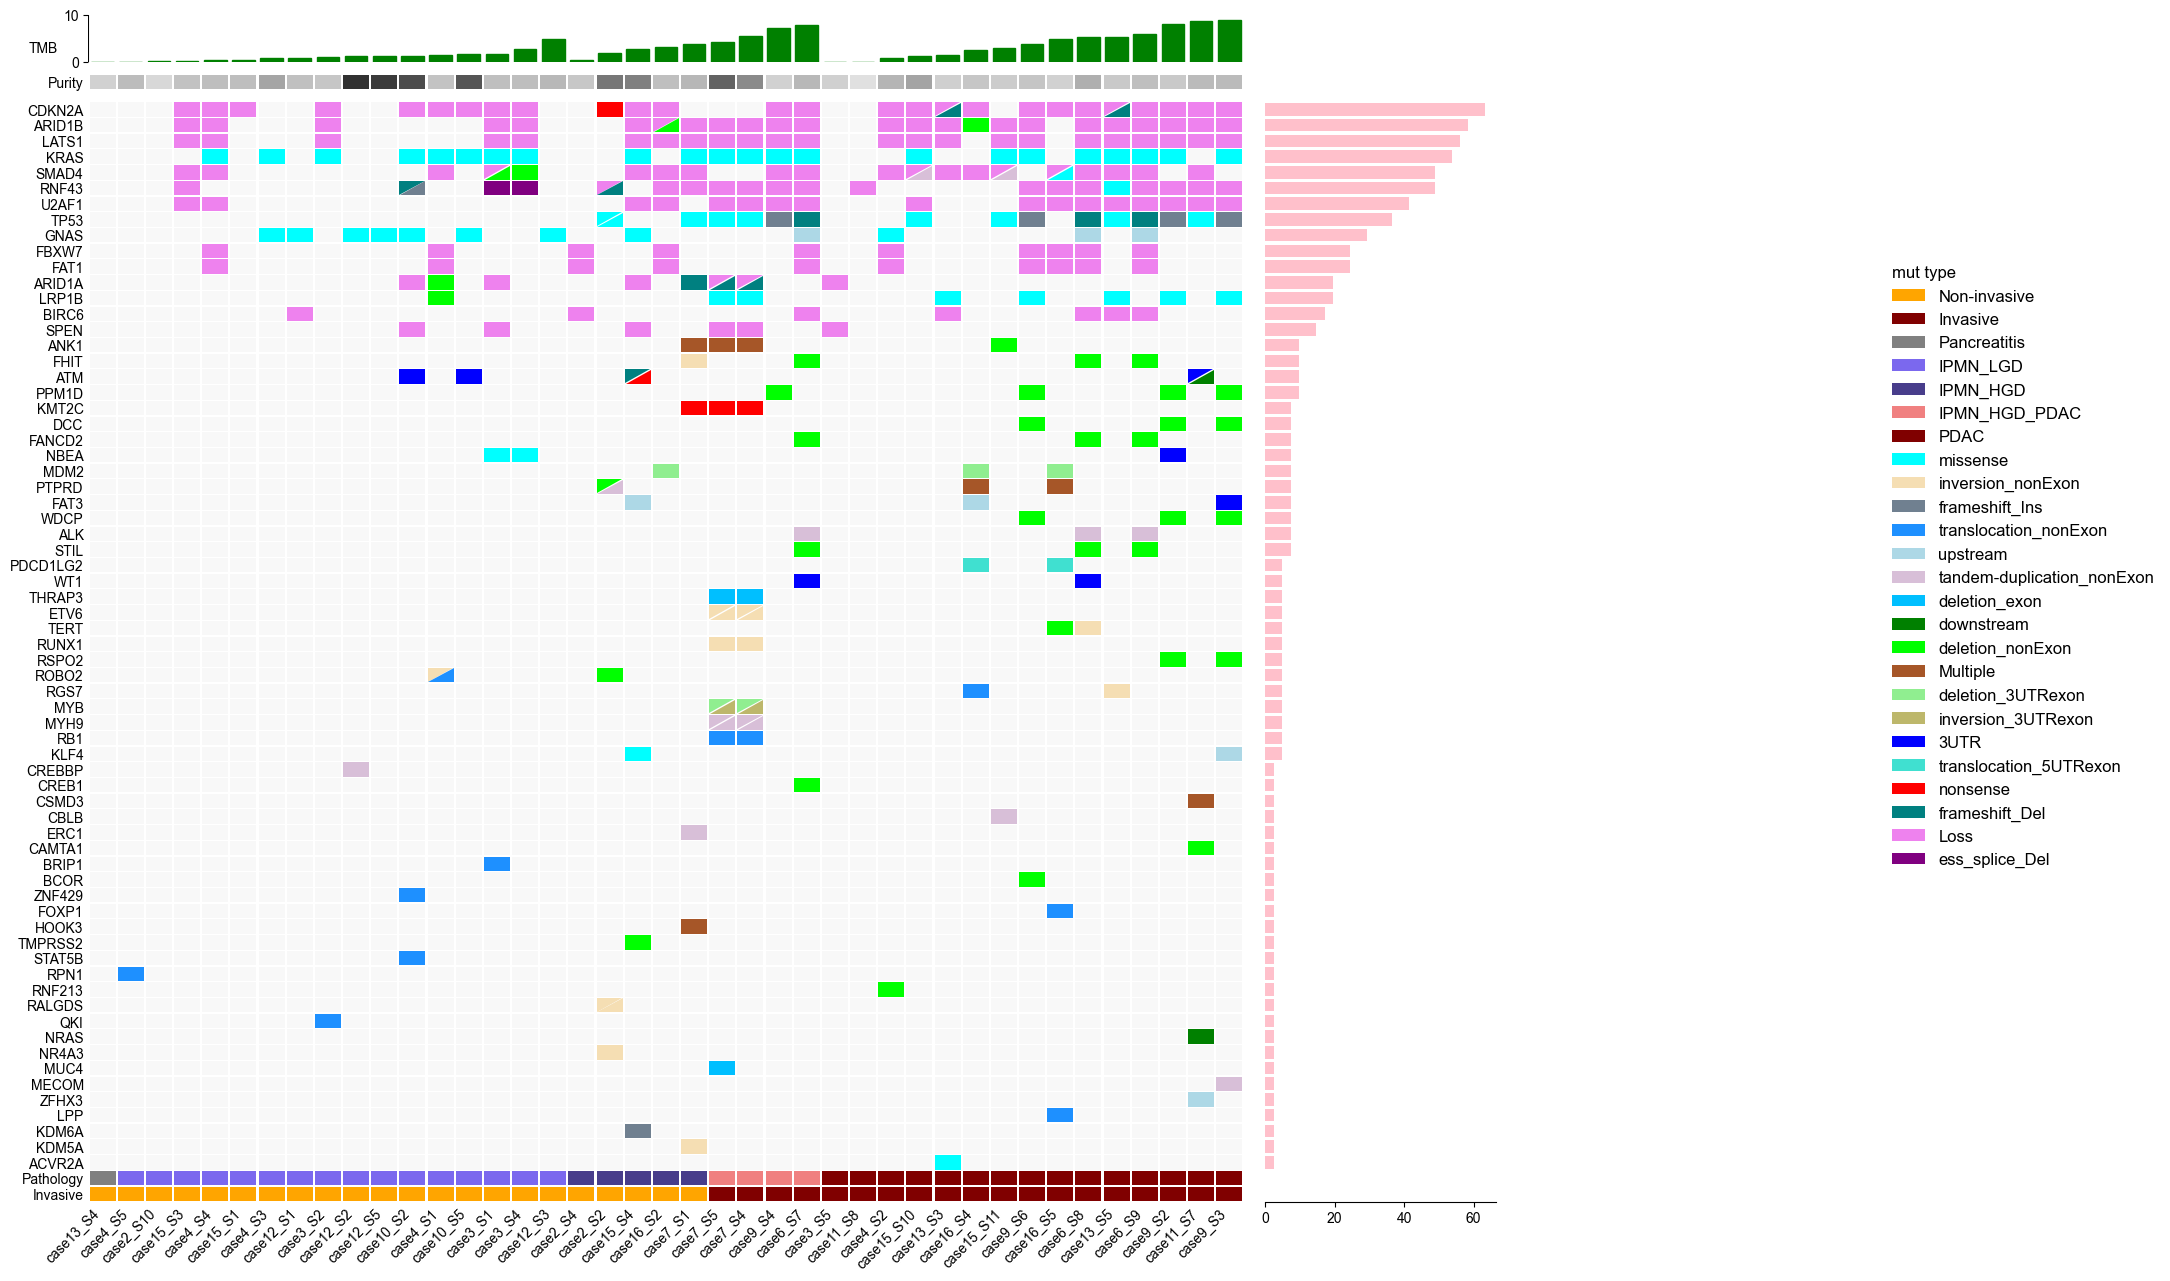

In [1]:
import os
import pandas as pd
import comuta 
#changed line 996 from new_cats = side_cats - paired_cats to new_cats = list(side_cats - paired_cats) 
#changed line 1002 from  missing_categories = paired_cats - side_cats to  missing_categories = list(paired_cats - side_cats)
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.family'] = 'Arial'  # Affects all text elements

driverheatmappath = '/IPMNPDAC_WGS/Data/'

# 1) Data processing
# 1a) read in snv-indel-brass-cnv data
drivermutsDf = pd.read_csv(driverheatmappath + '41sampleDriverAllmutsDirectHeatmap.csv')
drivermutsDf = drivermutsDf.query('value != "Silent"') 

# 1b) read in TMB data
tmbDf = pd.read_csv(driverheatmappath + 'tmbdf4driverheatmapPlot.csv')
sampleTumourTMBorderList = list(tmbDf ['sample'])

# 1.c) TMB data for top bar
tmbdf = pd.read_csv(driverheatmappath + '41sampleTMBdirectHeadmap.csv')

# 1d) read in purity data
cellularityDf = pd.read_csv(driverheatmappath + '41samplesCellularity4alldriverMutsHeatmap.csv')

# 1e) read in bar data
sidebarDf = pd.read_csv(driverheatmappath + '41sample_side_bar_data4alldrivermutsheatmap.csv')

category_order = list(sidebarDf.category)
sampleOrderForlabel = sampleTumourTMBorderList

###################################################################
mut_mapping = {'deletion_3UTRexon': 'lightgreen',
               'deletion_exon': 'deepskyblue',
               'deletion_nonExon': 'lime',
               'inversion_3UTRexon': 'darkkhaki',
               'inversion_nonExon': 'wheat',
               'tandem-duplication_nonExon':'thistle',
               'translocation_5UTRexon': 'turquoise',
               'translocation_nonExon': 'dodgerblue','Loss':'violet',
               'Invasive': 'maroon', 'Non-invasive': 'orange',
               'Pancreatitis': 'gray', 'IPMN_LGD': 'mediumslateblue',
               'IPMN_HGD': 'darkslateblue',
               'IPMN_HGD_PDAC': 'lightcoral', 'PDAC': 'maroon',
               'downstream': 'green', '3UTR': 'blue', 'nonsense': 'red',
               'ess_splice_Del': "purple", 'frameshift_Del': "teal",
               'frameshift_Ins': "slategray", 'upstream': 'lightblue',
               'missense': 'cyan',
               #'Silent': 'orange',
               '0.0_0.0': {'facecolor': 'grey', 'alpha': 0.05},
               'Absent': {'facecolor': 'grey', 'alpha': 0.05}}

##################################################################
# 2) plot
# 2a) plot heatmap
toy_comut = comuta.CoMut()
# add indicator, can add this after toy_comut.add_categorical_data, but plot on top
indicator_kwargs = {'color': 'red', 'marker': 'o',
                    'linewidth': 1, 'markersize': 5}
                     
toy_comut.add_categorical_data(drivermutsDf, name='mut type',
                               mapping=mut_mapping,
                               category_order=category_order)

# 2b) plot sidebar
side_mapping = {'mutnb': 'pink'}
bar_kwargs = {'height': 0.8}
toy_comut.add_side_bar_data(sidebarDf, 
                            paired_name ='mut type', 
                            name='MutFq',
                            mapping =side_mapping, 
                            position ='right', bar_kwargs=bar_kwargs)

## 2c) plot cellularity
cat_mapping = {'Absent': {'facecolor': 'red'}}
value_range = (0, 1)
toy_comut.add_continuous_data(cellularityDf, 
                              name = 'Purity', 
                              mapping = 'gray_r', 
                              cat_mapping = cat_mapping, value_range = value_range)

# 2d) plot tmb bar
bar_mapping = {'Nonsynonymous': 'green', 'Synonymous': 'pink'}
bar_kwargs = {'width': 0.8, 'edgecolor': 'green'}

toy_comut.add_bar_data(tmbDf, name = 'Mutation burden', mapping = bar_mapping,  bar_kwargs = bar_kwargs)
                       #ylabel = 'Muts/Mb')

toy_comut.plot_comut(figsize=(16, 12), x_padding=0.04,hspace =0.03, 
                     wspace = 0.03, y_padding=0.04, tri_padding=0.03)

toy_comut.axes['Mutation burden'].set_ylabel('TMB', rotation = 'horizontal', 
                                             ha = 'right', va = 'center', y = 0.3)
toy_comut.axes['Mutation burden'].set_ylim(ymin=0, ymax=10)
toy_comut.axes['Mutation burden'].axvline(0, color='black')
#toy_comut.axes['mut type'].set_xlabel('xt', rotation = 45)
toy_comut.axes['mut type'].set_xticklabels(labels=sampleOrderForlabel,rotation = 45,horizontalalignment='right')

custom_rcParams = {'font.size': 12}
rcParams.update(custom_rcParams)
toy_comut.add_unified_legend(bbox_to_anchor = (1.8, -4))
#toy_comut.add_unified_legend()
plt.subplots_adjust(bottom=0.001, right=0.9, top=0.99,left=0.02);
plt.savefig(driverheatmappath + 'driverHeatMap.png', dpi=300, bbox_inches='tight')

# Fisher-Pitman Permutation Test for Comparison of SV Numbers Between Trees with Single and Multiple Branches

In [22]:
%%R
library("coin")
library(stringr)

set.seed(123)
df = read.csv('/IPMNPDAC_WGS/Data/SV_multiple_single_branches.csv')
X = as.numeric(df$Total)
A = as.factor(df$samples)
z = oneway_test(X~A, data=df,  distribution = approximate(nresample = 9999))
z


	Approximative Two-Sample Fisher-Pitman Permutation Test

data:  X by A (multipleBarnches, singleBranch)
Z = 3.0075, p-value = 0.0024
alternative hypothesis: true mu is not equal to 0



# Fig.2B. Boxplot of SV Counts in Trees with Single versus Multiple Branches

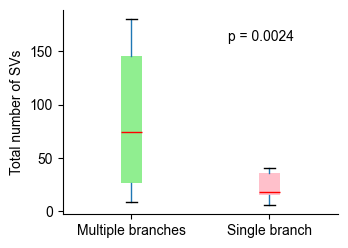

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import rcParams

rcParams['font.family'] = 'Arial'

svpath = '/IPMNPDAC_WGS/Data/'

svdf = pd.read_csv(svpath + '36treeSampleSV.csv')
multipleBranch = ['case10','case3','case16','case2','case9','case7','case6']
singleBranch = ['case4','case12','case13', 'case15']

mb_sv = svdf[svdf['samples'].str.contains('|'.join(multipleBranch))][["Total"]]
mb_sv.insert(0, 'samples', ['multipleBarnches']*mb_sv.shape[0])
sb_sv = svdf[svdf['samples'].str.contains('|'.join(singleBranch))][["Total"]]
sb_sv.insert(0, 'samples', ['singleBranch']*sb_sv.shape[0])
dfplot = pd.concat([mb_sv, sb_sv])

dfplot.to_csv(svpath + "SV_multiple_single_branches.csv", index=0)

boxpps = dict(linestyle='-', linewidth=0, color='r')
medianpps = dict(linestyle='-', linewidth=1, color='r')
        
ax = dfplot.boxplot(by='samples',  medianprops=medianpps, 
                    boxprops=boxpps,rot=0, grid=False, showfliers=False,
                    layout=(2,5), fontsize=10, return_type='both',figsize=(20,6),
                    patch_artist = True)
                
colors = ['lightgreen',  'pink' ]
for row_key, (ax, row) in ax.items():
    ax.set_title('')
    ax.set_ylabel("Total number of SVs")
    ax.set_xlabel("")
    ax.set_xticklabels(["Multiple branches", "Single branch"])
    #ax.set_yticklabels("")
    ax.text(1.7, 160, 'p = 0.0024', fontsize=10)
    for i,box in enumerate(row['boxes']):
        box.set_facecolor(colors[i])
        
plt.title('')
plt.suptitle('')
plt.xticks([] )
plt.yticks([])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
    
ipmn_patch = mpatches.Patch(color='lightgreen', label='IPMN')
pdac_patch = mpatches.Patch(color='pink', label='PDAC')
plt.legend(handles=[ipmn_patch, pdac_patch], loc='best', frameon=False)

plt.show()

# Fig.S1C. Specific Copy Number Alterations (CNAs) in IPMN and IPMN-Derived PDACs

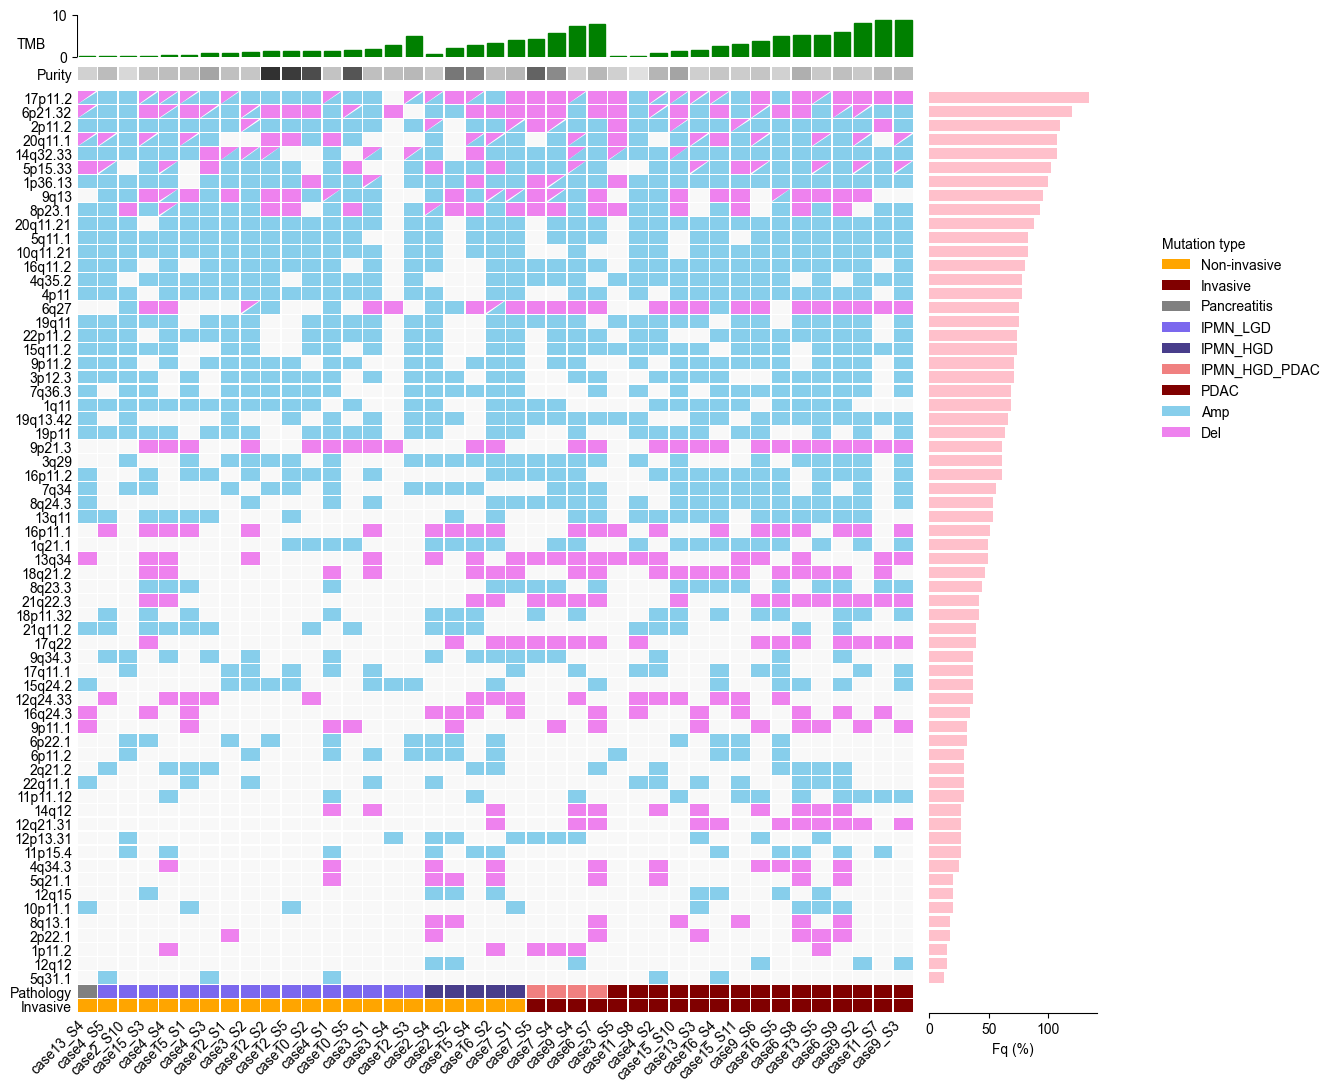

In [1]:
import os
import numpy as np
import pandas as pd
import comuta
from natsort import index_natsorted,natsorted,natsort_keygen
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.family'] = 'Arial'

import shutup
shutup.please()

datapath = '/IPMNPDAC_WGS/Data/'

# Data processing
# 1.a) sampleID
sampleDf = pd.read_csv(datapath+ 'sample_tumorType.csv')
sample_orderTumor = list(sampleDf.typeTumosample)
sampleGroup = list(sampleDf.group)

sampleOldName = list(sampleDf.samples)
sampleNewName = list(sampleDf.typeTumosample)

sampleIndicator = pd.DataFrame({'sample':sample_orderTumor, 'group':sampleGroup})

sampleIndicatorSampleID = sampleIndicator
sampleIndicatorSampleID['sampleID'] = [a.split('_')[-2]+'_'+a.split('_')[-1] for a in list(sampleIndicatorSampleID['sample'])]
sampleIndicatorSampleID = sampleIndicatorSampleID.rename(columns={'sample':'sampleTumor', 'sampleID':'sample'})

# 1.b) TMB data for top bar
tmbdf = pd.read_csv(datapath + '41sampleTMBdirectHeadmap.csv')
sampleTumorTMB = sampleIndicatorSampleID.merge(tmbdf)

tumourGrade=['t1','t2','t3','t4','t5']
sampleTumorTMBOrder=[]
for td in tumourGrade:
    dfx = sampleTumorTMB[sampleTumorTMB['sampleTumor'].str.contains(td)]
    dfx = dfx.sort_values(by='Nonsynonymous',ascending=True)
    sampleTumorTMBOrder.append(dfx)
    
sampleTumorTMBOrderDf = pd.concat(sampleTumorTMBOrder)
sampleTumourTMBorderList = list(sampleTumorTMBOrderDf['sample'])
tmbdf2 = sampleTumorTMBOrderDf[['sample', 'Nonsynonymous',  'Synonymous']]
tmbdf2.to_csv(datapath + 'tmbdf4driverheatmapPlot.csv', index=0)

# 1.c) CNV data
totalDf = pd.read_csv(datapath + 'ipmn_gisticData.txt', sep='\t')
cytobandOnly = [a.split(':')[1] for a in totalDf.Cytoband]
heatmapDf = totalDf[['Tumor_Sample_Barcode','Variant_Classification']]
heatmapDf.insert(2, 'Cytoband', cytobandOnly)
heatmapDf = heatmapDf.rename({'Tumor_Sample_Barcode':'sample', 
                              'Cytoband':'category', 
                              'Variant_Classification':'value'}, axis=1) 

heatmapDf = heatmapDf.replace(sampleOldName,sampleNewName)
heatmapDf = heatmapDf.drop_duplicates()

# 1.d) read in sample type data
tumourType = pd.read_csv(datapath + 'all41TumourType.csv')

# 1.e) fq side bar  
heatmapDf = pd.concat([heatmapDf,tumourType])
heatmapDf = heatmapDf.sort_values(by=["sample"], key=natsort_keygen())

# 1.f) cellularity top grad bar
purity_data = pd.read_csv(datapath + '41samplesCellularity4alldriverMutsHeatmap.csv')
#purity_data.insert(1, 'category', 'Purity')

# 2) plot
# 2.a) sample order and label
sampleOrderForlabel = sampleTumourTMBorderList 
heatmapDf['sample'] = [y.split('_')[-2]+'_'+y.split('_')[-1] for y in heatmapDf['sample']]

heatmapDf['sample'] = pd.Categorical(heatmapDf ['sample'], ordered=True, categories=sampleTumourTMBorderList)
heatmapDf = heatmapDf.sort_values('sample')
heatmapDf2 = heatmapDf.reset_index()
heatmapDf2 = heatmapDf2[['sample', 'value', 'category']]
side_bar_data = pd.DataFrame({'count':heatmapDf2.groupby( ["category"] ).size()}).reset_index()
side_bar_data['-log(Q)'] = side_bar_data['count'].div(0.41).round(1)
side_bar_data = side_bar_data.drop('count', axis=1)
side_bar_data.loc[side_bar_data['category'] == 'Pathology', ['count',  '-log(Q)']] = 0
side_bar_data.loc[side_bar_data['category'] == 'Invasive', ['count',  '-log(Q)']] = 0
side_bar_data = side_bar_data.sort_values(by=['-log(Q)'], 
                                          key=lambda x: np.argsort(index_natsorted(side_bar_data['-log(Q)'])))
category_order = side_bar_data.category
value_order = ['Del','Amp']

purity_data = purity_data.set_index('sample')
purity_data = purity_data.reindex(index = sampleOrderForlabel)
purity_data = purity_data.reset_index()
purity_data  = purity_data.rename(columns = {'cellularity':'value'}) #must keep the same column name reqored by the package

# 2.b) plot colour
mut_mapping = {'Amp':'skyblue', 'Del':'violet', 
               'Absent':{'facecolor':'grey', 'alpha':0.05},
               'Invasive':'maroon', 'Non-invasive':'orange',
               'Pancreatitis':'gray','IPMN_LGD':'mediumslateblue', 
               'IPMN_HGD':'darkslateblue', 
               'IPMN_HGD_PDAC':'lightcoral', 'PDAC':'maroon'}

side_mapping = {'-log(Q)':'pink'}
sidebar_kwargs = {'height': 0.8}

bar_mapping = {'Nonsynonymous': 'green', 'Synonymous': 'pink'}
bar_kwargs = {'width': 0.8, 'edgecolor': 'green'}

cat_mapping = {'Absent': {'facecolor': 'red'}}
value_range = (0, 1)

# 2.c) add heat main map
toy_comut = comuta.CoMut()
toy_comut.add_categorical_data(heatmapDf2, name='Mutation type', 
                               mapping=mut_mapping,
                               category_order=category_order,
                               value_order = value_order)

# 2.d) add side bar
toy_comut.add_side_bar_data(side_bar_data, paired_name ='Mutation type', name ='MutFq',
                            mapping = side_mapping, xlabel = 'Fq (%)', 
                            position = 'right', bar_kwargs = sidebar_kwargs)
# 2.e) plot cellularity
cat_mapping = {'Absent': {'facecolor': 'red'}}
value_range = (0, 1)
toy_comut.add_continuous_data(purity_data, 
                              name = 'Purity', 
                              mapping = 'gray_r', 
                              cat_mapping = cat_mapping, value_range = value_range)
# 2.f) add top bar
toy_comut.add_bar_data(tmbdf2, name = 'Mutation burden', 
                       mapping = bar_mapping,  
                       bar_kwargs = bar_kwargs,
                       ylabel ='TMB')

# 2.g) general adjust
toy_comut.plot_comut(figsize=(12, 10), x_padding=0.04,hspace =0.03, 
                     wspace = 0.03, y_padding=0.04, tri_padding=0.03)

toy_comut.axes['Mutation type'].set_xticklabels(labels=sampleOrderForlabel,rotation = 45,horizontalalignment='right')
toy_comut.axes['Mutation burden'].set_ylabel('TMB', rotation = 'horizontal', 
                                             ha = 'right', va = 'center', y = 0.3)
toy_comut.axes['Mutation burden'].set_ylim(ymin=0, ymax=10)
toy_comut.axes['Mutation burden'].axvline(0, color='black')

custom_rcParams = {'font.size': 10}
rcParams.update(custom_rcParams)

toy_comut.add_unified_legend(bbox_to_anchor = (1.5, -4))

plt.subplots_adjust(bottom=0.001, right=0.9, top=0.999,left=0.05);

# Permutation Tests for Comparison of Mutation Counts (SNVs and Indels) Between Tumor Types Across Genomic Regions

In [1]:
import rpy2
%load_ext rpy2.ipython

In [7]:
%%R
library("coin")

set.seed(123) #if not, output slight different

# 1) pair-wise nopaired permutation test function
pairwise.permutation.test = 
	function(x, g, data, method = "fdr")
	{n = length(unique(g))
		N = n*(n-1)/2
		d = data.frame(x = x, g = g)
		Z = data.frame(Comparison=rep("A", N),W=rep(NA, N),
									  p.value=rep(NA, N),
									  p.adjust=rep(NA, N),
									  stringsAsFactors=FALSE)
		k=0               
		for(i in 1:(n-1)){
			for(j in (i+1):n){
				k=k+1
				Namea = as.character(unique(g)[i])
				Nameb = as.character(unique(g)[j])
				Datax = subset(d, g==unique(g)[i])
				Datay = subset(d, g==unique(g)[j])
				Dataz = rbind(Datax, Datay)
				Dataz$g2 = factor(Dataz$g)
                #z = independence_test(x ~ g2, data=Dataz, distribution = "asymptotic")
				z = oneway_test(x ~ g2, data=Dataz, distribution = approximate(nresample = 9999))
				P = signif(pvalue(z), digits=4)
				S = signif(statistic(z), digits=4)
				P.adjust = NA                       
				Z[k,] = c(paste0(Namea, "_vs_", Nameb), S, P, P.adjust)
			}
		} 
		Z$p.adjust = signif(p.adjust(Z$p.value, method = method), digits = 4) 
		Z
	}

# 2) input dataset for above test
df = read.csv('/IPMNPDAC_WGS/Data/ipmnsnvindel4permutest.csv')
tumorStage <-c('IPMN', 'PDAC')
clNames = names(df)[-1]
combnNumber = dim(combn(length(unique(tumorStage)),2))[2]

# 3) data one step pair-wise test
dfs = data.frame(combnNumber)
for (colnm in clNames){X = df[,colnm]
                       A <-df$tumorStage
                       testDf = data.frame(A,X)
                       w = pairwise.permutation.test(X,A, data = testDf, method='fdr')
                       w = w[,c(1, 3,4)]
                       names(w) <-c(paste0('pairWise', names(w)[1]), 
                                    paste0(colnm,'_',names(w)[2]), 
                                    paste0(colnm,'_',names(w)[3]))
                       dfs <- cbind(dfs, w)
                       }

dfsb = dfs[, !duplicated(colnames(dfs))][,-1]
#write.csv(dfsb, '/mnt/a/famousdata/IPMN_SNV_Indel_pairwiseTestPvalues.csv', row.names=FALSE)
##get pretty print
library(knitr)
library(kableExtra)
library(IRdisplay)
kable(dfsb, "html") %>%
  kable_styling(bootstrap_options = c("striped", "hover", "condensed", "responsive"), full_width = F)
  dfsb

  pairWiseComparison snvnonDriverCoding_p.value snvnonDriverCoding_p.adjust
1       IPMN_vs_PDAC                     0.0117                      0.0117
  snvnonDriverRegulation_p.value snvnonDriverRegulation_p.adjust
1                       0.005001                        0.005001
  snvnonDriverIntronic_p.value snvnonDriverIntronic_p.adjust
1                       0.0038                        0.0038
  snvnonDriverintergenic_p.value snvnonDriverintergenic_p.adjust
1                         0.0034                          0.0034
  snvDriverNonCoding_p.value snvDriverNonCoding_p.adjust
1                      3e-04                       3e-04
  indelnonDriverCoding_p.value indelnonDriverCoding_p.adjust
1                       0.0029                        0.0029
  indelnonDriverRegulation_p.value indelnonDriverRegulation_p.adjust
1                           0.0048                            0.0048
  indelnonDriverIntronic_p.value indelnonDriverIntronic_p.adjust
1                         0

# Fig.S1B1-b. Boxplots of SNV and Indel Across Genomic Regions

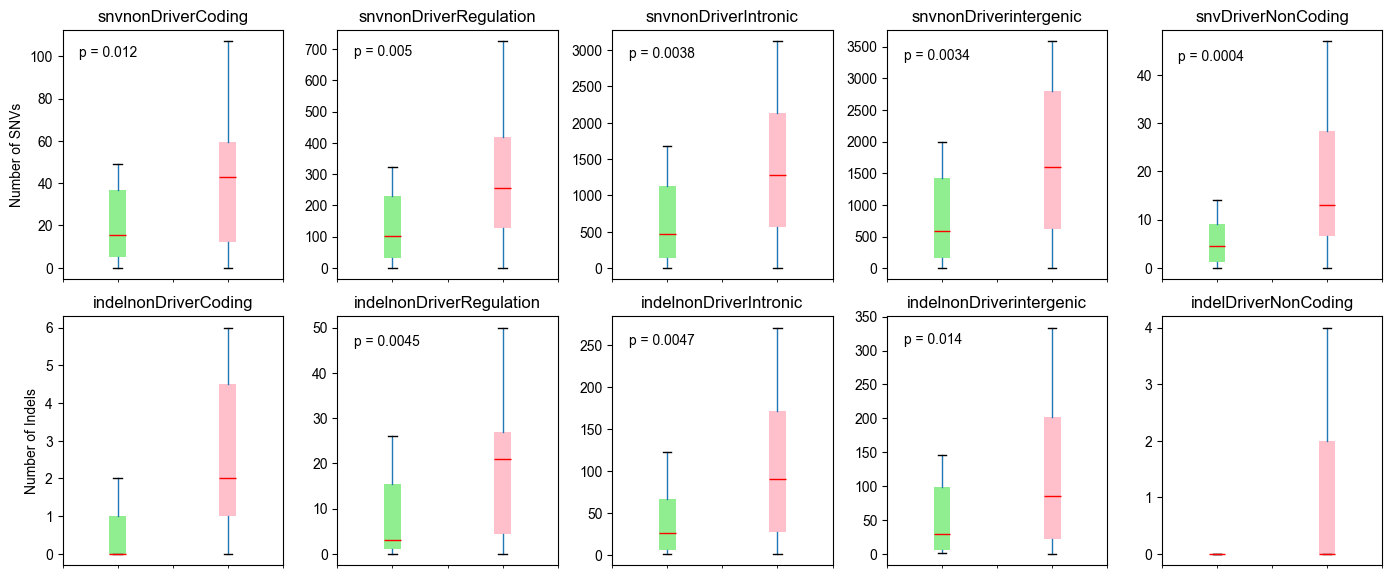

In [12]:
import pandas as pd, numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import rcParams

import shutup
shutup.please()

rcParams['font.family'] = 'Arial'

datapath = '/IPMNPDAC_WGS/Data/'

#updated15-4-23 sample label
precancerList =['case13_4','case10_2','case10_5','case12_S10','case12_S11',
                     'case12_S13','case12_S9','case15_1','case15_3','case2_S10',
                     'case3_1','case3_2','case3_4','case4_S1','case4_S3','case4_S4',
                     'case4_S5','case15_4','case16_2','case2_S2','case2_S4','case7_1']
cancerList = ['case6_S7','case7_4','case7_5','case9_S4','case4_S2','case11_S7',
                  'case11_S8','case13_3','case13_5','case15_10','case15_11','case16_4',
                   'case16_5','case3_5','case6_S8','case6_S9','case9_S2','case9_S3','case9_S6']

# snv data
snvdf =pd.read_csv(datapath + 'all41SNVTypeSampleCounts.csv')
snvprecancerDf = snvdf.query('samples==@precancerList')
snvprecancerDf.insert(1,'tumorStage', 'IPMN')
snvcancerDf = snvdf.query('samples==@cancerList')
snvcancerDf.insert(1, 'tumorStage','PDAC')
snvtumorStageDf = pd.concat([snvprecancerDf, snvcancerDf])
snvtumorStageDfb = snvtumorStageDf [list(snvtumorStageDf)[2:]]
snvtumorStageDfb.insert(0, 'tumorStage', list(snvtumorStageDf.tumorStage))
snvtumorStageDfb = snvtumorStageDfb.rename({'nonDriverCoding':'snvnonDriverCoding',
                                            'nonDriverRegulation':'snvnonDriverRegulation',
                                            'nonDriverIntronic':'snvnonDriverIntronic',
                                            'nonDriverintergenic':'snvnonDriverintergenic',
                                            'DriverNonCoding':'snvDriverNonCoding'}, axis=1)

snvtumorStageDfb = snvtumorStageDfb.reset_index(drop=True)

# indel data
indeldf =pd.read_csv(datapath + '41IndelTypeSampleCounts.csv')
indelprecancerDf = indeldf.query('samples==@precancerList')
indelprecancerDf.insert(1,'tumorStage', 'IPMN')
indelcancerDf = indeldf.query('samples==@cancerList')
indelcancerDf.insert(1, 'tumorStage','PDAC')
indeltumorStageDf = pd.concat([indelprecancerDf, indelcancerDf])
indeltumorStageDfb = indeltumorStageDf [list(indeltumorStageDf)[2:]]
indeltumorStageDfb.insert(0, 'tumorStage', list(indeltumorStageDf.tumorStage))
indeltumorStageDfb = indeltumorStageDfb.rename({'nonDriverCoding':'indelnonDriverCoding',
                                                'nonDriverRegulation':'indelnonDriverRegulation',
                                                'nonDriverIntronic':'indelnonDriverIntronic',
                                                'nonDriverintergenic':'indelnonDriverintergenic',
                                                'DriverNonCoding':'indelDriverNonCoding'}, axis=1)

indeltumorStageDfb = indeltumorStageDfb.reset_index(drop=True)
allDf = pd.concat([snvtumorStageDfb,indeltumorStageDfb], axis=1)
alldf = allDf.T.drop_duplicates().T

# plot
boxpps = dict(linestyle='-', linewidth=0, color='r')
medianpps = dict(linestyle='-', linewidth=1, color='r')

xt = alldf.boxplot(by='tumorStage',  medianprops=medianpps, sharey=False,
                   boxprops=boxpps,rot=0, grid=False, showfliers=False,
                   layout=(2,5), fontsize=10, return_type='both',figsize=(14,6),
                   patch_artist = True, column=list(alldf)[1:])
                
textposion = [100,680,2900,3300,43,0,46,250,310,0] #8 and 5 for no printing
pv=['p = 0.012','p = 0.005','p = 0.0038','p = 0.0034','p = 0.0004', '', 'p = 0.0045','p = 0.0047', 'p = 0.014', '']
colors = ['lightgreen',  'pink' ]
for i, (row_key, (ax, row)) in enumerate(xt.items()):
    ax.set_xlabel("")
    ax.set_title(row_key)
    ax.set_xticklabels("")
    ax.set_ylabel('Number of SVs')
    if i ==5 or i == 9:
       ax.text(0.65,textposion[i], '', fontsize=10) 
    else:
        ax.text(0.65,textposion[i], pv[i], fontsize=10)
        
    if row_key == 'snvnonDriverCoding':
        ax.set_ylabel('Number of SNVs')
    elif row_key == 'indelnonDriverCoding':
        ax.set_ylabel('Number of Indels')
    else:
        ax.set_ylabel('')
    for j,box in enumerate(row['boxes']):
        box.set_facecolor(colors[j])
        
plt.suptitle("")
plt.xticks([])

ipmn_patch = mpatches.Patch(color='lightgreen', label='IPMN')
pdac_patch = mpatches.Patch(color='pink', label='PDAC')
#plt.legend(handles=[ipmn_patch, pdac_patch], loc='best', frameon=False)
plt.tight_layout(pad=1)
plt.show()


# Permutation Tests for Comparison of SV Counts Between Tumor Types Across Genomic Regions

In [1]:
import rpy2
%load_ext rpy2.ipython

In [2]:
%%R
library("coin")

set.seed(123) #

# 1) pair-wise nopaired permutation test function
pairwise.permutation.test = 
	function(x, g, data, method = "fdr")
	{n = length(unique(g))
		N = n*(n-1)/2
		d = data.frame(x = x, g = g)
		Z = data.frame(Comparison=rep("A", N),W=rep(NA, N),
									  p.value=rep(NA, N),
									  p.adjust=rep(NA, N),
									  stringsAsFactors=FALSE)
		k=0               
		for(i in 1:(n-1)){
			for(j in (i+1):n){
				k=k+1
				Namea = as.character(unique(g)[i])
				Nameb = as.character(unique(g)[j])
				Datax = subset(d, g==unique(g)[i])
				Datay = subset(d, g==unique(g)[j])
				Dataz = rbind(Datax, Datay)
				Dataz$g2 = factor(Dataz$g)
                #z = independence_test(x ~ g2, data=Dataz, distribution = "asymptotic")
				z = oneway_test(x ~ g2, data=Dataz, distribution = approximate(nresample = 9999))
				P = signif(pvalue(z), digits=4)
				S = signif(statistic(z), digits=4)
				P.adjust = NA                       
				Z[k,] = c(paste0(Namea, "_vs_", Nameb), S, P, P.adjust)
			}
		} 
		Z$p.adjust = signif(p.adjust(Z$p.value, method = method), digits = 4) 
		Z
	}

# 2) dataset for above test
df = read.csv('/IPMNPDAC_WGS/Data/brasstumorStage4permuTest.csv')
tumorStage <-c('IPMN', 'PDAC')
clNames = names(df)[-1]
combnNumber = dim(combn(length(unique(tumorStage)),2))[2]

# 3) one step pair-wise test
dfs = data.frame(combnNumber)
for (colnm in clNames){X = df[,colnm]
                       A <-df$tumorStage
                       testDf = data.frame(A,X)
                       w = pairwise.permutation.test(X,A, data = testDf, method='fdr')
                       w = w[,c(1, 3,4)]
                       names(w) <-c(paste0('pairWise', names(w)[1]), 
                                    paste0(colnm,'_',names(w)[2]), 
                                    paste0(colnm,'_',names(w)[3]))
                       dfs <- cbind(dfs, w)
                       }

dfsb = dfs[, !duplicated(colnames(dfs))][,-1]


Loading required package: survival


In [3]:
%%R
dfsb

  pairWiseComparison Translocation_p.value Translocation_p.adjust
1       IPMN_vs_PDAC                0.1051                 0.1051
  Tandem_duplication_p.value Tandem_duplication_p.adjust Deletion_p.value
1                      2e-04                       2e-04            4e-04
  Deletion_p.adjust Inversion_p.value Inversion_p.adjust
1             4e-04             2e-04              2e-04


# Fig.S1B1-c. Boxplots of SV Across Genomic Regions

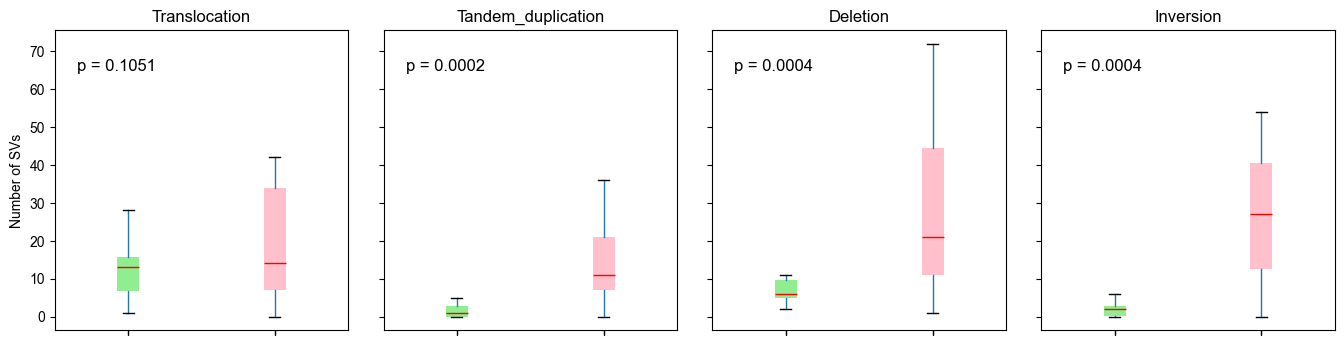

In [23]:
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

from matplotlib import rcParams

import shutup
shutup.please()

rcParams['font.family'] = 'Arial'

svpath = '/IPMNPDAC_WGS/Data/'

#updated15-4-23 sample label
precancerList =['case13_4','case10_2','case10_5','case12_S10','case12_S11',
                     'case12_S13','case12_S9','case15_1','case15_3','case2_S10',
                     'case3_1','case3_2','case3_4','case4_S1','case4_S3','case4_S4',
                     'case4_S5','case15_4','case16_2','case2_S2','case2_S4','case7_1']
cancerList = ['case6_S7','case7_4','case7_5','case9_S4','case4_S2','case11_S7',
                  'case11_S8','case13_3','case13_5','case15_10','case15_11','case16_4',
                   'case16_5','case3_5','case6_S8','case6_S9','case9_S2','case9_S3','case9_S6']

# input
brassdf = pd.read_csv(svpath + '41BrassTypeSampleCounts.csv')

brassprecancerDf = brassdf.query('samples==@precancerList')
brassprecancerDf.insert(1,'tumorStage', 'IPMN')
brasscancerDf = brassdf.query('samples==@cancerList')
brasscancerDf.insert(1, 'tumorStage','PDAC')
brasstumorStageDf = pd.concat([brassprecancerDf, brasscancerDf])
brasstumorStageDfb = brasstumorStageDf[list(brasstumorStageDf)[1:]]

# plot
boxpps = dict(linestyle='-', linewidth=0, color='r')
medianpps = dict(linestyle='-', linewidth=1, color='r')

xt = brasstumorStageDfb.boxplot(by='tumorStage',  medianprops=medianpps, sharey=True,
                                boxprops=boxpps,rot=0, grid=False, showfliers=False,
                                layout=(1,4), fontsize=10, return_type='both', figsize=(16,4),
                                patch_artist = True, column=list(brasstumorStageDfb)[1:])

colors = ['lightgreen',  'pink' ]
pv=['p = 0.1051','p = 0.0002','p = 0.0004','p = 0.0004']
colors = ['lightgreen',  'pink' ]
for i, (row_key, (ax, row)) in enumerate(xt.items()):
    ax.set_xlabel("")
    #ax.set_title(row_key)
    ax.set_xticklabels("")
    ax.set_ylabel('Number of SVs')
    ax.text(0.65, 65, pv[i], fontsize=12)
    for i,box in enumerate(row['boxes']):
        box.set_facecolor(colors[i])
        
plt.suptitle("")
ipmn_patch = mpatches.Patch(color='lightgreen', label='IPMN')
pdac_patch = mpatches.Patch(color='pink', label='PDAC')
plt.subplots_adjust(wspace=0.12, hspace=0.5)
#plt.legend(handles=[ipmn_patch, pdac_patch], loc='best', frameon=False)

plt.show()

In [3]:
brasstumorStageDfb.head(3)

tumorStage  Translocation  Tandem_duplication  Deletion  Inversion
3       IPMN              9                   0         5          1
5       IPMN             50                  19        22         32
7       IPMN              5                   1         8          1

# Permutation test for Comparison of TMB Across Tumour Types

In [ ]:
import rpy2
%load_ext rpy2.ipython

In [8]:
%%R
library(coin)

tmbdf = read.csv('/IPMNPDAC_WGS/Data/tmbplotPermutest.csv')
X = as.numeric(tmbdf$snv_indel_TMB)
A = as.factor(tmbdf$tumorStage)
tmbtest = oneway_test(X~A, data=tmbdf,  distribution = approximate(nresample = 9999))
tmbtest             


	Approximative Two-Sample Fisher-Pitman Permutation Test

data:  X by A (IPMN, PDAC)
Z = -3.5961, p-value = 2e-04
alternative hypothesis: true mu is not equal to 0



Loading required package: survival


# Fig.S1B1-a. Boxplots of TMB

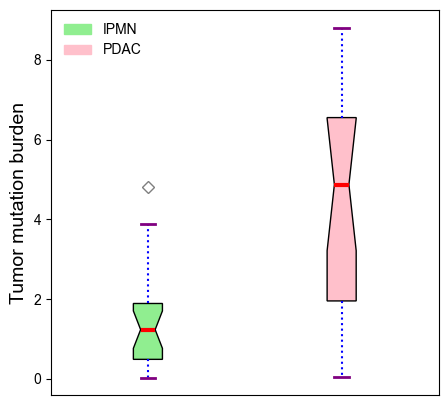

In [24]:
import os
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import rcParams

import shutup
shutup.please()

rcParams['font.family'] = 'Arial'

## TMB bar plot data
tmbDf = pd.read_csv('/IPMNPDAC_WGS/Data/tmbplotPermutest.csv')[['tumorStage',  'snv_indel_TMB']]
ipmn = tmbDf.query('tumorStage=="IPMN"')
pdac = tmbDf.query('tumorStage=="PDAC"')

## boxplot
data = [ipmn.snv_indel_TMB, pdac.snv_indel_TMB]
fig = plt.figure(figsize =(5,5))
ax = fig.add_subplot(111)
 
bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert =90)
colors = ['lightgreen', 'pink']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
 
# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='blue',
                linewidth = 1.5,
                linestyle =":")
# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='purple',
            linewidth = 2)
# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
 
# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='black',
              alpha = 0.5)   

#plt.title("TMB profile of IPMN-PDAC", fontsize=14, weight='bold')
plt.ylabel('Tumor mutation burden', fontsize=14)
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
     
# show plot
import matplotlib.patches as mpatches
ipmn_patch = mpatches.Patch(color='lightgreen', label='IPMN')
pdac_patch = mpatches.Patch(color='pink', label='PDAC')
plt.legend(handles=[ipmn_patch, pdac_patch], loc='best', frameon=False)
plt.xticks([])
plt.show()

In [14]:
%%writefile fishertestDriver.R
%%R

library(coin)

data <- data.frame(
  tumourSample = factor(rep(c("IPMN", "PDAC"), times = c(22, 19))),
  KRAS_snvIndel = factor(c(rep(c("positive", "negative"), times = c(10, 12)),
                      rep(c("positive", "negative"), times = c(12, 7)))),
  GNAS_snvIndel = factor(c(rep(c("positive", "negative"), times = c(8, 14)),
                      rep(c("positive", "negative"), times = c(1, 18)))),
  LRP1B_snvIndel = factor(c(rep(c("positive", "negative"), times = c(0, 22)),
                      rep(c("positive", "negative"), times = c(7, 12)))),
  TP53_snvIndel = factor(c(rep(c("positive", "negative"), times = c(2, 20)),
                      rep(c("positive", "negative"), times = c(13, 6)))),  
  U2AF1_los = factor(c(rep(c("positive", "negative"), times = c(4, 18)),
                       rep(c("positive", "negative"), times = c(13, 6)))),
  RNF43_los = factor(c(rep(c("positive", "negative"), times = c(4, 18)),
                       rep(c("positive", "negative"), times = c(12, 7)))),
  los_12q21_31 = factor(c(rep(c("positive", "negative"), times = c(1, 21)),
                       rep(c("positive", "negative"), times = c(10, 9)))),
  los_21q22_3 = factor(c(rep(c("positive", "negative"), times = c(4, 18)),
                       rep(c("positive", "negative"), times = c(13, 6)))),
  los_17q22 = factor(c(rep(c("positive", "negative"), times = c(4, 18)),
                       rep(c("positive", "negative"), times = c(12, 7)))),
  los_6q27 = factor(c(rep(c("positive", "negative"), times = c(8, 14)),
                       rep(c("positive", "negative"), times = c(15, 4)))),
  gain_8q24_3 = factor(c(rep(c("positive", "negative"), times = c(6, 16)),
                       rep(c("positive", "negative"), times = c(16, 3)))),
  gain_14q32 = factor(c(rep(c("positive", "negative"), times = c(15, 7)),
                       rep(c("positive", "negative"), times = c(19, 0)))), 
  gain_17p11 = factor(c(rep(c("positive", "negative"), times = c(19,3)),
                       rep(c("positive", "negative"), times = c(9, 10)))),
  gain_8q23 = factor(c(rep(c("positive", "negative"), times = c(6, 16)),
                       rep(c("positive", "negative"), times = c(12, 7)))),
  gain_11p11 = factor(c(rep(c("positive", "negative"), times = c(3, 19)),
                       rep(c("positive", "negative"), times = c(9, 10))))
    
)
# save data back
write.csv(data,'/IPMNPDAC_WGS/Data/allIPMNdata4fisherTest.csv', row.names=FALSE)

# Function to run Fisher's Exact Test for each outcome and extract p-value
run_fisher_test <- function(outcome) {
  test_result <- independence_test(reformulate("tumourSample", outcome), data = data, distribution = "exact")
  p_value <- pvalue(test_result)
  return(p_value)
}

outcome_columns <- names(data)[-1]
p_values <- sapply(outcome_columns, run_fisher_test)
adjusted_p_values <- p.adjust(p_values, method = "fdr")

# Create a data frame with the results
results_df <- data.frame(
  Outcome = outcome_columns,
  P_Value = p_values,
  Adjusted_P_Value = adjusted_p_values
)

#write.csv(results_df,'/outpath/allIPMNdata4fisherTestP_values.csv', row.names=FALSE)
print(results_df)

Writing fishertestDriver.R


# Fisher’s Exact Test with FDR Correction for Driver Mutation Differences Across Tumor Types

In [ ]:
import rpy2
%load_ext rpy2.ipython

In [5]:
%%R

library(coin)

data <- data.frame(
  tumourSample = factor(rep(c("IPMN", "PDAC"), times = c(22, 19))),
  KRAS_snvIndel = factor(c(rep(c("positive", "negative"), times = c(10, 12)),
                      rep(c("positive", "negative"), times = c(12, 7)))),
  GNAS_snvIndel = factor(c(rep(c("positive", "negative"), times = c(8, 14)),
                      rep(c("positive", "negative"), times = c(1, 18)))),
  LRP1B_snvIndel = factor(c(rep(c("positive", "negative"), times = c(0, 22)),
                      rep(c("positive", "negative"), times = c(7, 12)))),
  TP53_snvIndel = factor(c(rep(c("positive", "negative"), times = c(2, 20)),
                      rep(c("positive", "negative"), times = c(13, 6)))),  
  U2AF1_los = factor(c(rep(c("positive", "negative"), times = c(4, 18)),
                       rep(c("positive", "negative"), times = c(13, 6)))),
  RNF43_los = factor(c(rep(c("positive", "negative"), times = c(4, 18)),
                       rep(c("positive", "negative"), times = c(12, 7)))),
  los_12q21_31 = factor(c(rep(c("positive", "negative"), times = c(1, 21)),
                       rep(c("positive", "negative"), times = c(10, 9)))),
  los_21q22_3 = factor(c(rep(c("positive", "negative"), times = c(4, 18)),
                       rep(c("positive", "negative"), times = c(13, 6)))),
  los_17q22 = factor(c(rep(c("positive", "negative"), times = c(4, 18)),
                       rep(c("positive", "negative"), times = c(12, 7)))),
  los_6q27 = factor(c(rep(c("positive", "negative"), times = c(8, 14)),
                       rep(c("positive", "negative"), times = c(15, 4)))),
  gain_8q24_3 = factor(c(rep(c("positive", "negative"), times = c(6, 16)),
                       rep(c("positive", "negative"), times = c(16, 3)))),
  gain_14q32 = factor(c(rep(c("positive", "negative"), times = c(15, 7)),
                       rep(c("positive", "negative"), times = c(19, 0)))), 
  gain_17p11 = factor(c(rep(c("positive", "negative"), times = c(19,3)),
                       rep(c("positive", "negative"), times = c(9, 10)))),
  gain_8q23 = factor(c(rep(c("positive", "negative"), times = c(6, 16)),
                       rep(c("positive", "negative"), times = c(12, 7)))),
  gain_11p11 = factor(c(rep(c("positive", "negative"), times = c(3, 19)),
                       rep(c("positive", "negative"), times = c(9, 10))))
    
)
# save data back
write.csv(data,'/IPMNPDAC_WGS/Data/allIPMNdata4fisherTest.csv', row.names=FALSE)

# Function to run Fisher's Exact Test for each outcome and extract p-value
run_fisher_test <- function(outcome) {
  test_result <- independence_test(reformulate("tumourSample", outcome), data = data, distribution = "exact")
  p_value <- pvalue(test_result)
  return(p_value)
}

outcome_columns <- names(data)[-1]
p_values <- sapply(outcome_columns, run_fisher_test)
adjusted_p_values <- p.adjust(p_values, method = "fdr")

# Create a data frame with the results
results_df <- data.frame(
  Outcome = outcome_columns,
  P_Value = p_values,
  Adjusted_P_Value = adjusted_p_values
)

#write.csv(results_df,'/outpath/allIPMNdata4fisherTestP_values.csv', row.names=FALSE)
print(results_df)

                      Outcome      P_Value Adjusted_P_Value
KRAS_snvIndel   KRAS_snvIndel 0.3501072712      0.350107271
GNAS_snvIndel   GNAS_snvIndel 0.0237716140      0.029714518
LRP1B_snvIndel LRP1B_snvIndel 0.0022412657      0.005603164
TP53_snvIndel   TP53_snvIndel 0.0001055886      0.001583830
U2AF1_los           U2AF1_los 0.0016354019      0.004906206
RNF43_los           RNF43_los 0.0045707324      0.008570123
los_12q21_31     los_12q21_31 0.0008904459      0.004452230
los_21q22_3       los_21q22_3 0.0016354019      0.004906206
los_17q22           los_17q22 0.0045707324      0.008570123
los_6q27             los_6q27 0.0110022891      0.016503434
gain_8q24_3       gain_8q24_3 0.0004366369      0.003274777
gain_14q32         gain_14q32 0.0098270879      0.016378480
gain_17p11         gain_17p11 0.0167008241      0.022773851
gain_8q23           gain_8q23 0.0296037968      0.034158227
gain_11p11         gain_11p11 0.0367076360      0.039329610


# Figure S2A. Stacked Bar Charts Showing the Proportion of SBS96, ID83, SV32, and CN48 Signatures in Each IPMN and IPMN-Derived PDAC

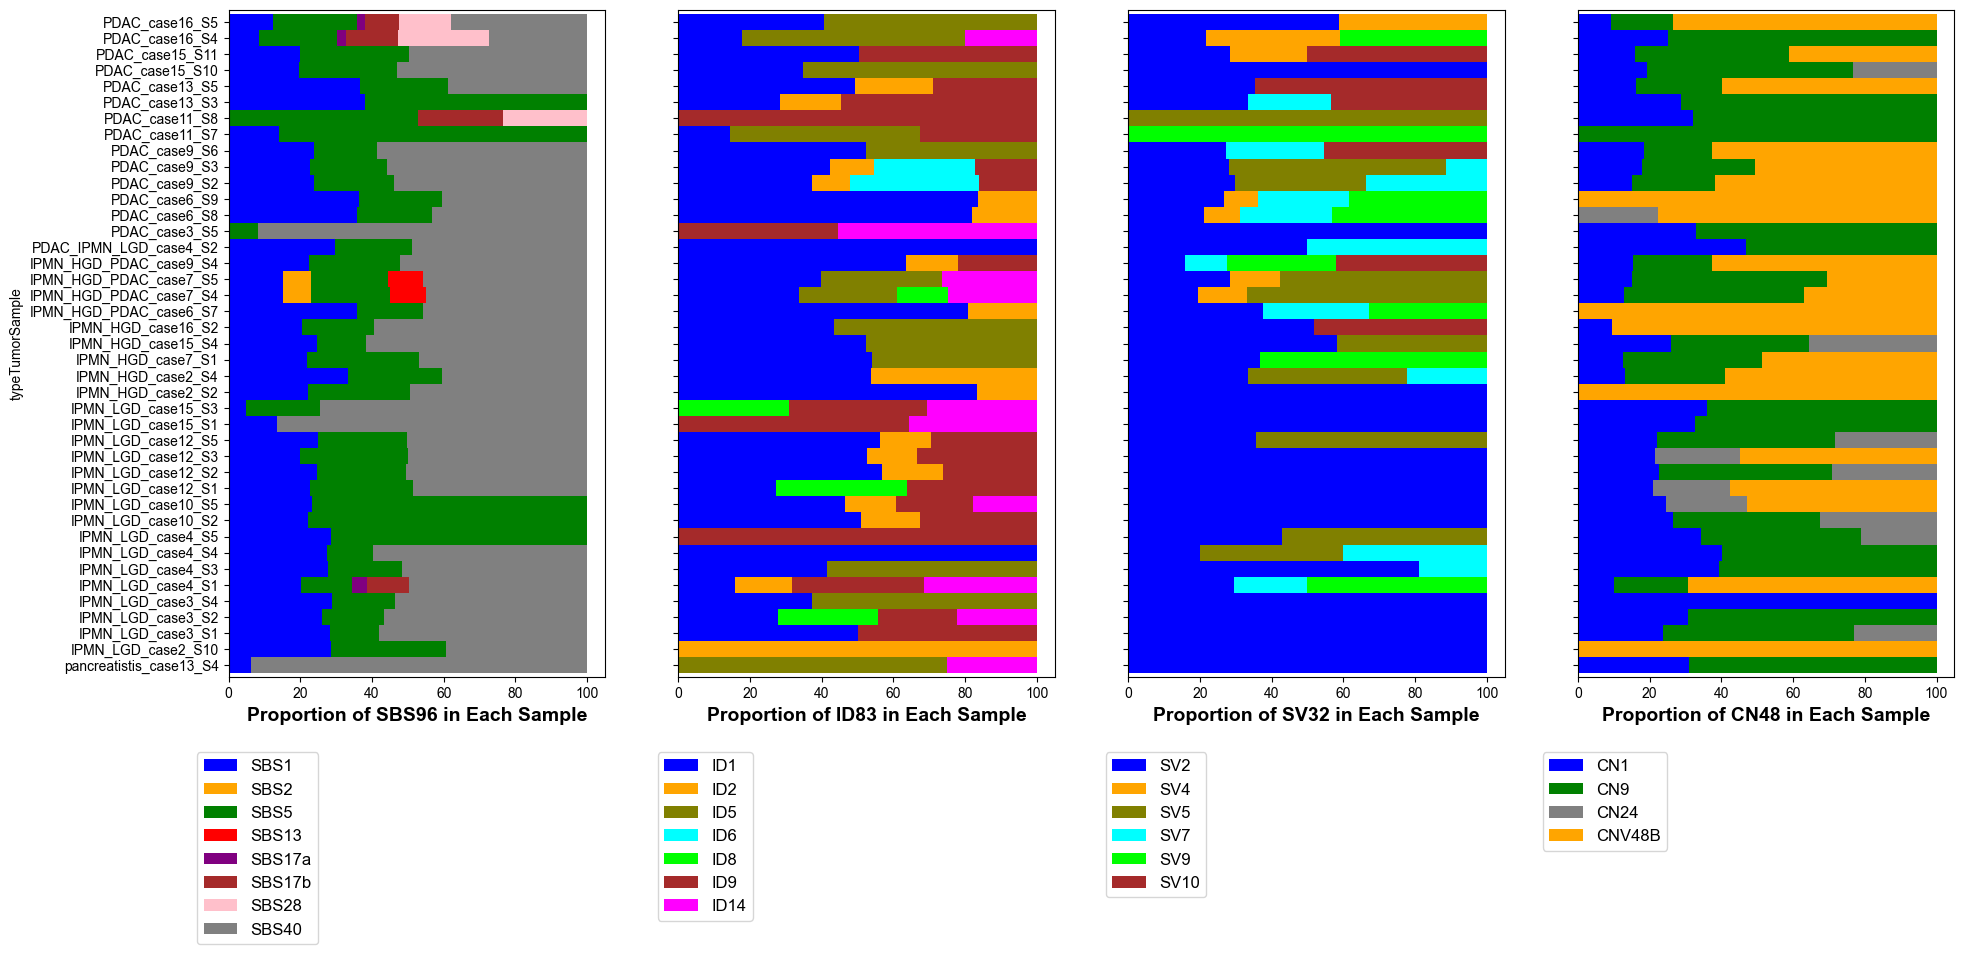

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from natsort import natsort_keygen
from matplotlib import rcParams

rcParams['font.family'] = 'Arial'

sfilepath = '/IPMNPDAC_WGS/Data/'

## 1a) input SBS96
sbs96all = pd.read_csv(sfilepath + 's41SBSsignatureCount.csv')
sbsplotdf = sbs96all[['typeTumorSample', 'SBS1','SBS2','SBS5',
                      'SBS13', 'SBS17a','SBS17b', 'SBS28', 'SBS40']]
sbsplotdf = sbsplotdf.sort_values(by="typeTumorSample", key=natsort_keygen())
sbsplotdf['typeTumorSample'] = [x[3:] for x in sbsplotdf.typeTumorSample]
sbsplotdfb = sbsplotdf.drop(['typeTumorSample'],axis=1)
sbsplotdf_total = sbsplotdfb.sum(axis=1)
sbsplotdf2rate = sbsplotdf[sbsplotdf.columns[1:]].div(sbsplotdf_total, 0) * 100
sbsplotdf2rate['typeTumorSample'] = sbsplotdf.typeTumorSample

# 1b) input ID83
id83all = pd.read_csv(sfilepath + 's41indelSignatureCount.csv')          
idplotdf = id83all[['typeTumorSample', 'ID1','ID2','ID5','ID6','ID8','ID9','ID14']]
idplotdf = idplotdf.sort_values(by="typeTumorSample", key=natsort_keygen())
idplotdf['typeTumorSample'] = [x[3:] for x in idplotdf.typeTumorSample]

idplotdfb = idplotdf.drop(['typeTumorSample'],axis=1)
idplotdf_total = idplotdfb.sum(axis=1)
idplotdf2rate = idplotdf[idplotdf.columns[1:]].div(idplotdf_total, 0) * 100
idplotdf2rate['typeTumorSample'] = idplotdf.typeTumorSample

# 1c input SV32
svall = pd.read_csv(sfilepath +'s41SVsignatureCount.csv')
svplotdf = svall[['typeTumorSample', 'SV2','SV4','SV5','SV7', 'SV9', 'SV10']]
svplotdf = svplotdf.sort_values(by="typeTumorSample", key=natsort_keygen())
svplotdf['typeTumorSample'] = [x[3:] for x in svplotdf.typeTumorSample]

svplotdfb = svplotdf.drop(['typeTumorSample'],axis=1)
svplotdf_total = svplotdfb.sum(axis=1)
svplotdf2rate = svplotdf[svplotdf.columns[1:]].div(svplotdf_total, 0) * 100
svplotdf2rate['typeTumorSample'] = svplotdf.typeTumorSample

# 1d) input CN48 
cnall = pd.read_csv(sfilepath +'s41CNsignature.csv')
cnplotdf = cnall[['typeTumorSample', 'CN1','CN9','CN24','CNV48B']]
cnplotdf = cnplotdf.sort_values(by="typeTumorSample", key=natsort_keygen())
cnplotdf['typeTumorSample'] = [x[3:] for x in cnplotdf.typeTumorSample]

cnplotdfb = cnplotdf.drop(['typeTumorSample'],axis=1)
cnplotdf_total = cnplotdfb.sum(axis=1)
cnplotdf2rate = cnplotdf[cnplotdf.columns[1:]].div(cnplotdf_total, 0) * 100
cnplotdf2rate['typeTumorSample'] = cnplotdf.typeTumorSample

# 2) set up plot
fig, axes = plt.subplots(1, 4, figsize=(20, 10), sharey=True)
colorSBS = ['blue', 'orange',  'green',  'red', 'purple', 'brown', 'pink', 'gray']
colorID = ['blue', 'orange', 'olive', 'cyan', 'lime', 'brown','fuchsia']
colorSV = ['blue', 'orange', 'olive', 'cyan', 'lime', 'brown']
colorCN = ['blue', 'green', 'gray', 'orange']

# 3a) plot sbs sigs
sbsplotdf2rate.plot(ax=axes[0], x = 'typeTumorSample', kind = 'barh', stacked = True,            
                    mark_right = True, legend=True, color=colorSBS, width=1.0)
axes[0].legend(bbox_to_anchor=(0.26, -0.1),fontsize=12)
axes[0].set_xlabel('Proportion of SBS96 in Each Sample', fontsize=14,weight='bold')

# 3b) plot Id sigs
idplotdf2rate.plot(ax=axes[1], x = 'typeTumorSample', kind = 'barh', stacked = True,            
                   mark_right = True, legend=True, color=colorID, width=1.0)

axes[1].legend(bbox_to_anchor=(0.22, -0.1),fontsize=12)
axes[1].set_xlabel('Proportion of ID83 in Each Sample',fontsize=14,weight='bold')

# 3c plot SV sigs
svplotdf2rate.plot(ax=axes[2], x = 'typeTumorSample', kind = 'barh', stacked = True,            
                   mark_right = True, legend=True, color=colorSV, width=1.0)
axes[2].set_xlabel('Proportion of SV32 in Each Sample',fontsize=14,weight='bold');
axes[2].legend(bbox_to_anchor=(0.23, -0.1),fontsize=12)

# 3d) plot CN sigs
cnplotdf2rate.plot(ax=axes[3], x = 'typeTumorSample', kind = 'barh', stacked = True,            
                 mark_right = True, legend=True, color=colorCN, width=1.0)
axes[3].set_xlabel('Proportion of CN48 in Each Sample',fontsize=14,weight='bold');
axes[3].legend(bbox_to_anchor=(0.26, -0.1), fontsize=12)

# 4) spacing
fig.tight_layout(pad=2.0)

plt.show();

#  Fisher's Exact Test for Comparison of SV Signatures Across Tumor Types

In [ ]:
import rpy2
%load_ext rpy2.ipython

In [35]:
%%R

library(coin)

data <- data.frame(
  tumourSample = factor(rep(c("IPMN", "PDAC"), times = c(22, 19))),
  SV2 = factor(c(rep(c("positive", "negative"), times = c(22, 0)),
                      rep(c("positive", "negative"), times = c(17, 2)))),
  SV4 = factor(c(rep(c("positive", "negative"), times = c(0, 22)),
                      rep(c("positive", "negative"), times = c(7, 12)))),
  SV5 = factor(c(rep(c("positive", "negative"), times = c(5, 17)),
                      rep(c("positive", "negative"), times = c(5, 14)))),
  SV7 = factor(c(rep(c("positive", "negative"), times = c(4, 18)),
                      rep(c("positive", "negative"), times = c(9, 10)))),  
  SV9 = factor(c(rep(c("positive", "negative"), times = c(1, 21)),
                       rep(c("positive", "negative"), times = c(5, 14)))) 
)
# save data back
#write.csv(data,'/outpath/SVSigfisherTest.csv', row.names=FALSE)

# Function to run Fisher's Exact Test for each outcome and extract p-value
run_fisher_test <- function(outcome) {
  test_result <- independence_test(reformulate("tumourSample", outcome), data = data, distribution = "exact")
  p_value <- pvalue(test_result)
  return(p_value)
}

outcome_columns <- names(data)[-1]
p_values <- sapply(outcome_columns, run_fisher_test)
adjusted_p_values <- p.adjust(p_values, method = "fdr")

# Create a data frame with the results
results_df <- data.frame(
  Outcome = outcome_columns,
  P_Value = p_values,
  Adjusted_P_Value = adjusted_p_values
)

print(results_df)

    Outcome     P_Value Adjusted_P_Value
SV2     SV2 0.208536585       0.26067073
SV4     SV4 0.002241266       0.01120633
SV5     SV5 1.000000000       1.00000000
SV7     SV7 0.090613389       0.15102232
SV9     SV9 0.079521830       0.15102232


Loading required package: survival


#  Fig.2C Circular Visualization of SV Transductions
* Case 7 and case 15 Translocation plots

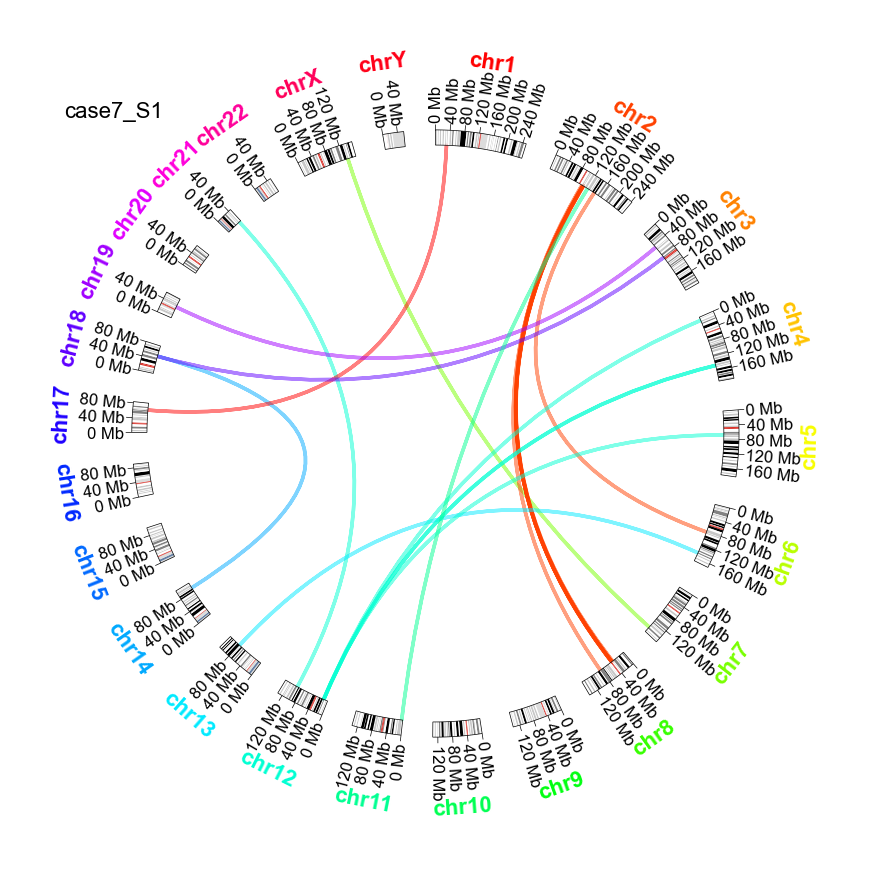

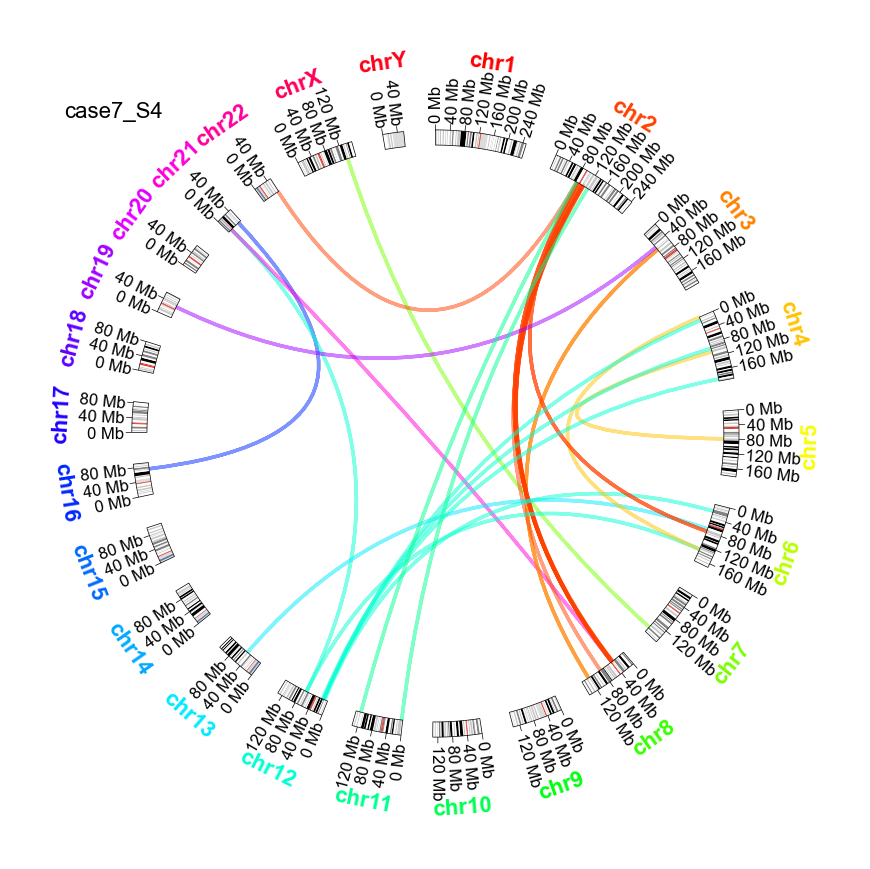

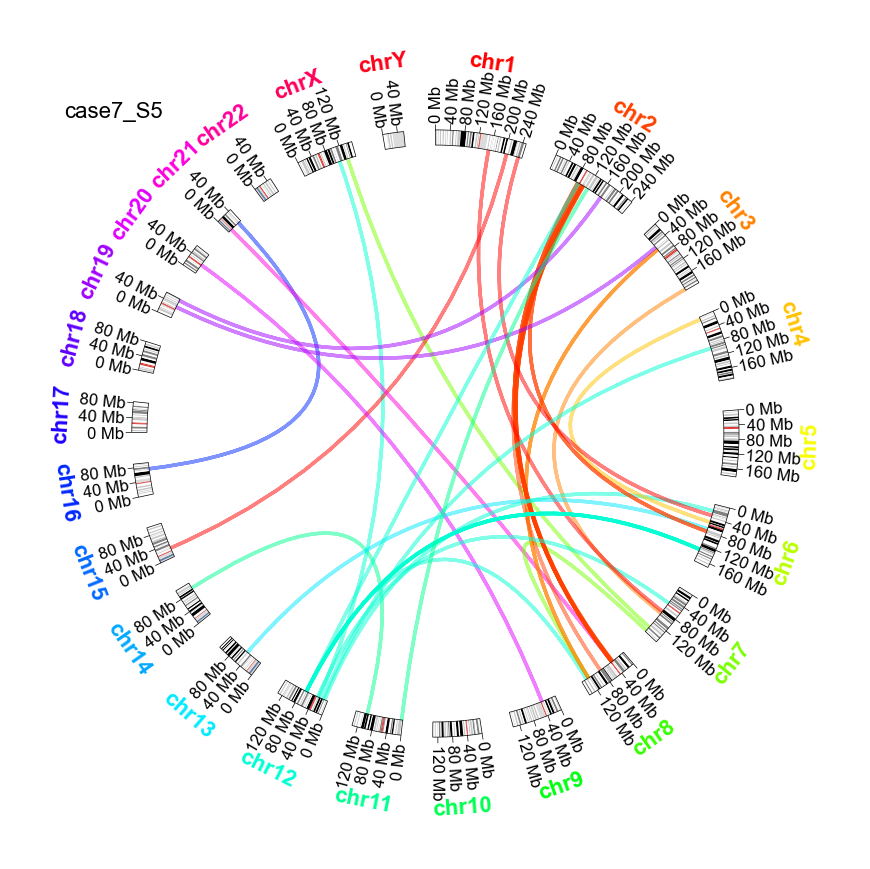

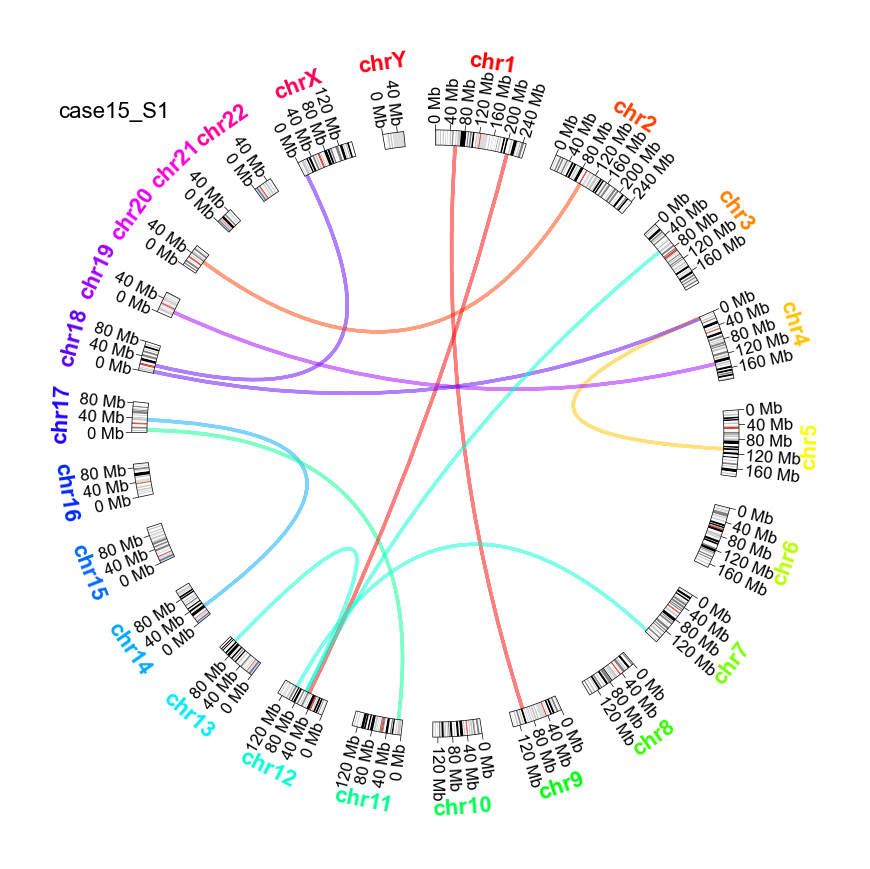

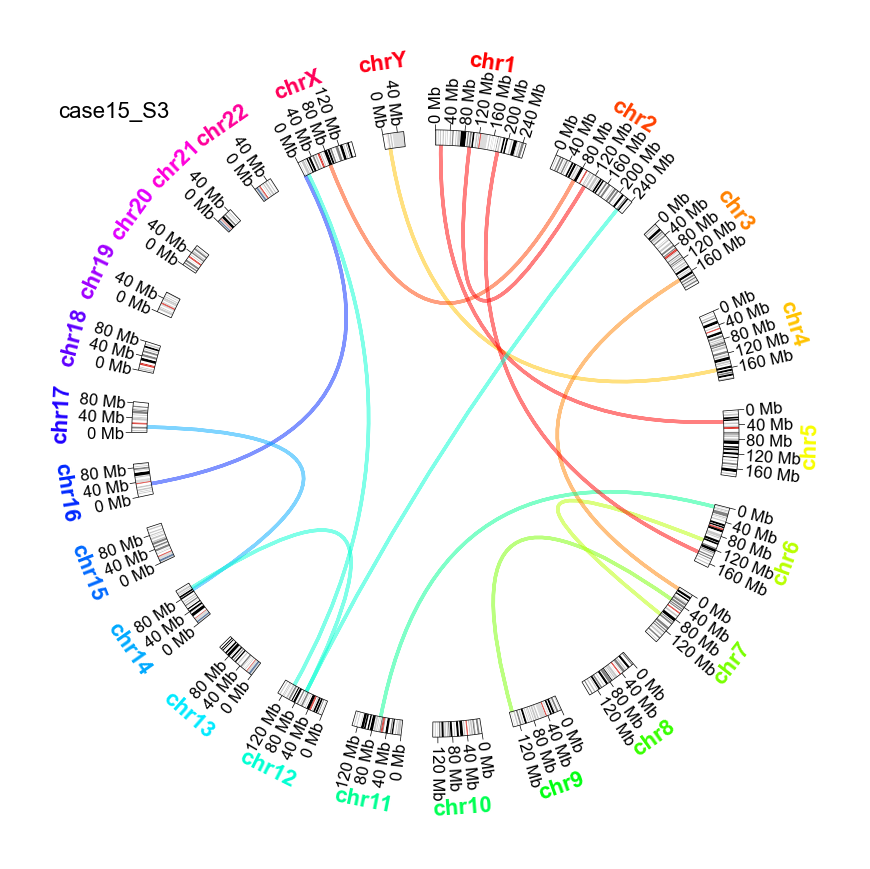

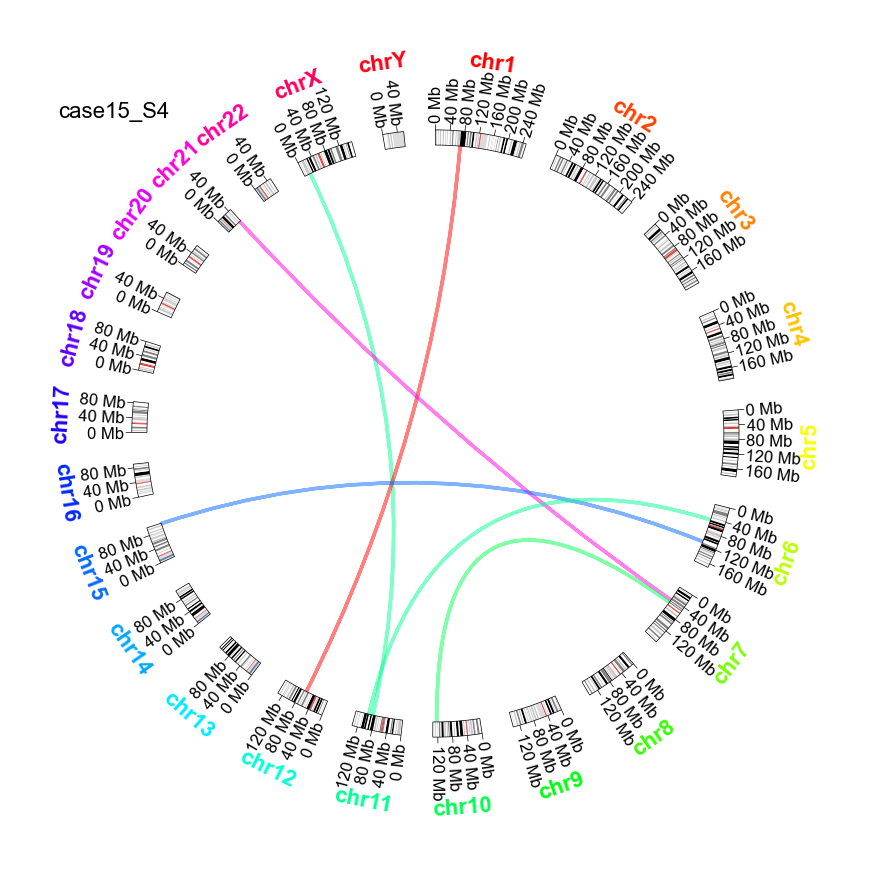

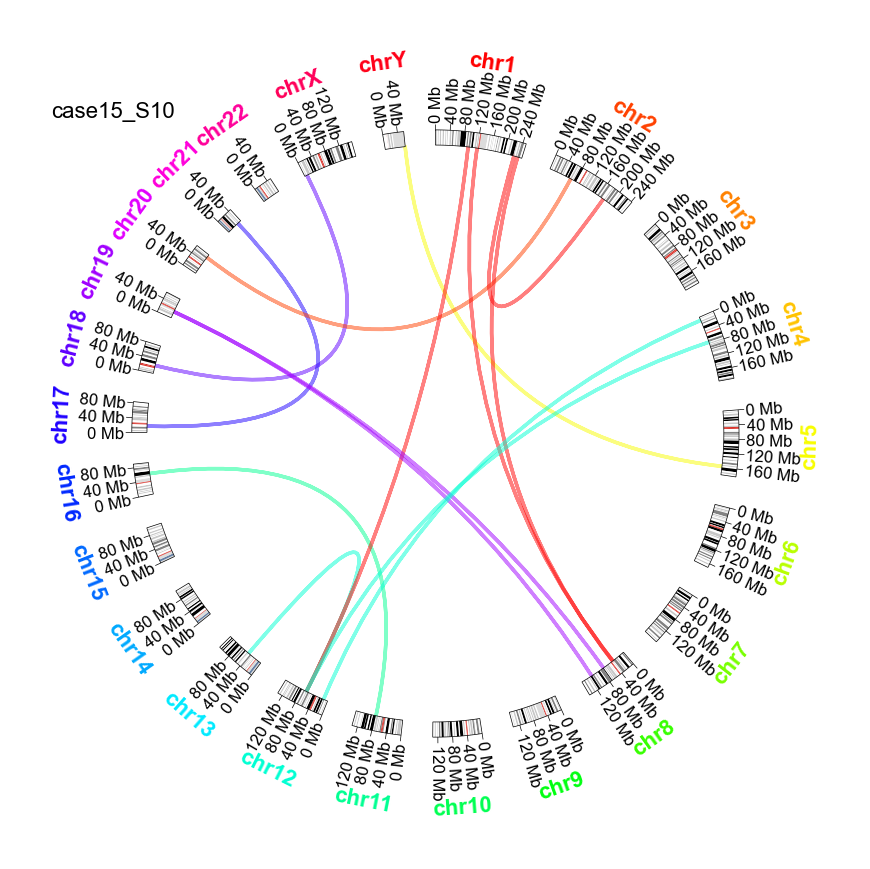

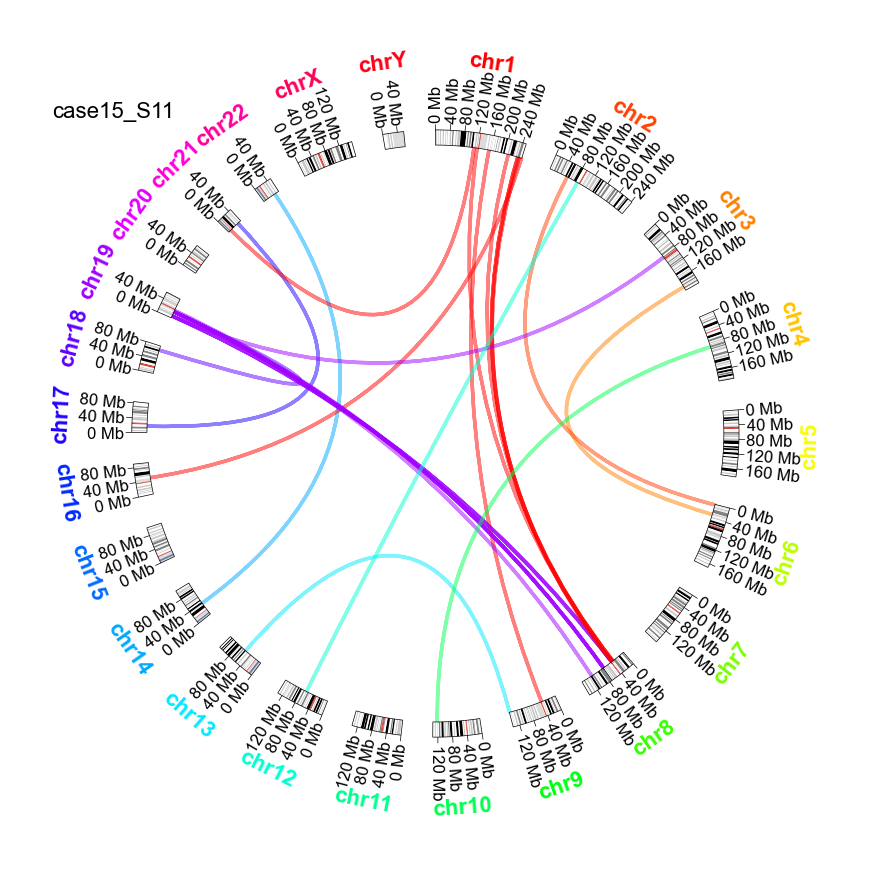

In [8]:
import pandas as pd
import numpy as np
from pycirclize import Circos
import matplotlib.pyplot as plt
from natsort import natsorted
from pycirclize.utils import ColorCycler, load_eukaryote_example_dataset

from matplotlib import rcParams

plt.rcParams['figure.dpi'] = 300

rcParams['font.family'] = 'Arial'

translocationPath = '/IPMNPDAC_WGS/Data/'
chr_links = pd.read_csv(translocationPath + 'case7_15_translocations.csv')
sampleIDs = list(set(chr_links.sampleID))
# natural order
sampleIDs = natsorted(sampleIDs, key=lambda x: x.lstrip())
plt.rcParams["figure.figsize"] = (8,32*len(sampleIDs))

for sampleID in sampleIDs:
    # Load hg38 dataset (https://github.com/moshi4/pycirclize-data/tree/main/eukaryote/hg38)
    chr_bed_file, cytoband_file, _ = load_eukaryote_example_dataset("hg38")
    circos = Circos.initialize_from_bed(chr_bed_file, space=6)

    # Add cytoband tracks from cytoband file
    circos.add_cytoband_tracks((95, 100), cytoband_file)

    # Create chromosome color dict
    ColorCycler.set_cmap("hsv")
    chr_names = [s.name for s in circos.sectors]
    colors = ColorCycler.get_color_list(len(chr_names))
    chr_name2color = {name: color for name, color in zip(chr_names, colors)}

# Plot chromosome name & xticks
    for sector in circos.sectors:
        sector.text(sector.name, r=120, size=16, weight='bold', color=chr_name2color[sector.name])
        sector.get_track("cytoband").xticks_by_interval(40000000,label_size=12,
            label_orientation="vertical", label_formatter=lambda v: f"{v / 1000000:.0f} Mb")

    # Plot chromosome link
    chr_links_case = chr_links[chr_links.sampleID.str.contains(sampleID)][list(chr_links)[:-1]]
    caseChrLinks = chr_links_case.query('sampleID==@sampleID')[list(chr_links_case)[1:]]
    caseChrLinks['chrom1'] = ['chr'+str(a) for a in caseChrLinks.chrom1]
    caseChrLinks['chrom2'] = ['chr'+str(b) for b in caseChrLinks.chrom2]
    caseChrLinks = list(caseChrLinks.itertuples(index=False, name=None))
    for i, j in enumerate(caseChrLinks):
        region1 = j[:3]
        region2 = j[3:]
        color = chr_name2color[region1[0]]
        circos.link(region1, region2, color=color, lw=2.5)
    circos.text(sampleID, deg=315, r=150, size=16)
    fig=circos.plotfig();


# Fig.S1B2 Line Plot Showing VAF and CCF Profiles of KRAS Mutations

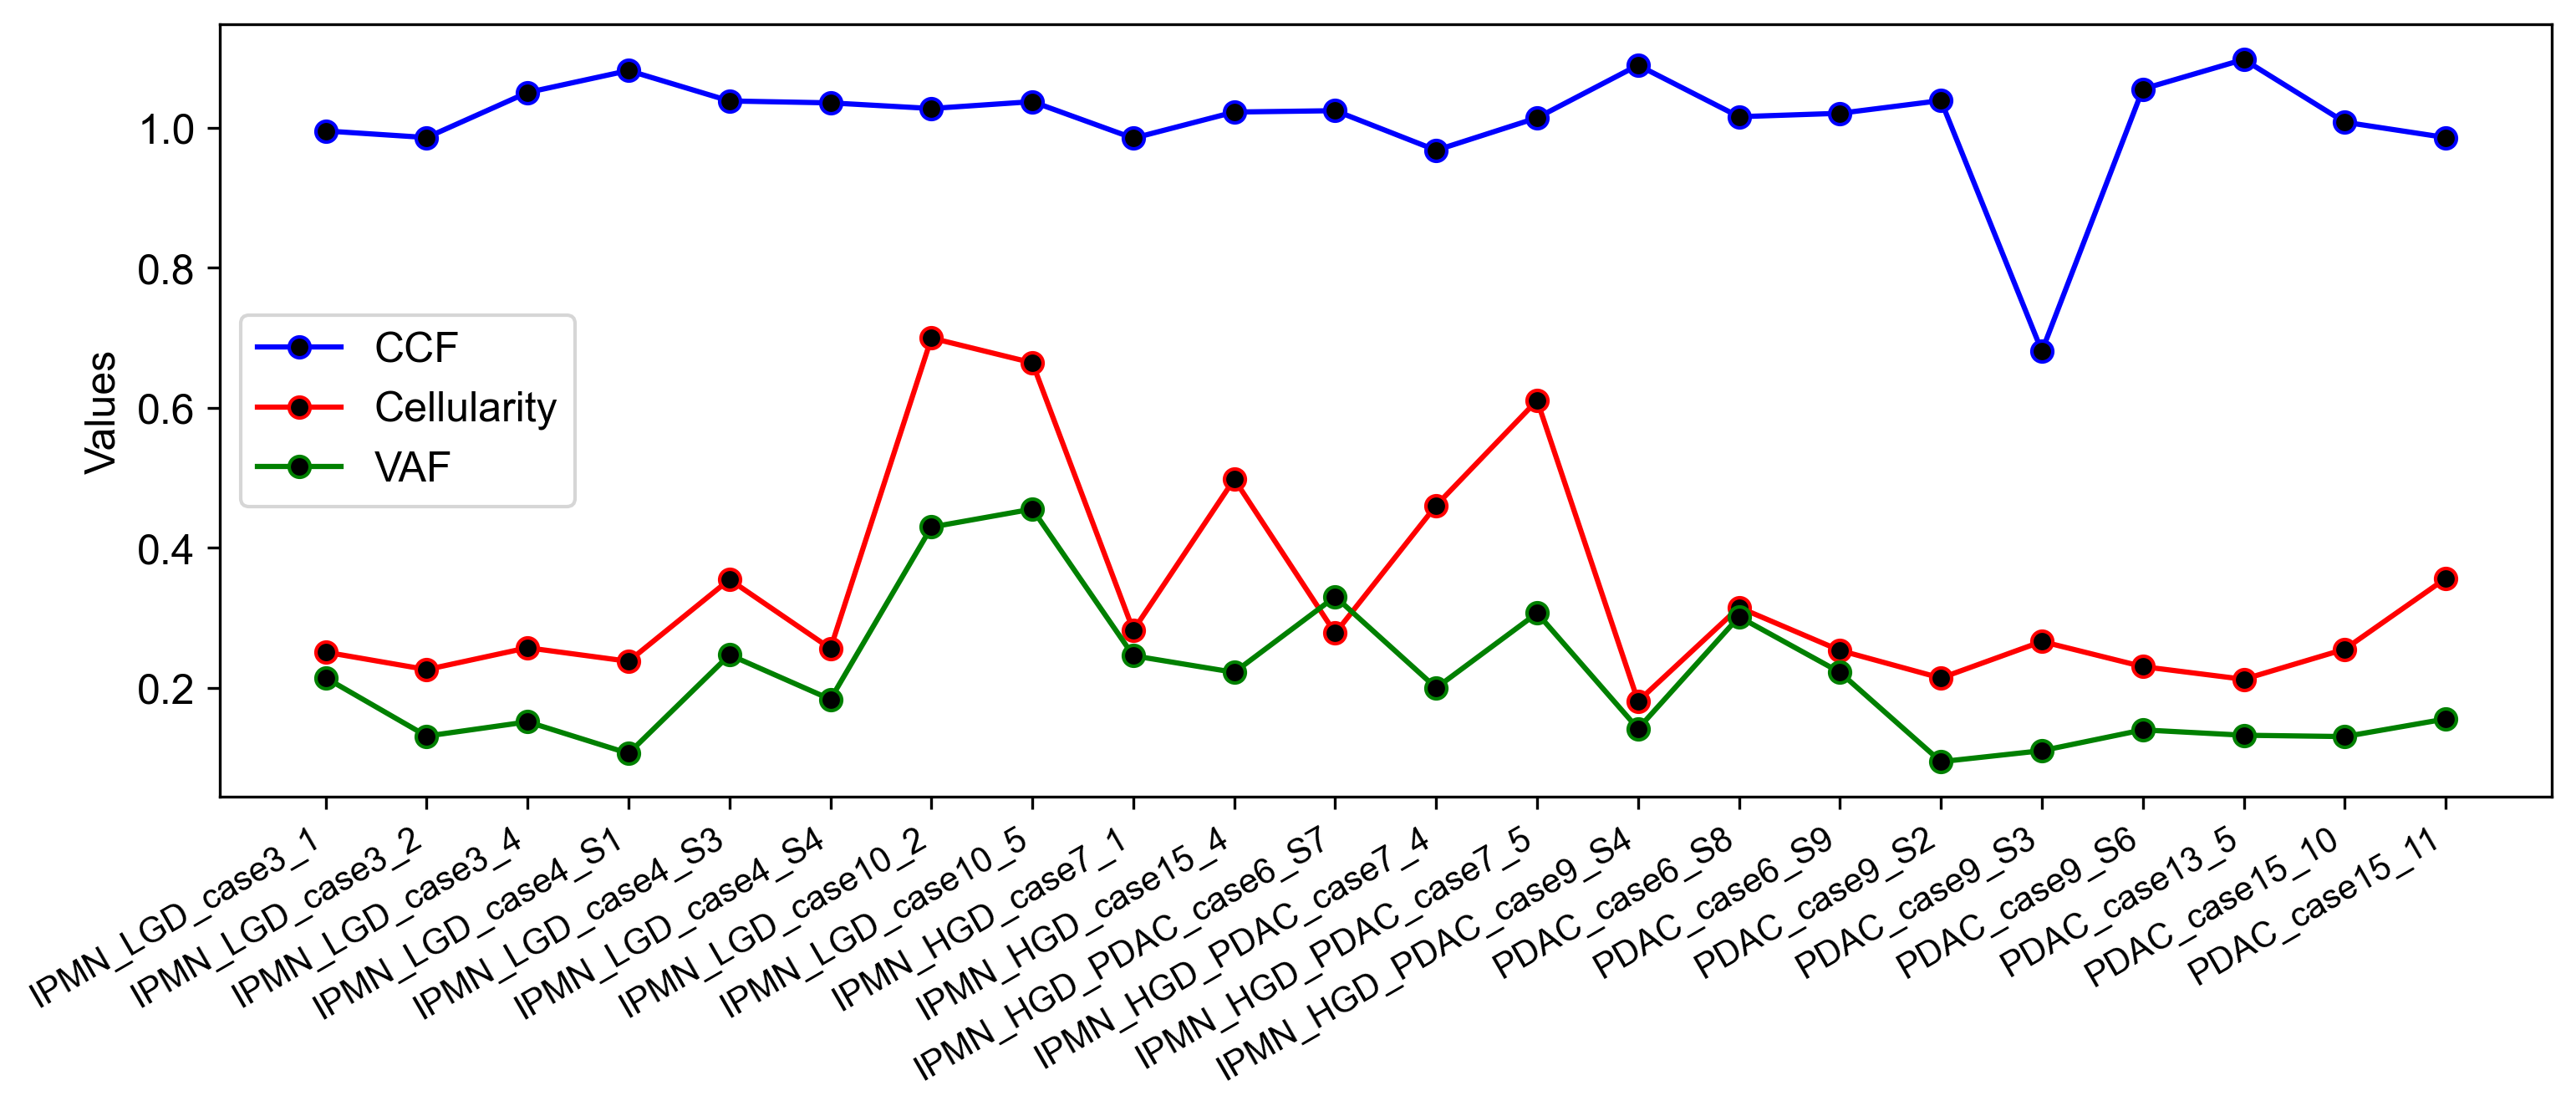

In [5]:
import pandas as pd
from natsort import natsort_keygen
import matplotlib.pyplot as plt

from matplotlib import rcParams
plt.rcParams['figure.dpi'] = 300
rcParams['font.family'] = 'Arial'

font = {'family':'monospace','weight':'normal', 'size':12}
#plt.rc('font', **font)

mutpath = "/IPMNPDAC_WGS/Data/"
krasCCF_VAF = pd.read_csv(mutpath + 'kras_vaf_ccf.csv')
krasCCF_VAF = krasCCF_VAF.sort_values(by='typeTumosample', key = natsort_keygen())
krasCCF_VAF['typeTumosample'] = [a[3:] for a in krasCCF_VAF.typeTumosample]

fig, axes = plt.subplots(1,1, figsize=(12,4), sharex=True)
axes.plot(krasCCF_VAF.typeTumosample, krasCCF_VAF.location_CCF,'-o', c='blue',  mfc='black', label='CCF')
axes.plot(krasCCF_VAF.typeTumosample,krasCCF_VAF.cellularity, '-o',c='red', mfc='black', label='Cellularity')
axes.plot(krasCCF_VAF.typeTumosample,krasCCF_VAF.VAF, '-o',c='green', mfc='black', label='VAF') 
axes.set_ylabel('Values')
#axes.set_xtickslabel('Values')
plt.setp(axes.get_xticklabels(), rotation=30, ha="right", fontsize=10)
plt.legend(loc="center left")
plt.show()

# Tumor Microenvironment Composition Converges Along Evolutionary Trajectories 

## Fig S10. Cell Type Proportions Along Evolutionary Trajectories: Comparing Single MRCA and Multiple Independent Clones

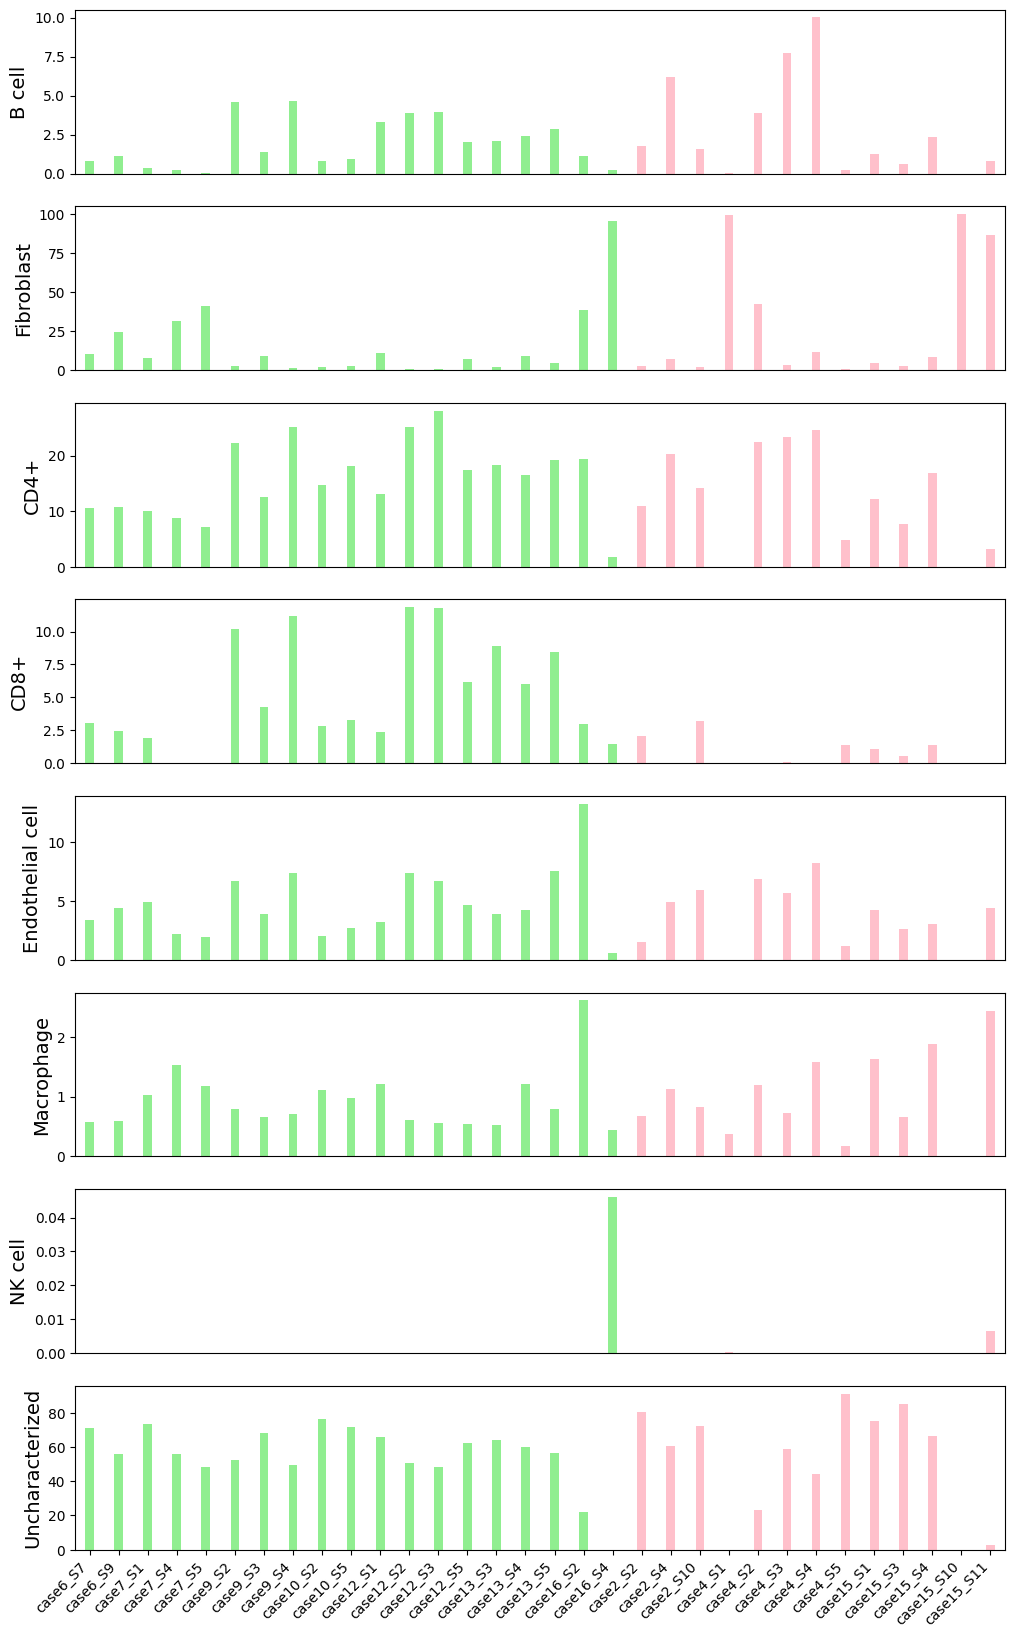

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

treeSample = ['case6_S7','case6_S9',
              'case7_S1','case7_S4','case7_S5',
              'case9_S2','case9_S3','case9_S4',
              'case10_S2','case10_S5',
              'case12_S1','case12_S2','case12_S3','case12_S5',
              'case13_S3','case13_S4','case13_S5',
              'case16_S2','case16_S4',
              'case2_S2','case2_S4','case2_S10',
              'case4_S1','case4_S2','case4_S3','case4_S4', 'case4_S5',
              'case15_S1','case15_S3', 'case15_S4','case15_S10','case15_S11',]

colorx =['lightgreen']*19 +['pink']*13
# 1) import dataset
os.chdir(r'/mnt/b/1_3July23VersionDataPlotCode/NC_revision/pathwayCelltype')
cellTypes = pd.read_csv('ESTIMATE_EPIC_scoresb.csv')
treeCells = cellTypes.query('Samples==@treeSample')
treeCells = treeCells.rename(columns = {'B_cell':'B cell', 'Cancer associated_fibroblast':'Fibroblast',
                                        'T_cell_CD4+' : 'CD4+','T_cell_CD8+':'CD8+','Endothelial_cell': 'Endothelial cell',
                                        'NK_cell':'NK cell','uncharacterized_cell':'Uncharacterized'})
treeCells = treeCells.set_index('Samples')
treeCells = treeCells.reindex(treeSample) # Apply custom sort

cellnames = list(treeCells)
lbs = list(treeCells.index)
binx = np.arange(len(lbs))

# 2) Create a figure and axis objects
fig, axes = plt.subplots(nrows=len(cellnames), ncols=1, figsize=(12, 20))

# 3) Iterate over the data and create subplots with bar charts
for i, ax in enumerate(axes):
    # Get the data for the current subplot
    subplot_df = treeCells[[cellnames[i]]]
    
    # Set the title for the subplot
    #ax.set_title(f"Subplot {i+1}")
    
    # Create the bar chart for the current subplot
    ax.bar(subplot_df.index, subplot_df[cellnames[i]]*100, width = 0.3, color=colorx)
    ax.set_xticklabels([])
    ax.set_xticks([]) 
    ax.set_xlim(-0.5, binx.size-0.5)
    # Set the labels for the x-axis and y-axis
    #ax.set_xlabel('X-axis')
    ax.set_ylabel(cellnames[i], fontsize=14)

ax.set_xticks(range(len(lbs)))    
ax.set_xticklabels(lbs, rotation=45, ha='right')    
#plt.xlim([-0.5,binx.size-0.5])
# Adjust the spacing between subplots

#plt.tight_layout()

# Show the plot
plt.show()

## T-Test for Comparison of Cell Type Proportions: Single MRCA vs. Multiple Independent Clones

In [55]:
import os
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

treeSample = ['case2_S2','case2_S4','case2_S10',
              'case4_S1','case4_S2','case4_S3','case4_S4', 'case4_S5',
              'case15_S1','case15_S3', 'case15_S4','case15_S10','case15_S11',
              'case6_S7','case6_S9',
              'case7_S1','case7_S4','case7_S5',
              'case9_S2','case9_S3','case9_S4',
              'case10_S2','case10_S5',
              'case12_S1','case12_S2','case12_S3','case12_S5',
              'case13_S3','case13_S4','case13_S5',
              'case16_S2','case16_S4']

colorx = ['pink']*13+ ['lightgreen']*19
# 1) import dataset
os.chdir(r'/mnt/b/1_3July23VersionDataPlotCode/NC_revision/pathwayCelltype')
cellTypes = pd.read_csv('ESTIMATE_EPIC_scoresb.csv')
treeCells = cellTypes.query('Samples==@treeSample')
treeCells = treeCells.rename(columns = {'B_cell':'B cell', 'Cancer associated_fibroblast':'Fibroblast',
                                        'T_cell_CD4+' : 'CD4','T_cell_CD8+':'CD8','Endothelial_cell': 'Endothelial cell',
                                        'NK_cell':'NK cell','uncharacterized_cell':'Uncharacterized'})
sampleM = treeSample[:13]
sampleC = treeSample[13:]

mMRCR = treeCells.query('Samples==@sampleM')
cMRCR = treeCells.query('Samples==@sampleC')

pValues = []
for cellType in list(treeCells)[1:]:
    t_stat, p_value = ttest_ind(list(mMRCR[cellType]) , list(cMRCR[cellType]))
    pValues.append(p_value)
    
    spacex = ' ' * (16-len(cellType)) #16 is the max(len(cellType))
    print('The p value of', cellType, 'T-test is:' f"{spacex}", round(p_value,4))

The p value of B cell T-test is:           0.3176
The p value of Fibroblast T-test is:       0.2652
The p value of CD4 T-test is:              0.2327
The p value of CD8 T-test is:              0.0005
The p value of Endothelial cell T-test is: 0.3024
The p value of Macrophage T-test is:       0.6782
The p value of NK cell T-test is:          0.5311
The p value of Uncharacterized T-test is:  0.6141


## Boxplot for Comparison of Cell Type Proportions: Single MRCA vs. Multiple Independent Clones

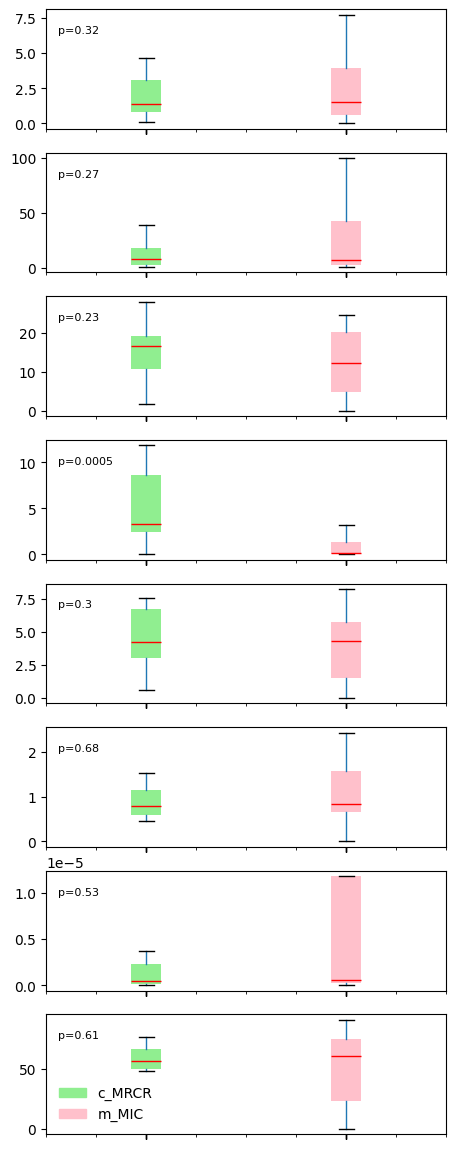

In [11]:
import os
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

treeSample = ['case2_S2','case2_S4','case2_S10',
              'case4_S1','case4_S2','case4_S3','case4_S4', 'case4_S5',
              'case15_S1','case15_S3', 'case15_S4','case15_S10','case15_S11',
              'case6_S7','case6_S9',
              'case7_S1','case7_S4','case7_S5',
              'case9_S2','case9_S3','case9_S4',
              'case10_S2','case10_S5',
              'case12_S1','case12_S2','case12_S3','case12_S5',
              'case13_S3','case13_S4','case13_S5',
              'case16_S2','case16_S4']

colorx = ['pink']*13+ ['lightgreen']*19
# 1) import dataset
os.chdir(r'/mnt/b/1_3July23VersionDataPlotCode/NC_revision/pathwayCelltype')
cellTypes = pd.read_csv('ESTIMATE_EPIC_scoresb.csv')
treeCells = cellTypes.query('Samples==@treeSample')
treeCells = treeCells.rename(columns = {'B_cell':'B cell', 'Cancer associated_fibroblast':'Fibroblast',
                                        'T_cell_CD4+' : 'CD4','T_cell_CD8+':'CD8','Endothelial_cell': 'Endothelial cell',
                                        'NK_cell':'NK cell','uncharacterized_cell':'Uncharacterized'})


treeCells['Samples'] = treeCells['Samples'].apply(lambda val: 'm_MRCR' if val in  treeSample[:13] else 'c_MRCR')
treeCells[treeCells.select_dtypes(include='number').columns] *= 100
treeCells = treeCells.sort_values(by='Samples', ascending = False)

# plot
boxpps = dict(linestyle='-', linewidth=0, color='r')
medianpps = dict(linestyle='-', linewidth=1, color='r')

xt = treeCells.boxplot(by='Samples',  medianprops=medianpps, sharey=False, boxprops=boxpps,rot=0, grid=False, showfliers=False,sharex=True,
                       layout=(8,1), fontsize=10, return_type='both', figsize=(5,15), patch_artist = True, column=list(treeCells)[1:])

colors = ['lightgreen',  'pink' ]
pv = ['p=0.32','p=0.27','p=0.23','p=0.0005', 'p=0.3', 'p=0.68','p=0.53', 'p=0.61']

for i, (row_key, (ax, row)) in enumerate(xt.items()):
    ax.set_xlabel("")
    #ax.set_title(row_key)
    ax.set_xticklabels("")
    ax.set_title("")
    #ax.set_ylabel(row_key)
    ax.text(0.03, 0.8, pv[i], transform=ax.transAxes, fontsize=8)
    for j,box in enumerate(row['boxes']):
        box.set_facecolor(colors[j])    

cMRCR = mpatches.Patch(color='lightgreen', label='c_MRCR')
mMRCR = mpatches.Patch(color='pink', label='m_MIC')
plt.legend(handles=[cMRCR, mMRCR], loc='best', frameon=False)
plt.suptitle('')
plt.show();

# Cellularity Comparison Between Single-Branch and Multiple-Branch Trees

In [3]:
import pandas as pd
from scipy.stats import ttest_ind
datapath = '/mnt/b/1_3July23VersionDataPlotCode/NC_revision/excelSubmited/'
purityData = pd.read_csv(datapath + '573583_0_data_set_10134107_spmdqf.csv')
purityData = purityData[['sampleName', 'cellularity']]

multipleBranch = ['case10','case3','case16','case2','case9','case7','case6']
singleBranch = ['case4','case12','case13', 'case15']
sampleNames = list(purityData.sampleName)

multipleBranchSample = [x for x in sampleNames if x.split('_')[0] in multipleBranch]
singleBranchSample = [x for x in sampleNames if x.split('_')[0] in singleBranch]

multipleBranchPurity = purityData.query('sampleName==@multipleBranchSample')
singleBranchPurity = purityData.query('sampleName==@singleBranchSample')
mean_multipleBranchPurity = multipleBranchPurity['cellularity'].mean()
mean_singleBranchPurity = singleBranchPurity['cellularity'].mean()
multipleBranchPurityV = list(multipleBranchPurity.cellularity)
singleBranchPurityV = list(singleBranchPurity.cellularity)

t_stat, p_value = ttest_ind(multipleBranchPurityV , singleBranchPurityV)

In [4]:
p_value

0.7736972351901088

In [5]:
mean_multipleBranchPurity

0.3155518181818182

In [6]:
mean_singleBranchPurity

0.33191588235294117

# ID83 and CNV48b Signatures Across Tumor Types

## ID83 Activity Profiles Across Tumor Types

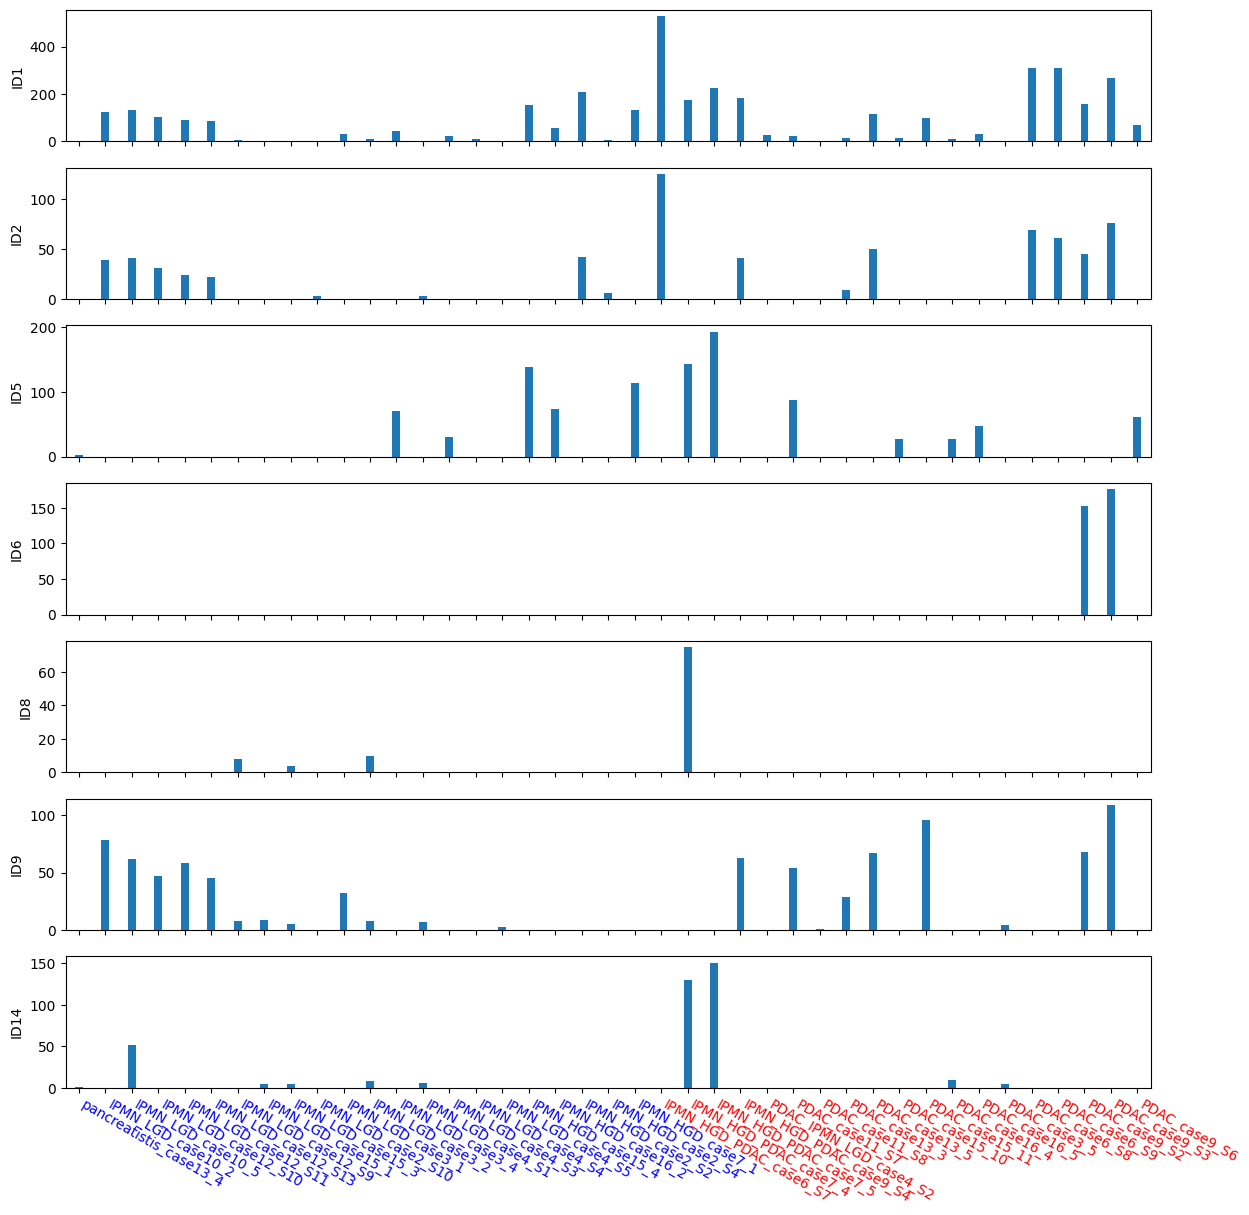

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

datapath = '/mnt/b/1_3July23VersionDataPlotCode/SupplementaryInformation/FigureS2/'

id83 = pd.read_csv(datapath + 'intersect41_tumorlabel_id83.csv')
id83 = id83[['typeTumorSample','ID1','ID2','ID5','ID6','ID8','ID9','ID14']]
id83 = id83.sort_values(by='typeTumorSample')
id83['typeTumorSample'] = [x[3:] for x in id83.typeTumorSample]
id83 =  id83.set_index('typeTumorSample')

# Create a figure and axis objects
fig, axes = plt.subplots(nrows=len(list(id83)), ncols=1, figsize=(14, 14), sharex=True)

# Iterate over the data and create subplots with bar charts
for i, ax in enumerate(axes):
    # Get the data for the current subplot
    subplot_df = id83[[list(id83)[i]]]
    # Set the title for the subplot
    #ax.set_title(f"Subplot {i+1}")
    
    # Create the bar chart for the current subplot
    ax.bar(subplot_df.index, subplot_df[list(id83)[i]], width = 0.3)
    ax.set_xticklabels([])
    #ax.set_xticks([]) 
    ax.set_xlim(-0.5, len(subplot_df)-0.5)
    # Set the labels for the x-axis and y-axis
    #ax.set_xlabel('X-axis')
    ax.set_ylabel(list(id83)[i])

colorOrder = ['blue']*22 +  ['red']*19 #22 low grade and 19 high grade
for xtick, color in zip(axes[6].get_xticklabels(), colorOrder):
    xtick.set_color(color)
    
axes[6].set_xticks(range(len(list(subplot_df.index))))    
axes[6].set_xticklabels(list(subplot_df.index), rotation=-30, ha='left')    
#plt.xticks(rotation=-30, ha='left', fontsize=12, rotation_mode='anchor')
#plt.xlim([-0.5,binx.size-0.5])
# Adjust the spacing between subplots

#plt.tight_layout()

# Show the plot
plt.show()

## Fig S2C. Correlation Analysis of Activity Profiles Between ID1, ID2, and CNV48b 

In [2]:
import rpy2
%load_ext rpy2.ipython

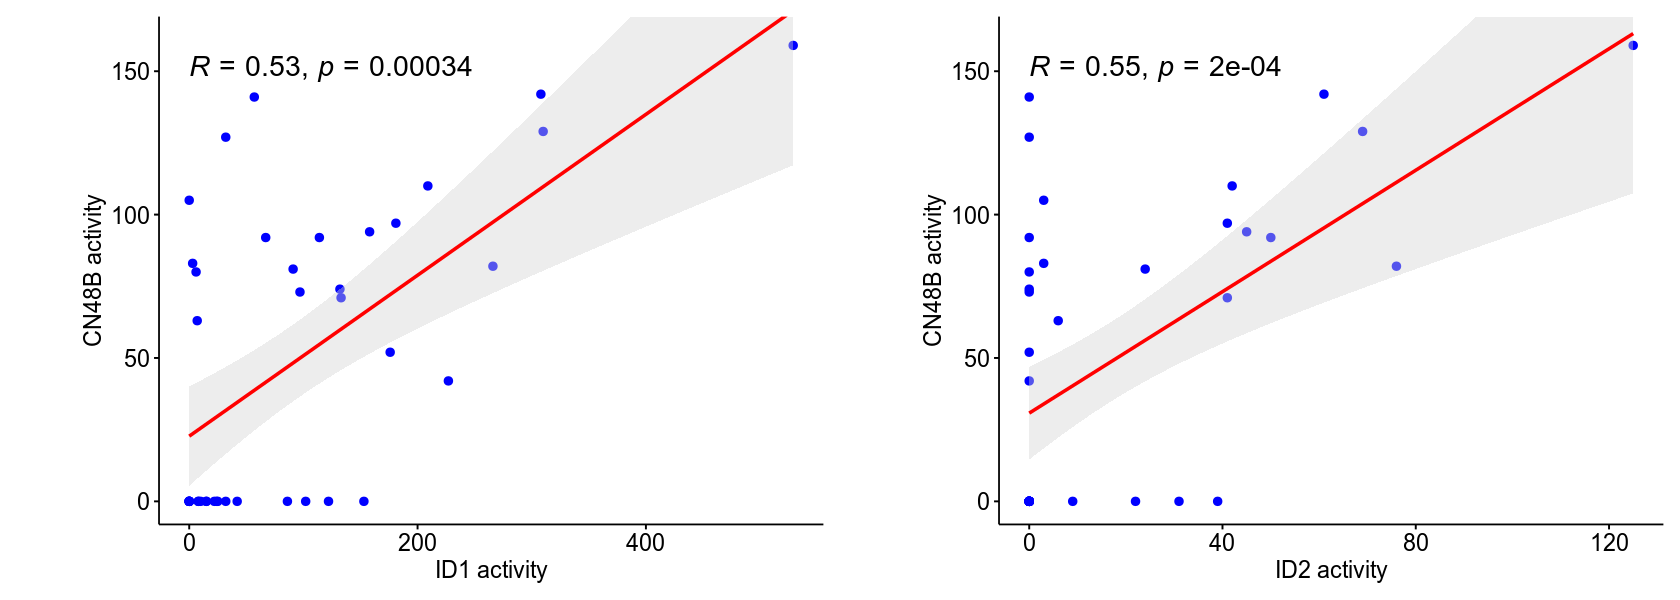

In [2]:
%%R
library("ggpubr")

datapath = '/mnt/b/1_3July23VersionDataPlotCode/SupplementaryInformation/FigureS2/'
id83cn48b = read.csv(paste0(datapath,'41id83cn48bforcorr.csv'))

p1 <- ggscatter(id83cn48b, x = "ID1", y = "CNV48B", 
          add = "reg.line", conf.int = TRUE, 
          cor.coef = TRUE, 
          #cor.method = "pearson",
          cor.method = 'spearman',
          cor.coef.size = 6,  
          xlab = "ID1 activity", ylab = "CN48B activity",
          color = "blue", 
          size = 2, # Points color, shape and size
          ylim=c(0,161),
          font.x = c(14, "plain"),
          font.y = c(14, "plain"),
          font.xtickslab = 14,
          font.ytickslab = 14,
          add.params = list(color = "red", fill = "lightgray")) +
          theme(plot.margin = margin(10, 10, 10, 50)) # add space to the right

p2 <- ggscatter(id83cn48b, x = "ID2", y = "CNV48B", 
          add = "reg.line", conf.int = TRUE, 
          cor.coef = TRUE, 
          #cor.method = "pearson",
          cor.method = 'spearman',
          cor.coef.size = 6, 
          xlab = "ID2 activity", ylab = "CN48B activity",
          color = "blue", 
          size = 2, # Points color, shape and size
          ylim=c(0,161),
          font.x = c(14, "plain"),
          font.y = c(14, "plain"),
          font.xtickslab = 14,
          font.ytickslab = 14,
          add.params = list(color = "red", fill = "lightgray"))+
          theme(plot.margin = margin(10, 10, 10, 50))  # add space to the left
blank <- ggplot() + theme_void()


#combined <- ggarrange(p1, blank, p2,
                      #ncol = 3,
                     # widths = c(2, 0.2, 2),
                      #align = "h")

options(repr.plot.width = 14, repr.plot.height = 5)

#ggarrange(p1, blank, p2,ncol = 3, nrow = 1)
ggarrange(p1, p2,ncol = 2, nrow = 1)
#ggexport(combined, filename = "combined_plot_fixed.pdf", width = 8, height = 6)

# Assignment of Signatures to Clustered Branches

## Integration of SBS-seqinfo with Decomposed Mutation Type Probabilities

### SBS96 Mutation Context Extraction (e.g., U:AA[C>A]GA -> A[C>A]G)

In [24]:
%%writefile sbsClusterAssignment_step1.py

import glob
import pandas as pd
import numpy as np
from natsort import natsorted
from natsort import index_natsorted

sampleID = pd.read_csv('/mnt/b/1_3July23VersionDataPlotCode/Figure1/sampleID2025.csv')
sampleNewID = list(sampleID.ID2025)
sampleOldID = list(sampleID.previousID)

## snv-SBS96 seqinfo seq process, e.g. U:AA[C>A]GA -> A[C>A]G
seqinfoPath = '/mnt/e/5_signatureResult34_41samples/41SBS96/output/vcf_files/SNV/'  
outpath = '/IPMNPDAC_WGS/Data/Data/sigDPC/step1seqProcessed/'
sbsDFs = []
for fn in glob.glob(seqinfoPath+'*seqinfo.txt'):
    #combined 22 files for 22 chromsomes
    sbsDf = pd.read_csv(fn, sep='\t', header=None)
    sbsDf.columns = ['samples', 'chrs', 'pos', 'mutationType', 'orientation']
    sbsMutTypeSeq = [a[-8:-1] for a in sbsDf.mutationType]
    sbsDf.insert(4, 'mutationTypeSeq', sbsMutTypeSeq)
    sbsDFs.append(sbsDf)
    
sampleList = sorted(list(set(sbsDFs[0].samples)))
SBSdf = pd.concat(sbsDFs) 
SBSdf_sampleMut = [str(b)+'_'+str(c) for b, c in zip(SBSdf['samples'], SBSdf['mutationTypeSeq'])]    
SBSdf.insert(2, 'sampleMut', SBSdf_sampleMut)  
SBSdf = SBSdf.replace(sampleOldID, sampleNewID, regex=True)
sampleList = sorted(list(set(SBSdf.samples)))
SBSdf.to_csv(outpath + '41Samples_SBSseqinfo.csv', index=0) #all combined datasets
#########
for samplex in sampleList:
    sampleSBSseq = SBSdf[SBSdf['samples'].str.contains(samplex)]
    sampleSBSseq.insert(0, 'chr_pos',[str(p)+'_'+str(q) for p,q in zip(sampleSBSseq.chrs, sampleSBSseq.pos)])
    sampleSBSseq.to_csv(outpath+ '{}_SBSseqinfo.csv'.format(samplex), index=0)  
#######


Writing sbsClusterAssignment_step1.py


In [2]:
sampleSBSseq.head(3)

chr_pos   samples chrs         sampleMut      pos mutationType  \
4041    10_62166  case9_S6   10  case9_S6_A[C>A]G    62166  U:AA[C>A]GA   
4042  10_1836840  case9_S6   10  case9_S6_T[C>T]G  1836840  N:GT[C>T]GT   
4043  10_2823152  case9_S6   10  case9_S6_G[C>T]G  2823152  N:CG[C>T]GA   

     mutationTypeSeq  orientation  
4041         A[C>A]G           -1  
4042         T[C>T]G            1  
4043         G[C>T]G           -1

### Merging Sequence Information and SBS Probabilities by Unique Mutation ID (column 'sampleMut' -e.g. containing: case9_S6_A[C>A]G)

In [25]:
%%writefile sbsClusterAssignment_step2.py
import pandas as pd 

# 1) process Probabilities file by adding column sampleMut: e.g. case10_2_A[C>A]A
sampleID = pd.read_csv('/mnt/b/1_3July23VersionDataPlotCode/Figure1/sampleID2025.csv')
sampleNewID = list(sampleID.ID2025)
sampleOldID = list(sampleID.previousID)

pathsigout = '/mnt/e/5_signatureResult34_41samples/41SBS96/SBS96/Suggested_Solution/COSMIC_SBS96_Decomposed_Solution/Activities/'
sigoutseq = pd.read_csv(pathsigout + 'De_Novo_MutationType_Probabilities.txt', sep = '\t')
sigoutseq = sigoutseq.replace(sampleOldID, sampleNewID, regex=True)
sigoutseq.insert(0, 'sampleMut', [str(a) +'_'+str(b) for a,b in zip(sigoutseq.SampleNames, sigoutseq.MutationType)])

# 2) merge seqinfo and SBS probabilities on the column'sampleMut'	
seqInfopath = '/IPMNPDAC_WGS/Data/Data/sigDPC/step1seqProcessed/'
seqInfoSigOut = '/IPMNPDAC_WGS/Data/Data/sigDPC/step2seqInfoSigOut/'
allSampleSeqInfo = pd.read_csv(seqInfopath + '41Samples_SBSseqinfo.csv')
segInfoSBSprob = allSampleSeqInfo.merge(sigoutseq)
colNameSBS = [a for a in list(segInfoSBSprob) if 'SBS' in a]
segInfoSBSprob = segInfoSBSprob[['samples', 'chrs', 'pos', 'sampleMut'] + colNameSBS]
segInfoSBSprob.to_csv(seqInfoSigOut +'41seqInfoSBSprob.csv', index=0)


Writing sbsClusterAssignment_step2.py


In [4]:
sigoutseq.head(3)

sampleMut SampleNames MutationType      SBS1  SBS2      SBS5  \
0  case10_S2_A[C>A]A   case10_S2      A[C>A]A  0.020291   0.0  0.979709   
1  case10_S2_A[C>A]C   case10_S2      A[C>A]C  0.063453   0.0  0.936547   
2  case10_S2_A[C>A]G   case10_S2      A[C>A]G  0.026137   0.0  0.973863   

   SBS13  SBS17a  SBS17b  SBS28  SBS40  
0    0.0     0.0     0.0    0.0    0.0  
1    0.0     0.0     0.0    0.0    0.0  
2    0.0     0.0     0.0    0.0    0.0

In [5]:
allSampleSeqInfo.head(3)

samples chrs          sampleMut      pos mutationType mutationTypeSeq  \
0  case10_S2   10  case10_S2_T[T>G]T  1968539  N:AT[T>G]TT         T[T>G]T   
1  case10_S2   10  case10_S2_C[C>T]G  2937665  N:AC[C>T]GA         C[C>T]G   
2  case10_S2   10  case10_S2_A[C>T]G  3276167  N:GA[C>T]GC         A[C>T]G   

   orientation  
0            1  
1           -1  
2            1

In [6]:
segInfoSBSprob.head(3) #clean merged dataset

samples chrs      pos          sampleMut          SBS1  SBS2      SBS5  \
0  case10_S2   10  1968539  case10_S2_T[T>G]T  4.630000e-15   0.0  1.000000   
1  case10_S2   10  2937665  case10_S2_C[C>T]G  7.585576e-01   0.0  0.241442   
2  case10_S2   10  3276167  case10_S2_A[C>T]G  9.430772e-01   0.0  0.056923   

   SBS13  SBS17a  SBS17b  SBS28  SBS40  
0    0.0     0.0     0.0    0.0    0.0  
1    0.0     0.0     0.0    0.0    0.0  
2    0.0     0.0     0.0    0.0    0.0

### Deriving chr_pos and Cluster Assignments from SNV_Indel_msDPC Output

In [26]:
%%writefile sbsClusterAssignment_step3.py
import os
import glob
import shutil
import pandas as pd

datapath = '/mnt/d/1a_18_04_MU/5B_PancreaticCancer/4_IPMN_WGS/6b_callersDPC/10_CNVpindelSNVmsDPC/1_msDPC_mostUextract/'
outputpath = '/mnt/b/1_3July23VersionDataPlotCode/gitdata/Data/sigDPC/step3caseChrPosCluster/'
                
dfs=[]
for fd in (glob.glob(datapath + '*pindelSNVmsDPC')):
    caseID = fd.split('/')[-1].split('_')[0]
    snvFile = '{}__DP_and_cluster_info_0.01.txt'.format(caseID)#the file here could be snv+pindel
    clustFile = '{}__union_filtered_SNVs.txt'.format(caseID)
    pathx = os.path.join(os.getcwd(), fd)   
    snvFilex = os.path.join(pathx, snvFile)
    clustFilex = os.path.join(pathx, clustFile)
    dfchrpos = pd.read_csv(snvFilex, sep='\t')
    dfcluste = pd.read_csv(clustFilex, sep='\t')
    dfIDcluster = pd.concat([dfchrpos, dfcluste], axis=1)
    dfIDcluster.insert(0, 'chr_pos', dfIDcluster['chr'].astype(str) + '_' + dfIDcluster['pos'].astype(str))
    dfIDcluster =  dfIDcluster[['chr_pos', 'chr', 'pos', 'most.likely.cluster']]
    dfIDcluster = dfIDcluster.rename(columns = {'most.likely.cluster':'clusterNo'})
    dfs.append(dfIDcluster)
    dfIDcluster.to_csv(outputpath + '{}_chrPosCluster.csv'.format(caseID), index=0)
    

Writing sbsClusterAssignment_step3.py


In [13]:
dfs[0].head(3)

chr_pos chr      pos  clusterNo
0  1_1439597   1  1439597          1
1  1_2379843   1  2379843          2
2  1_2486699   1  2486699          1

### Deriving msCluster Labels and SBS Probability Scores

In [27]:
%%writefile sbsClusterAssignment_step4.py
import pandas as pd
from glob import glob

seqinfoSBSprobPath = '/IPMNPDAC_WGS/Data/Data/sigDPC/step2seqInfoSigOut/'
caseChrPosClusterpath = '/IPMNPDAC_WGS/Data/Data/sigDPC/step3caseChrPosCluster/'
outpath = '/IPMNPDAC_WGS/Data/Data/sigDPC/step4caseSampleClusterSBS/'

# 1) process seqinfoSBSprob by adding column case_chrs_pos
seqinfoSBSprob = pd.read_csv(seqinfoSBSprobPath + '41seqInfoSBSprob.csv',low_memory=False)
seqinfoSBSprob = seqinfoSBSprob[['samples','chrs','pos', 'SBS1','SBS2','SBS5','SBS13','SBS17a','SBS17b','SBS28','SBS40']]
seqinfoSBSprob.insert(1, 'caseid', [x.split('_')[0] for x in seqinfoSBSprob.samples])
seqinfoSBSprob.insert(0, 'case_chrs_pos', seqinfoSBSprob['caseid'].astype(str)+'_'+ seqinfoSBSprob['chrs'].astype(str)+'_'+seqinfoSBSprob['pos'].astype(str))
seqinfoSBSprob = seqinfoSBSprob[['case_chrs_pos','samples','SBS1','SBS2','SBS5','SBS13','SBS17a','SBS17b','SBS28','SBS40']]

# 2) process caseChrPosCluster by adding column case_chrs_pos, and merge

dfs = []
for fn in glob(caseChrPosClusterpath + '*_chrPosCluster.csv'):
    caseid = fn.split('/')[-1].split('_')[0]
    chrPosCluster_df = pd.read_csv(fn)
    chrPosCluster_df.insert(0, 'case_chrs_pos',  caseid + '_' + chrPosCluster_df['chr_pos'].astype(str))
    chrPosCluster_df = chrPosCluster_df[['case_chrs_pos', 'clusterNo']]
    chrPosCluster_sbs = seqinfoSBSprob.merge(chrPosCluster_df)
    chrPosCluster_sbs = chrPosCluster_sbs.drop_duplicates(subset='case_chrs_pos', keep='first')
    chrPosCluster_sbs.to_csv(outpath + '{}_chrPosCluster_sbs.csv'.format(caseid), index=0)
    dfs.append(chrPosCluster_sbs)


Writing sbsClusterAssignment_step4.py


In [10]:
 dfs[0].head(3)

case_chrs_pos    samples          SBS1  SBS2      SBS5  SBS13  SBS17a  \
0  case10_10_1968539  case10_S2  4.630000e-15   0.0  1.000000    0.0     0.0   
1  case10_10_2937665  case10_S2  7.585576e-01   0.0  0.241442    0.0     0.0   
2  case10_10_3276167  case10_S2  9.430772e-01   0.0  0.056923    0.0     0.0   

   SBS17b  SBS28  SBS40  clusterNo  
0     0.0    0.0    0.0          3  
1     0.0    0.0    0.0          4  
2     0.0    0.0    0.0          4

In [11]:
dfs[0].shape

(4072, 11)

### Calculate SBS Totals for Each Cluster

In [28]:
%%writefile sbsClusterAssignment_step5.py
import pandas as pd
from glob import glob

caseSampleClusterSBSPath = '/IPMNPDAC_WGS/Data/Data/sigDPC/step4caseSampleClusterSBS/'
output = '/IPMNPDAC_WGS/Data/Data/sigDPC/step5caseClusterSBSsum/'

dfs=[]
for fn in glob(caseSampleClusterSBSPath + '*_chrPosCluster_sbs.csv'):
    caseid = fn.split('/')[-1].split('_')[0]
    caseSampleClusterSBS_df = pd.read_csv(fn)
    caseSampleClusterSBS_df = caseSampleClusterSBS_df[['SBS1', 'SBS2',	'SBS5',	'SBS13','SBS17a', 
                                                       'SBS17b','SBS28', 'SBS40', 'clusterNo']]
    sumSBSCluster = caseSampleClusterSBS_df.groupby('clusterNo')[['SBS1', 'SBS2',	'SBS5',	'SBS13','SBS17a', 
                                                                  'SBS17b','SBS28', 'SBS40']].sum().round().reset_index()
    sumSBSCluster.to_csv(output + '{}_clusterSBSsum.csv'.format(caseid), index=0) 
    dfs.append(sumSBSCluster)
    

Writing sbsClusterAssignment_step5.py


In [14]:
dfs[0]

clusterNo   SBS1  SBS2    SBS5  SBS13  SBS17a  SBS17b  SBS28  SBS40
0          1  421.0   0.0  1241.0    0.0     0.0     0.0    0.0    0.0
1          2  266.0   0.0   794.0    0.0     0.0     0.0    0.0    0.0
2          3   85.0   0.0   277.0    0.0     0.0     0.0    0.0    0.0
3          4  151.0   0.0   837.0    0.0     0.0     0.0    0.0    0.0

## Integration of ID83-seqinfo with Decomposed Mutation Type Probabilities

### ID83 Mutation Context Extraction and Merging with Decomposed Mutation Type Probabilities

In [29]:
%%writefile id83ClusterAssignment_step1.py
import os
from glob import glob
import pandas as pd
import numpy as np
from natsort import natsorted
from natsort import index_natsorted

sampleID = pd.read_csv('/mnt/b/1_3July23VersionDataPlotCode/Figure1/sampleID2025.csv')
sampleNewID = list(sampleID.ID2025)
sampleOldID = list(sampleID.previousID)

# 1) ID83_seqinfo
id83seqinfoPath = '/mnt/e/5_signatureResult34_41samples/42ID83/output/vcf_files/ID/'

idDFs = []
for fm in glob(id83seqinfoPath +'*seqinfo.txt'):
    idDf = pd.read_csv(fm, sep='\t', header=None)
    idDf.columns = ['samples', 'chrs', 'pos', 'mutationType', 'REF', 'ALT', 'orientation']
    idDf = idDf[['samples', 'chrs', 'pos', 'mutationType', 'orientation']]
    idMutTypeSeq = [f[2:] for f in idDf.mutationType]
    idDf.insert(4, 'mutationTypeSeq', idMutTypeSeq)
    idDFs.append(idDf)   

IDdf = pd.concat(idDFs)  
IDdf_sampleMut = [str(g)+ '_' + str(h) for g, h in zip(IDdf['samples'], IDdf['mutationTypeSeq'])]    
IDdf.insert(2, 'sampleMut', IDdf_sampleMut)

# 2) indel-ID83 Mutation Probabilities
id83ActivitiesPath = '/mnt/e/5_signatureResult34_41samples/42ID83/ID83/Suggested_Solution/COSMIC_ID83_Decomposed_Solution/Activities/'
IDmutProb = pd.read_csv(id83ActivitiesPath + 'De_Novo_MutationType_Probabilities.txt', sep='\t')   
IDsampleMut = [str(j)+'_' + str(k) for j, k in zip(IDmutProb['Sample Names'], IDmutProb['MutationType'])]
IDmutProb.insert(2, 'sampleMut',IDsampleMut)
IDmutProb = IDmutProb[['sampleMut',	'ID1',	'ID2',	'ID5',	'ID6',	'ID8',	'ID9',	'ID14']]

# 3) merged by the common column sampleMut 
df_IDseqProb = IDdf.merge(IDmutProb)
df_IDseqProb['case_chr_pos_mut'] = df_IDseqProb.apply(lambda row: '_'.join([row['sampleMut'].split('_')[0], str(row['chrs']), str(row['pos']), row['sampleMut'].split('_')[2]]),axis=1)
df_IDseqProb = df_IDseqProb[['samples',	'case_chr_pos_mut', 'chrs',	'pos',	'ID1', 'ID2', 'ID5', 'ID6',	'ID8', 'ID9', 'ID14']]
df_IDseqProb.insert(0, 'caseid', [x.split('_')[0] for x in df_IDseqProb.samples])
df_IDseqProb.insert(0, 'case_chrs_pos', df_IDseqProb['caseid'].astype(str) + '_' + df_IDseqProb['chrs'].astype(str)
                    + '_' + df_IDseqProb['pos'].astype(str))
df_IDseqProb = df_IDseqProb[['case_chrs_pos', 'samples','case_chr_pos_mut',	'ID1',	'ID2',	'ID5',	'ID6',	'ID8',	'ID9',	'ID14']]
df_IDseqProb = df_IDseqProb.replace(sampleOldID, sampleNewID, regex=True)
df_IDseqProb = df_IDseqProb.query('samples != "case12_S12"')
df_IDseqProb = df_IDseqProb.drop_duplicates(subset='case_chr_pos_mut', keep='first')
df_IDseqProb.to_csv('/IPMNPDAC_WGS/Data/Data/sigDPC/step2seqInfoSigOut/41seqInfoIDprob.csv', index=0)


Writing id83ClusterAssignment_step1.py


In [16]:
df_IDseqProb.head(3)

case_chrs_pos    samples              case_chr_pos_mut           ID1  \
0   case10_10_1538146  case10_S2   case10_10_1538146_1:Del:C:1  1.195344e-02   
1   case10_10_6528636  case10_S2   case10_10_6528636_1:Del:C:2  1.923022e-15   
2  case10_10_10293413  case10_S2  case10_10_10293413_1:Del:T:5  1.268051e-17   

        ID2  ID5  ID6  ID8       ID9  ID14  
0  0.000109  0.0  0.0  0.0  0.987937   0.0  
1  0.000578  0.0  0.0  0.0  0.999422   0.0  
2  0.997723  0.0  0.0  0.0  0.002277   0.0

### Deriving msCluster Labels and ID83 Probability Scores

In [30]:
%%writefile id83ClusterAssignment_step2.py
import pandas as pd
from glob import glob

seqinfoIDprobPath = '/IPMNPDAC_WGS/Data/Data/sigDPC/step2seqInfoSigOut/'
caseChrPosClusterpath = '/IPMNPDAC_WGS/Data/Data/sigDPC/step3caseChrPosCluster/'
outpath = '/IPMNPDAC_WGS/Data/Data/sigDPC/step4bcaseSampleClusterID/'

# 1) process seqinfoSBSprob by adding column case_chrs_pos
seqinfoIDprob = pd.read_csv(seqinfoIDprobPath + '41seqInfoIDprob.csv')

# 2) process caseChrPosCluster by adding column case_chrs_pos, and merge

dfs = []
for fn in glob(caseChrPosClusterpath + '*_chrPosCluster.csv'):
    caseid = fn.split('/')[-1].split('_')[0]
    chrPosCluster_df = pd.read_csv(fn)
    chrPosCluster_df.insert(0, 'case_chrs_pos',  caseid + '_' + chrPosCluster_df['chr_pos'].astype(str))
    chrPosCluster_df = chrPosCluster_df[['case_chrs_pos', 'clusterNo']]
    chrPosCluster_ID = seqinfoIDprob.merge(chrPosCluster_df)
    chrPosCluster_ID = chrPosCluster_ID.drop_duplicates(subset='case_chrs_pos', keep='first')
    chrPosCluster_ID.to_csv(outpath + '{}_chrPosCluster_ID.csv'.format(caseid), index=0)
    dfs.append(chrPosCluster_ID)

Writing id83ClusterAssignment_step2.py


In [19]:
dfs[0].head(3)

case_chrs_pos    samples              case_chr_pos_mut           ID1  \
0   case10_10_1538146  case10_S2   case10_10_1538146_1:Del:C:1  1.195344e-02   
1   case10_10_6528636  case10_S2   case10_10_6528636_1:Del:C:2  1.923022e-15   
2  case10_10_10293413  case10_S2  case10_10_10293413_1:Del:T:5  1.268051e-17   

        ID2  ID5  ID6  ID8       ID9  ID14  clusterNo  
0  0.000109  0.0  0.0  0.0  0.987937   0.0          2  
1  0.000578  0.0  0.0  0.0  0.999422   0.0          4  
2  0.997723  0.0  0.0  0.0  0.002277   0.0          4

In [20]:
dfs[0].shape

(315, 11)

### Calculate ID83 Totals for Each Cluster

In [32]:
%%writefile id83ClusterAssignment_step3.py
import pandas as pd
from glob import glob

caseSampleClusterIDPath = '/IPMNPDAC_WGS/Data/Data/sigDPC/step4bcaseSampleClusterID/'
output = '/IPMNPDAC_WGS/Data/Data/sigDPC/step5bcaseClusterIDsum/'

dfs=[]
for fn in glob(caseSampleClusterIDPath + '*_chrPosCluster_ID.csv'):
    caseid = fn.split('/')[-1].split('_')[0]
    caseSampleClusterID_df = pd.read_csv(fn)
    caseSampleClusterID_df = caseSampleClusterID_df[['ID1',	'ID2',	'ID5',	'ID6',	'ID8',	'ID9',	'ID14', 'clusterNo']]
    sumIDCluster = caseSampleClusterID_df.groupby('clusterNo')[['ID1',	'ID2',	'ID5',	'ID6',	'ID8',	'ID9',	'ID14']].sum().round().reset_index()
    sumIDCluster.to_csv(output + '{}_clusterIDsum.csv'.format(caseid), index=0) 
    dfs.append(sumIDCluster)
    

Writing id83ClusterAssignment_step3.py


# Combine SBS_cluster and ID_cluster for Nested Pie Plot

In [33]:
%%writefile sbsid83ClusterAssignmentPlotDataset.py
import pandas as pd
from glob import glob

sbsClusterPath = '/IPMNPDAC_WGS/Data/Data/sigDPC/step5caseClusterSBSsum/'
idClusterPath = '/IPMNPDAC_WGS/Data/Data/sigDPC/step5bcaseClusterIDsum/'
output = '/IPMNPDAC_WGS/Data/Data/sigDPC/step6SBS_ID_cluster4plot/'

sbsCluster = glob(sbsClusterPath + '*_clusterSBSsum.csv')
idCluster = glob(idClusterPath + '*_clusterIDsum.csv')

for fsbs, fid in zip(sbsCluster, idCluster):
    caseid = fsbs.split('/')[-1].split('_')[0]
    sbscluster = pd.read_csv(fsbs)
    idcluster = pd.read_csv(fid)
    sbs_id_cluster = pd.merge(sbscluster, idcluster, on='clusterNo', how='left').fillna(0)
    sbs_id_cluster.to_csv(output + '{}_msDPC_SBS96_ID83.csv'.format(caseid), index=0)


Writing sbsid83ClusterAssignmentPlotDataset.py


# Fig.2D ) --- Nested Pie Chart of Tree Signatures

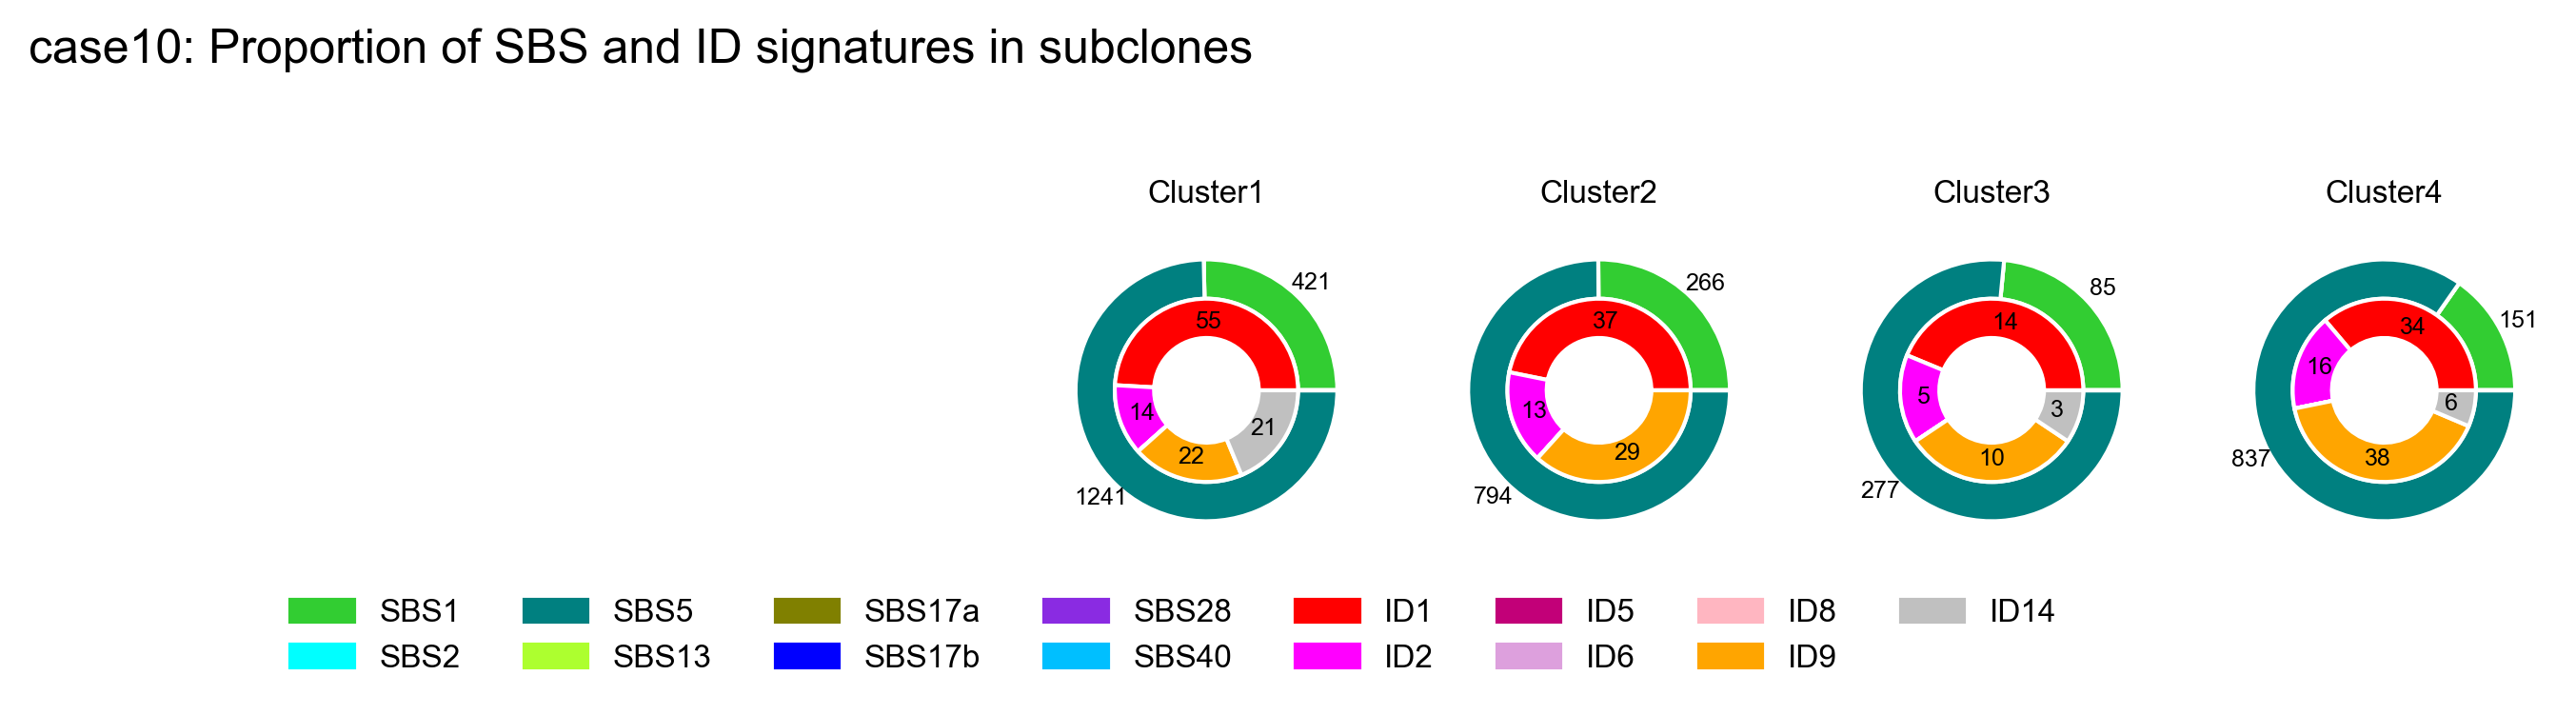

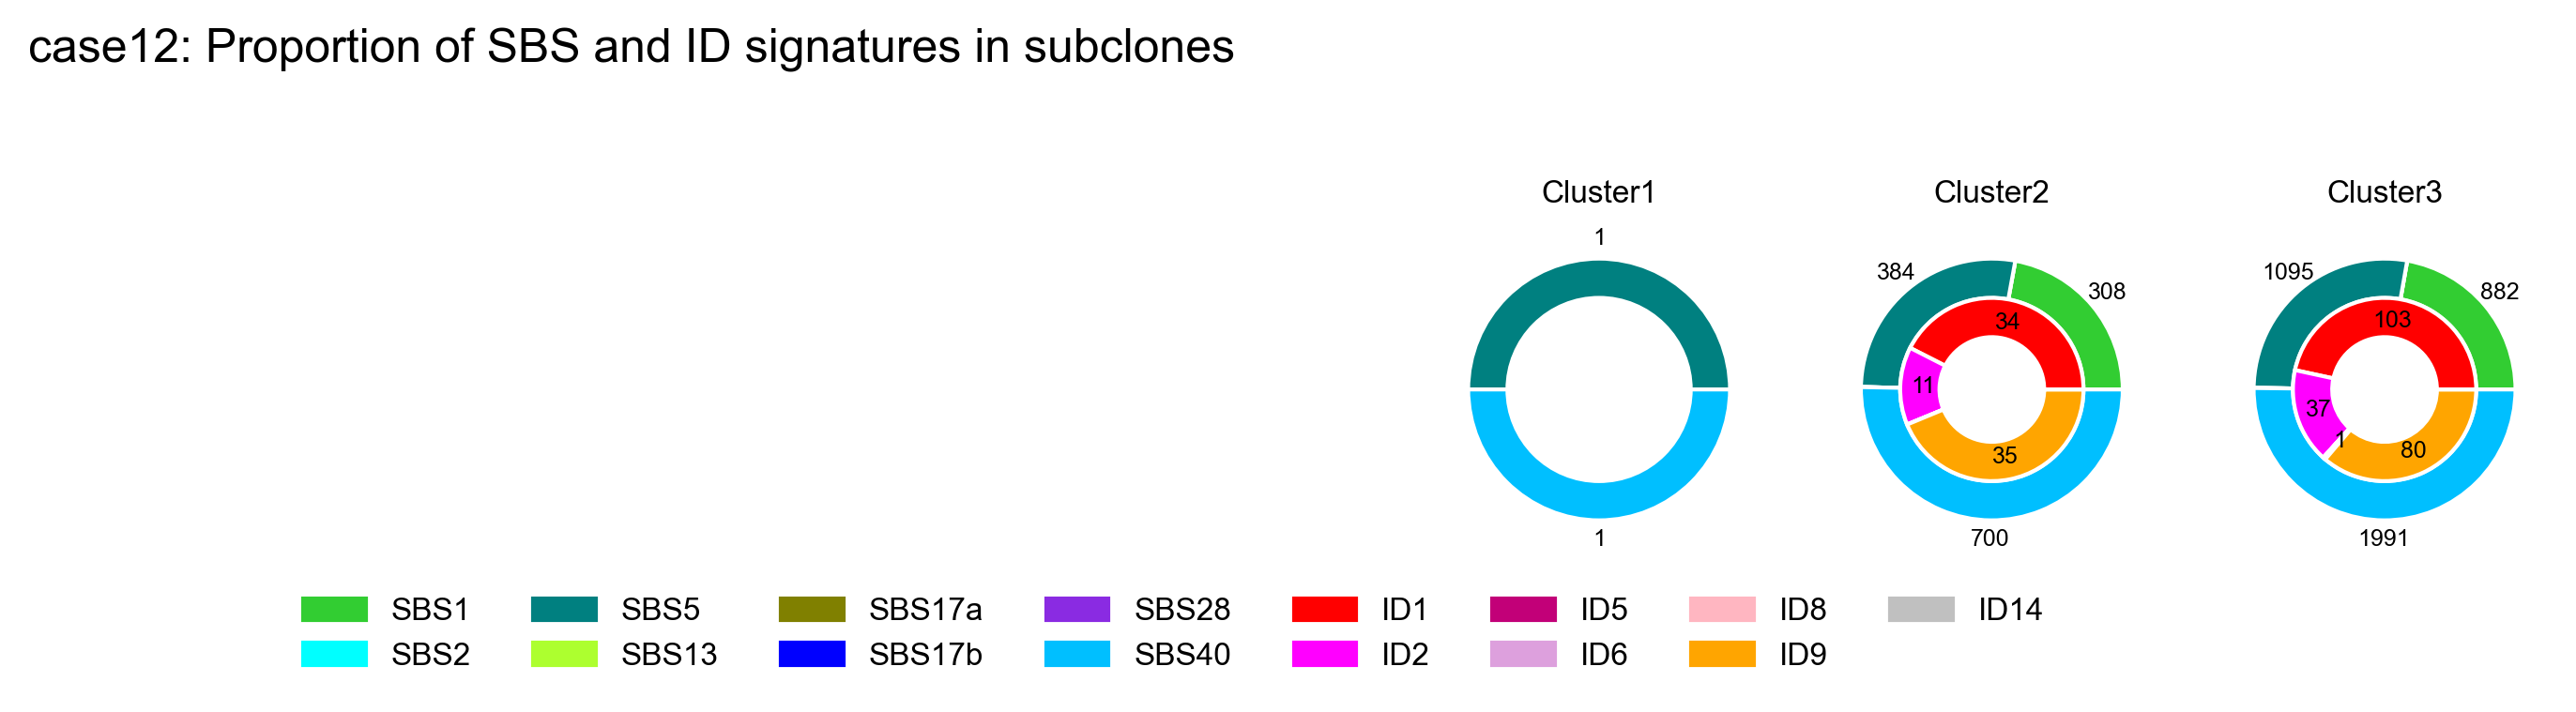

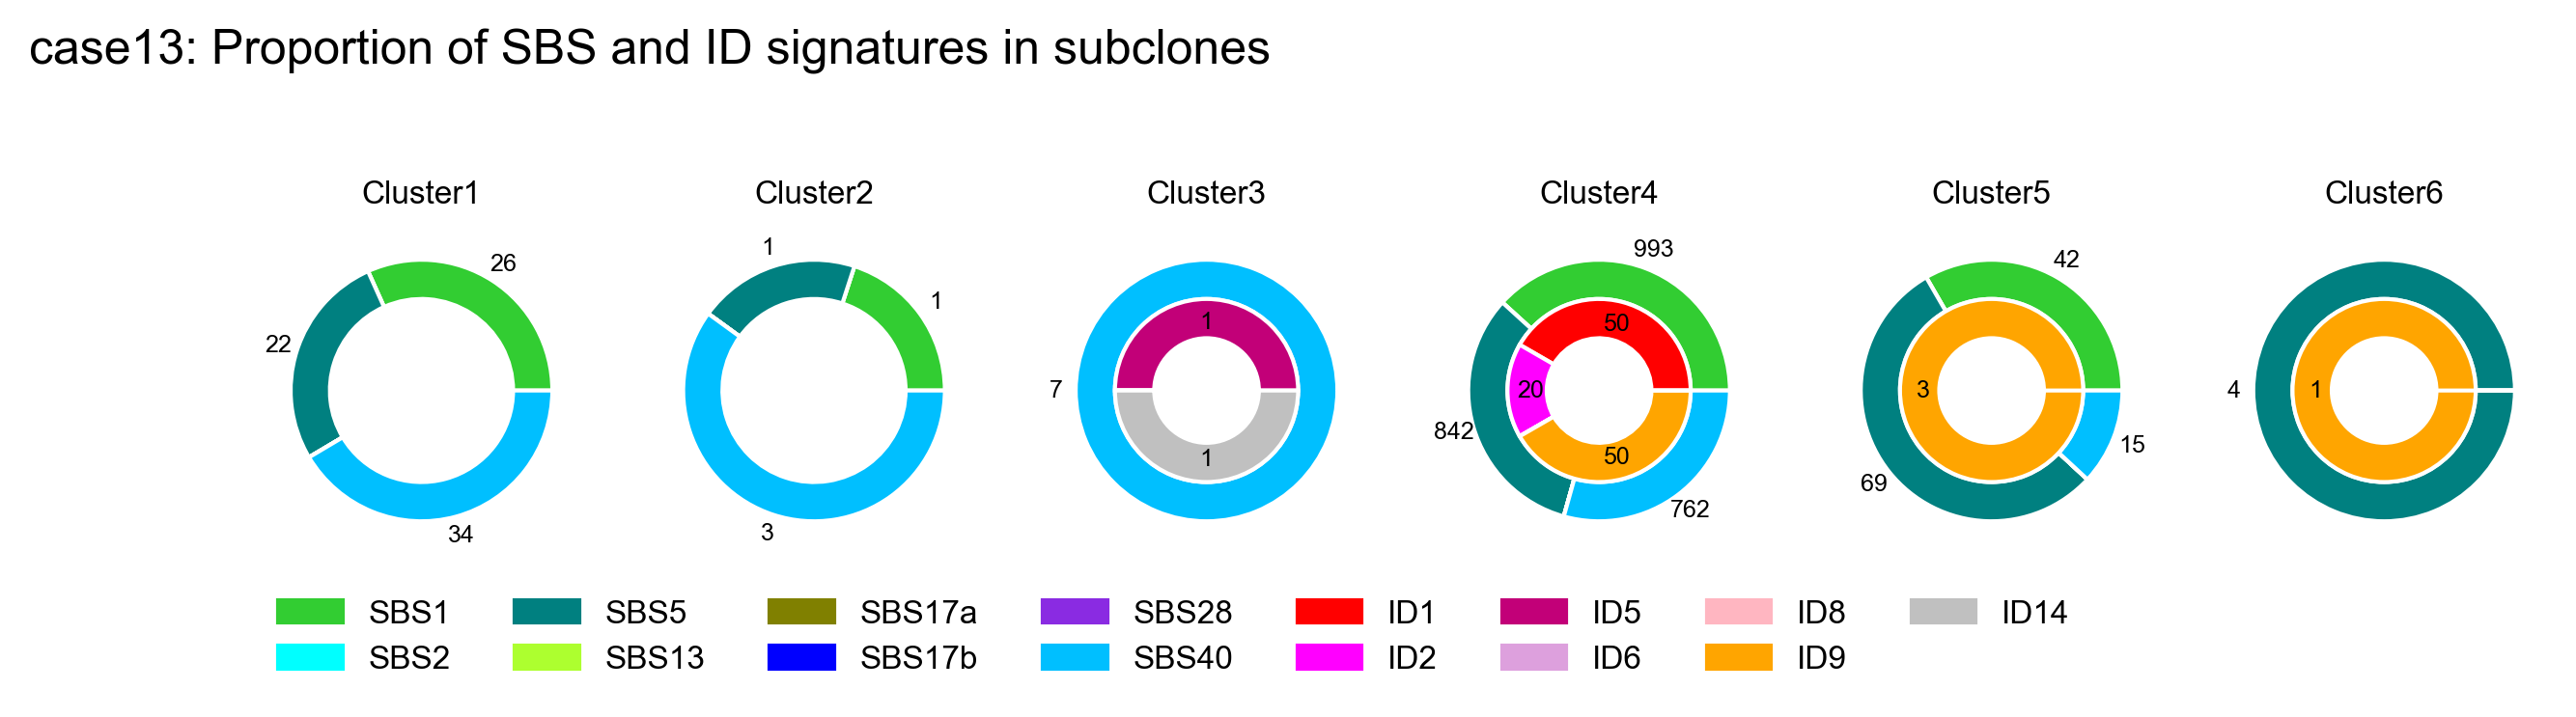

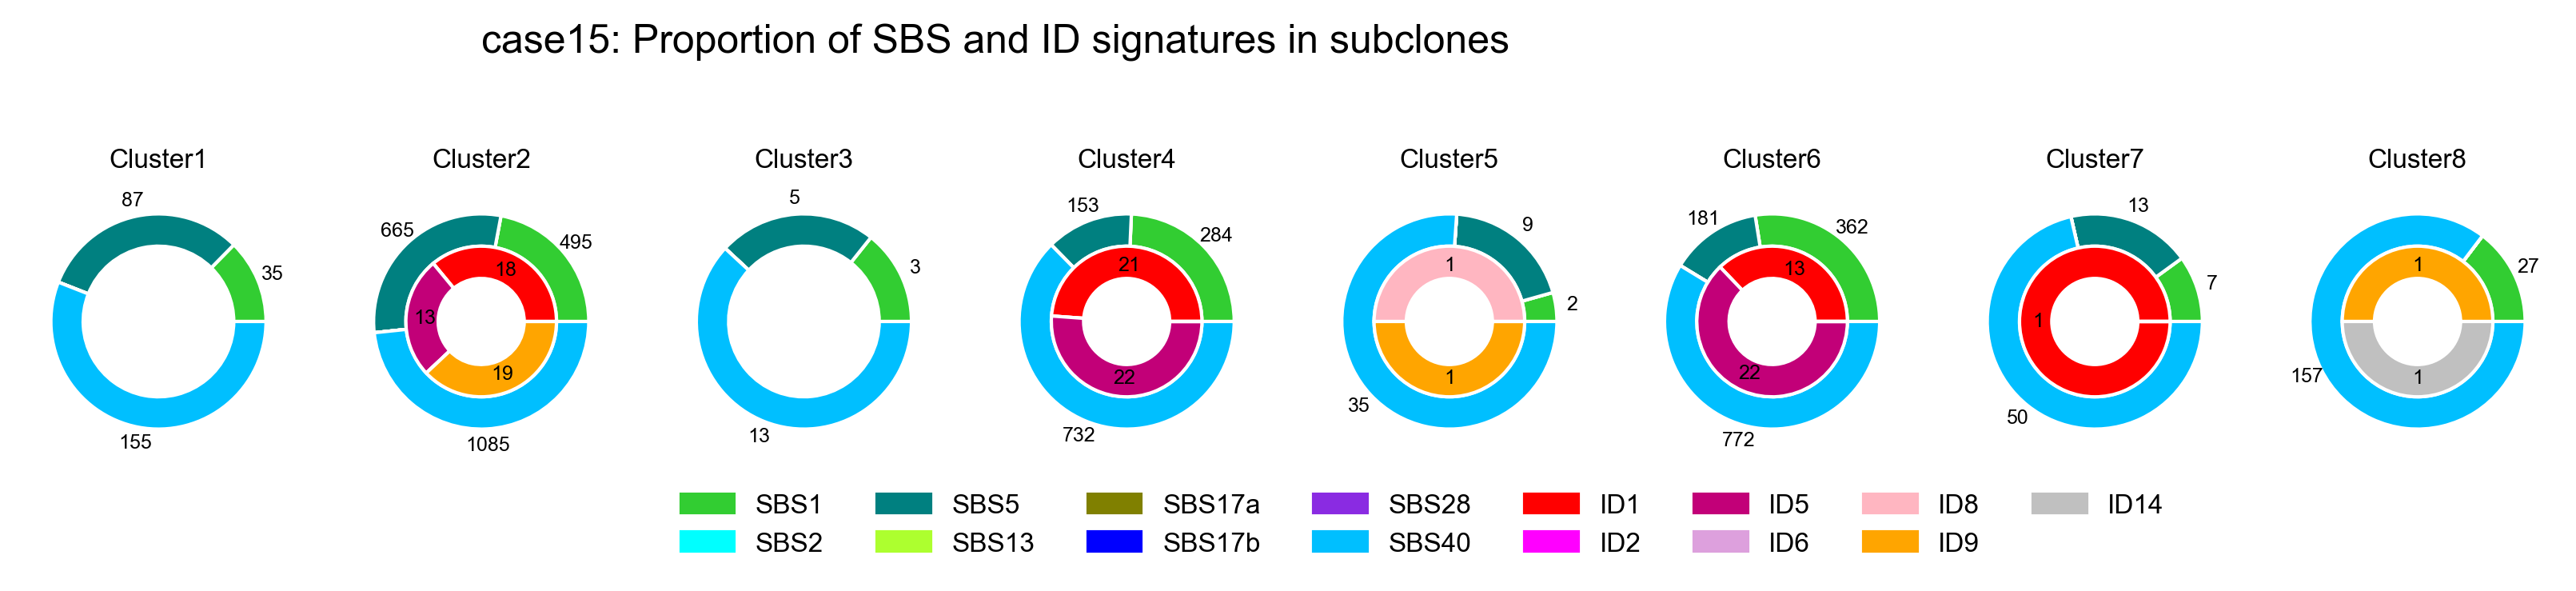

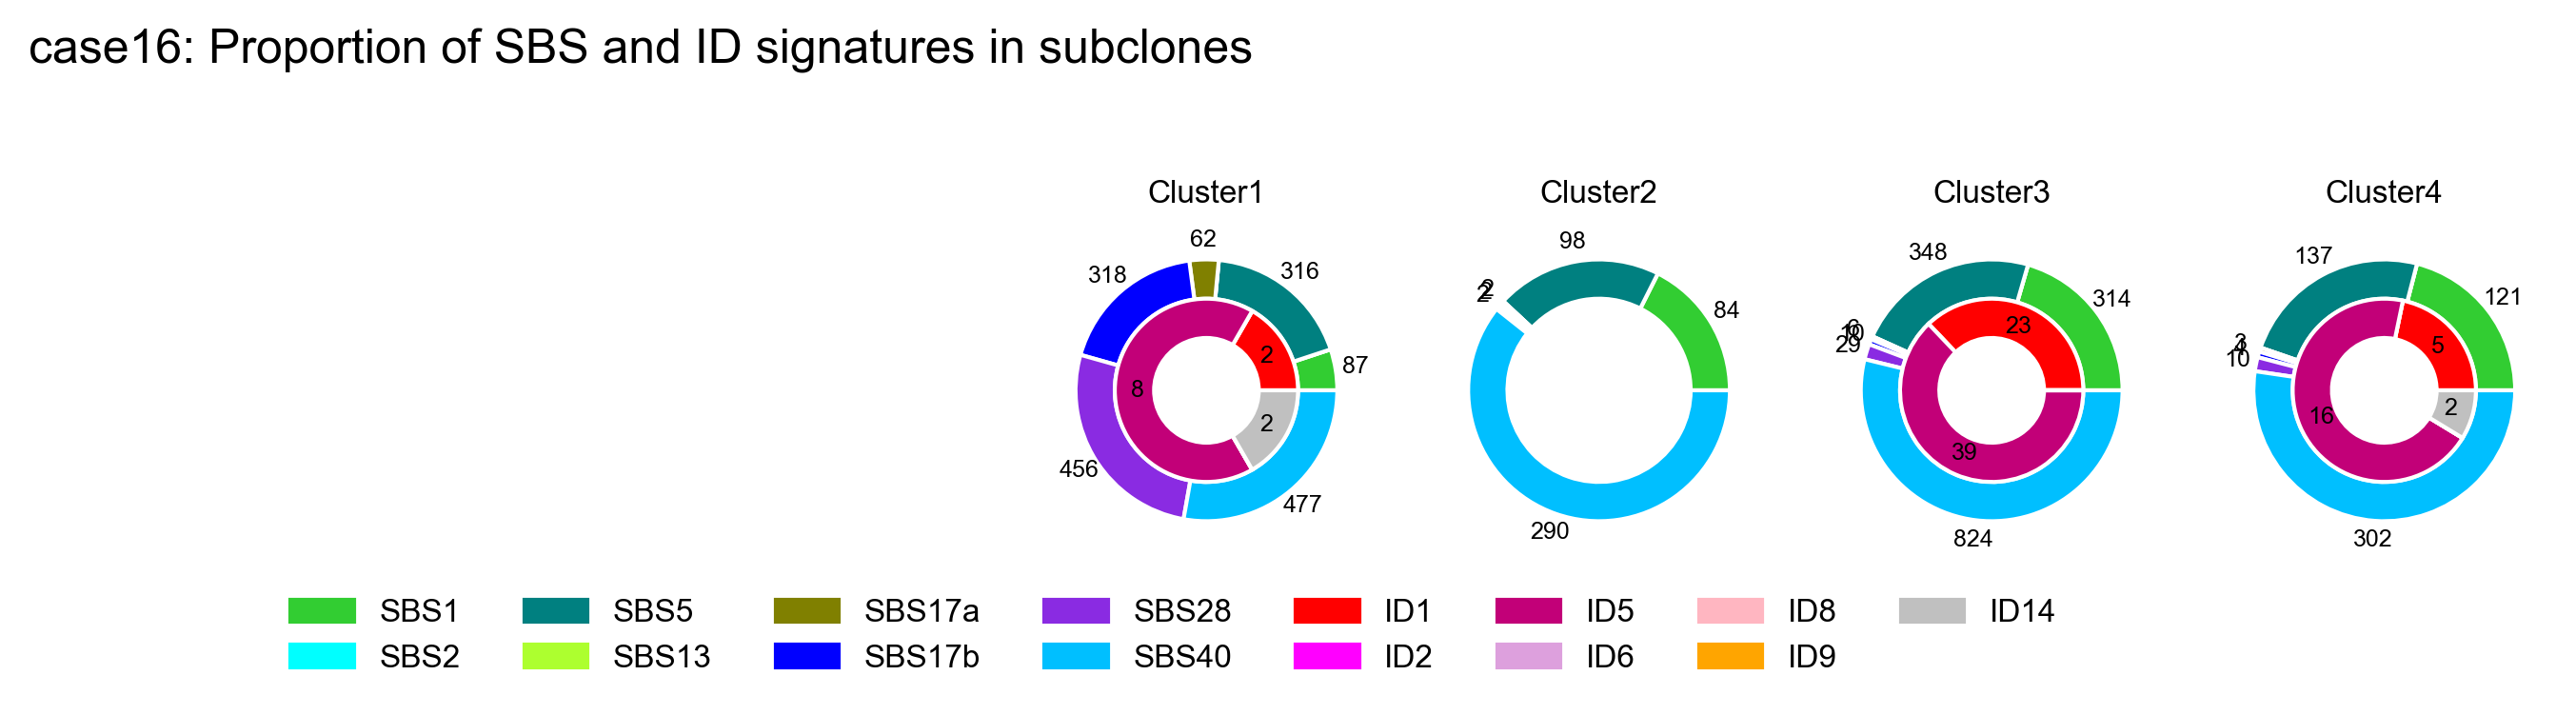

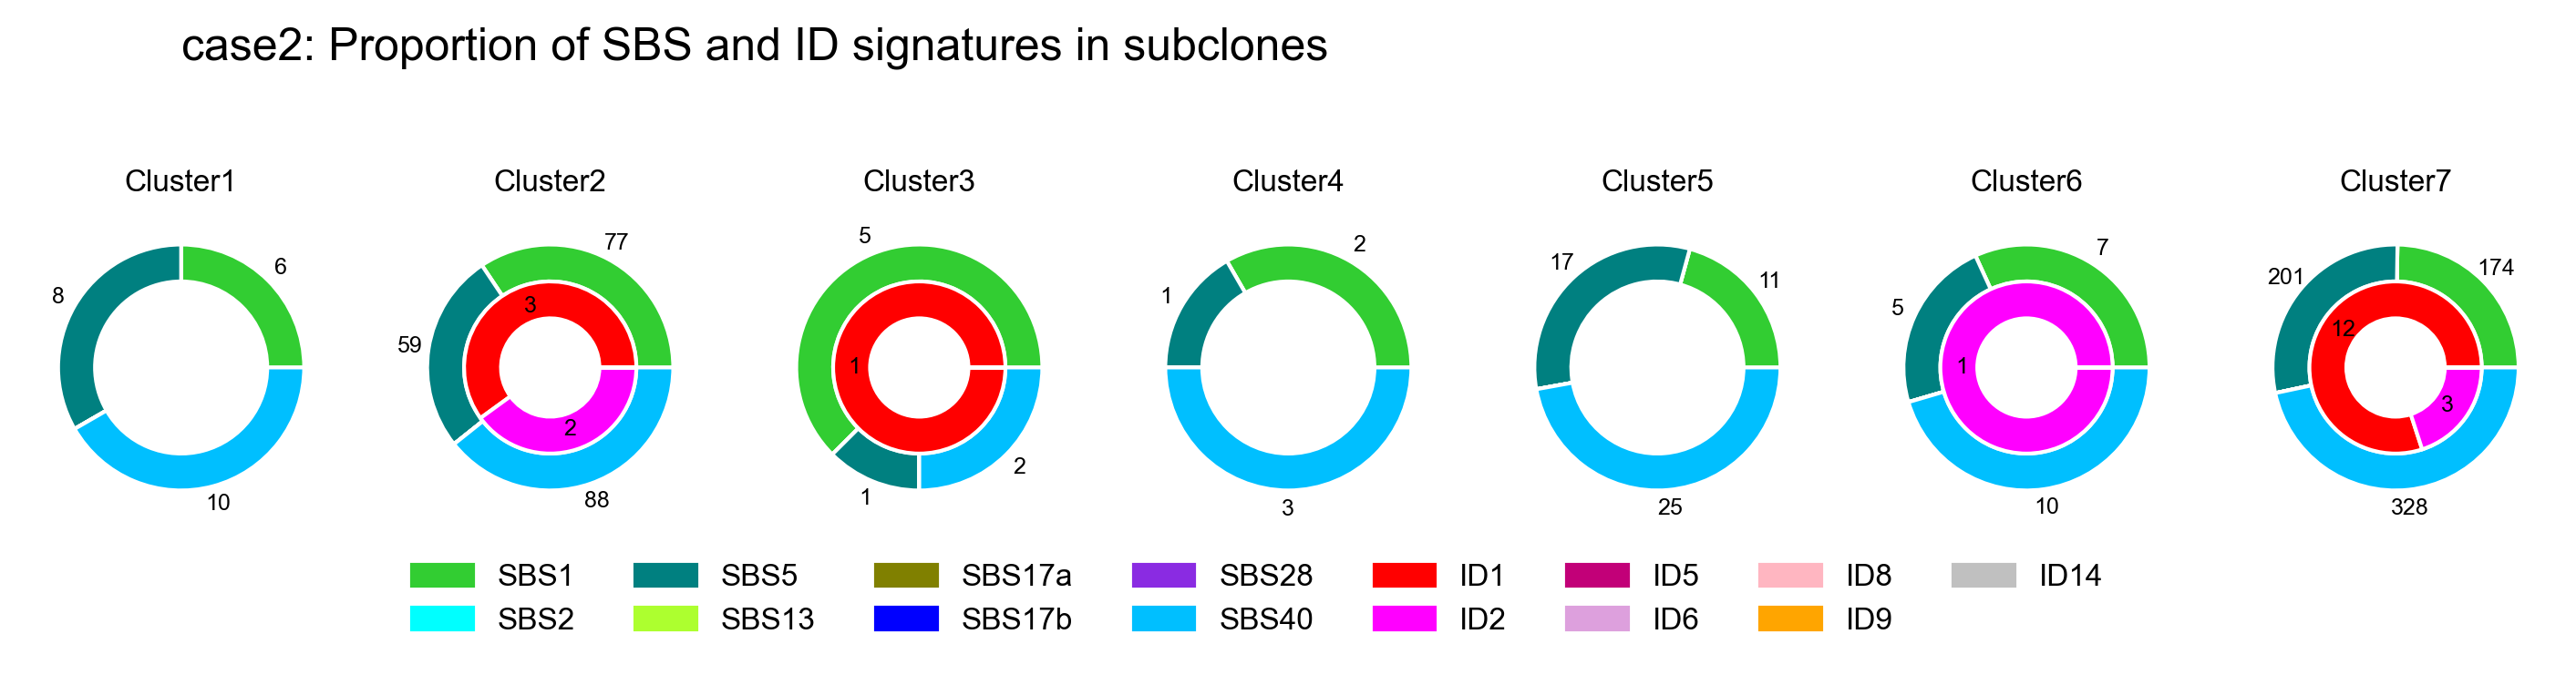

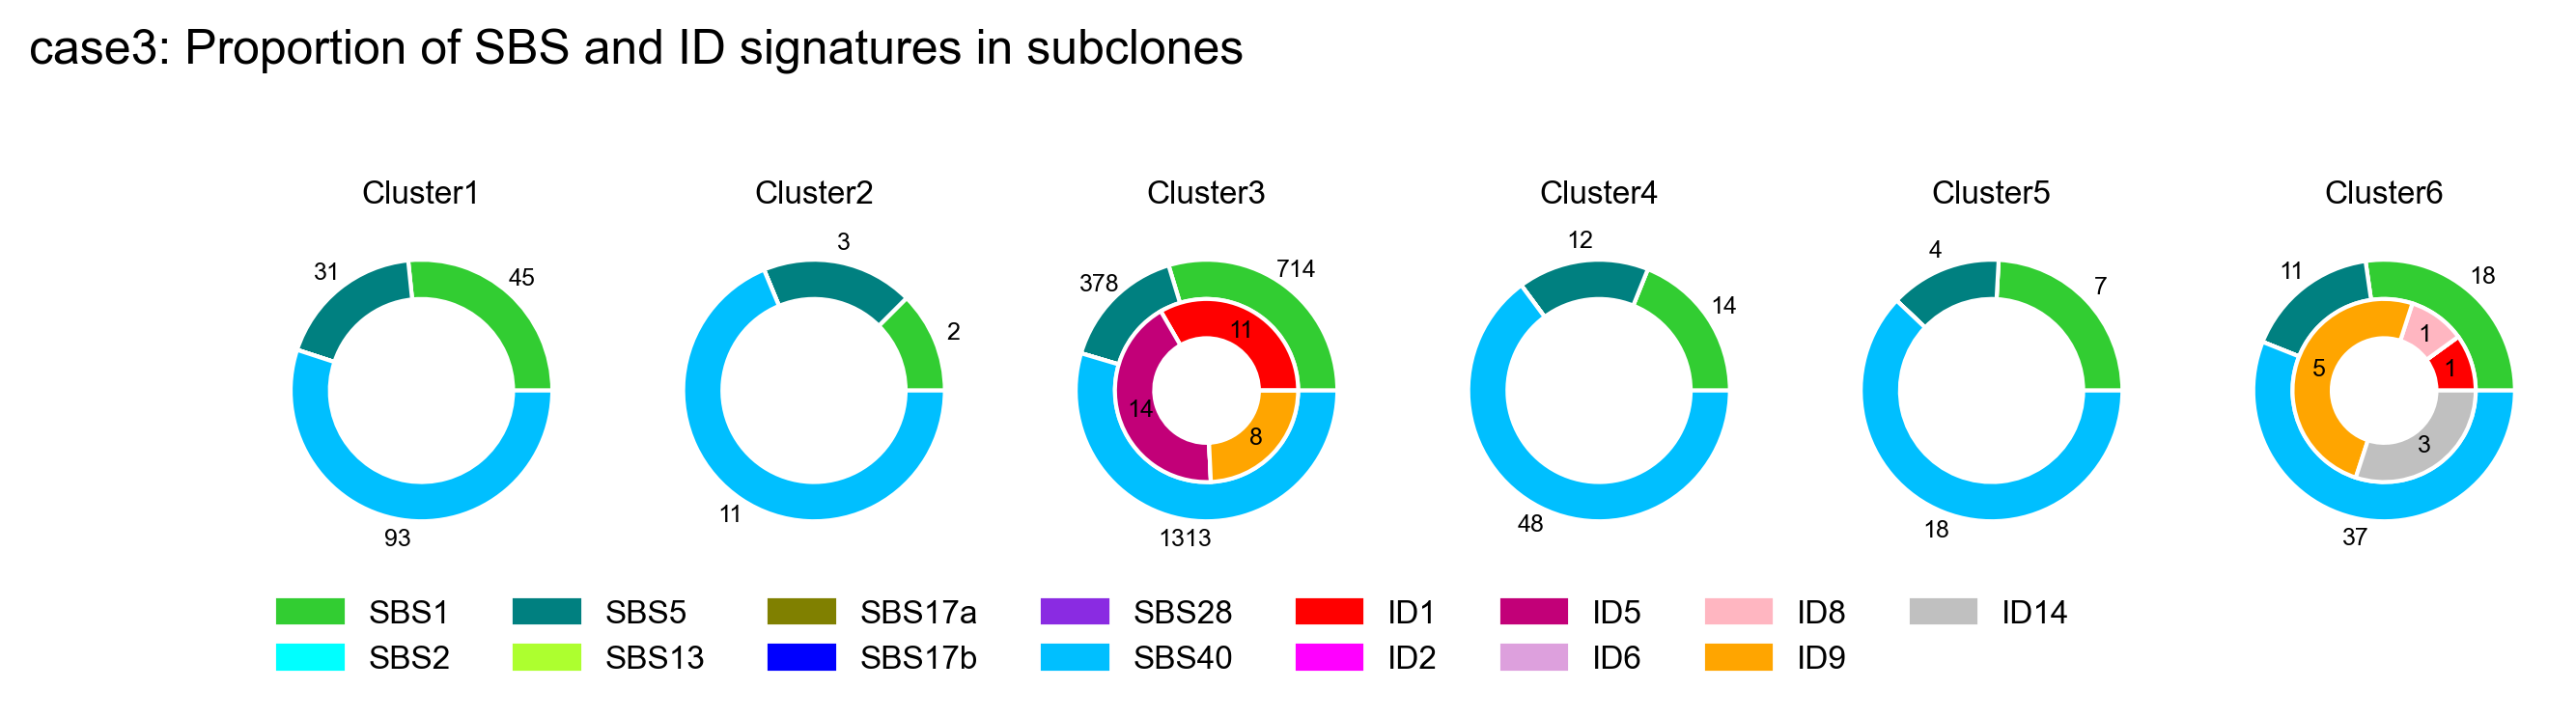

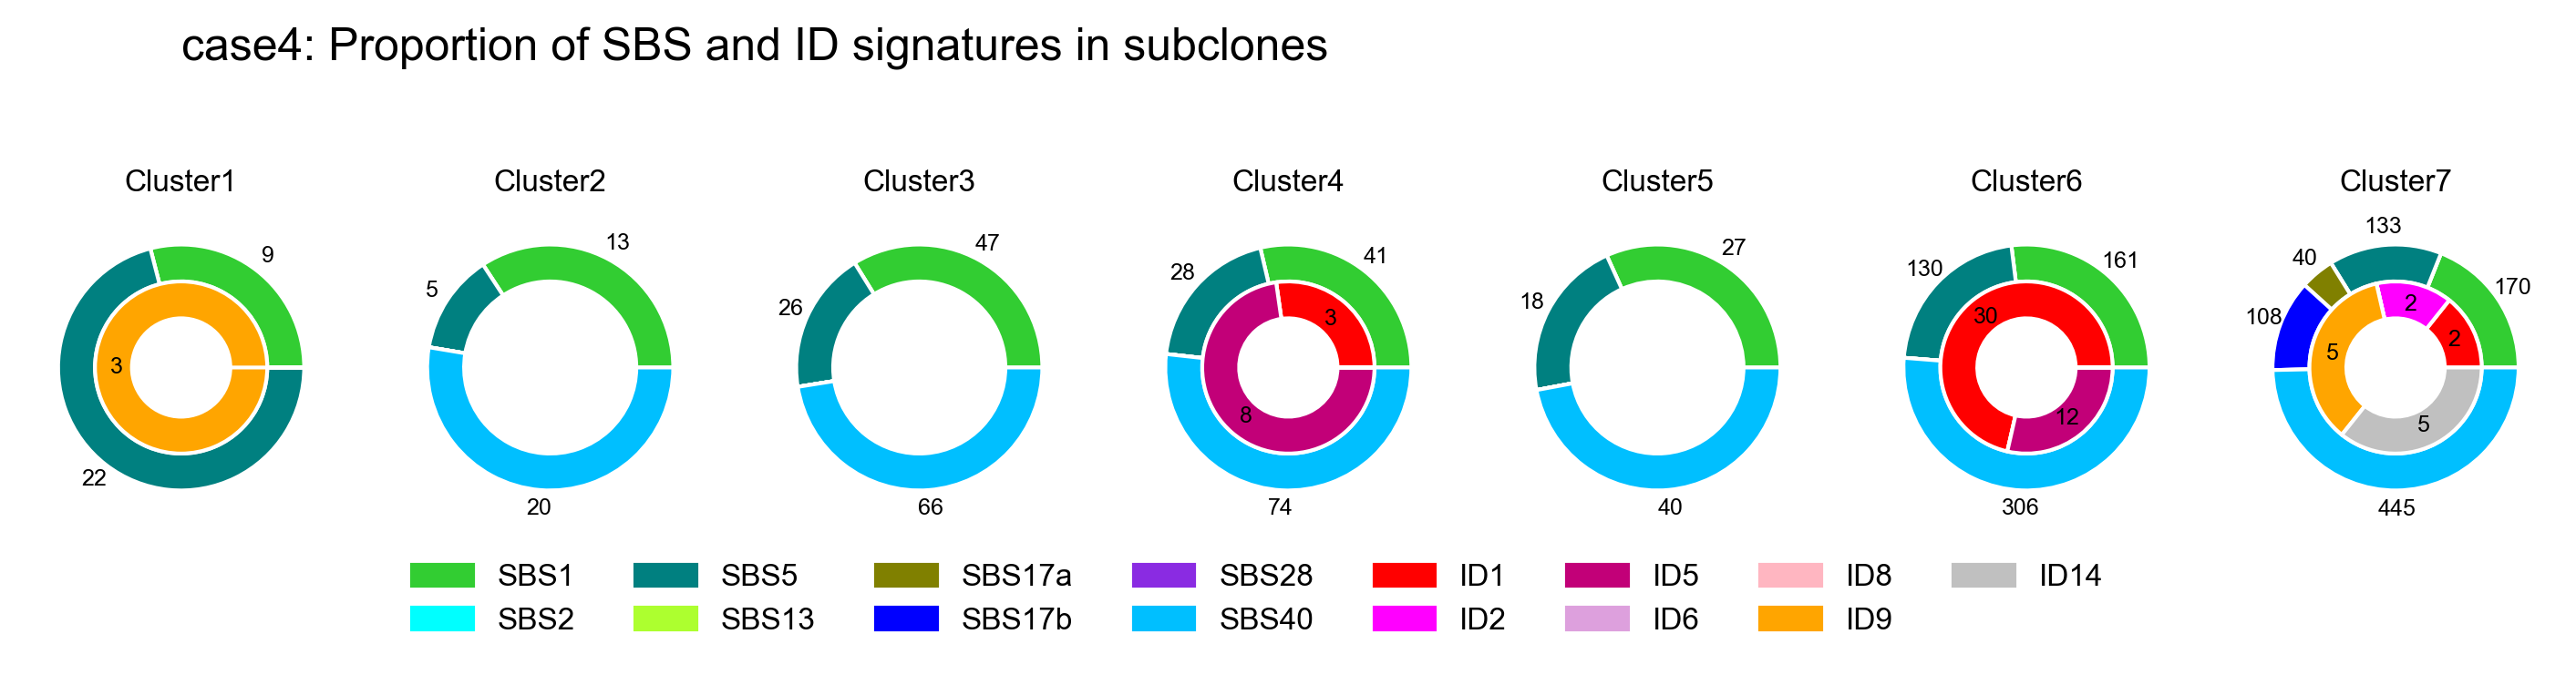

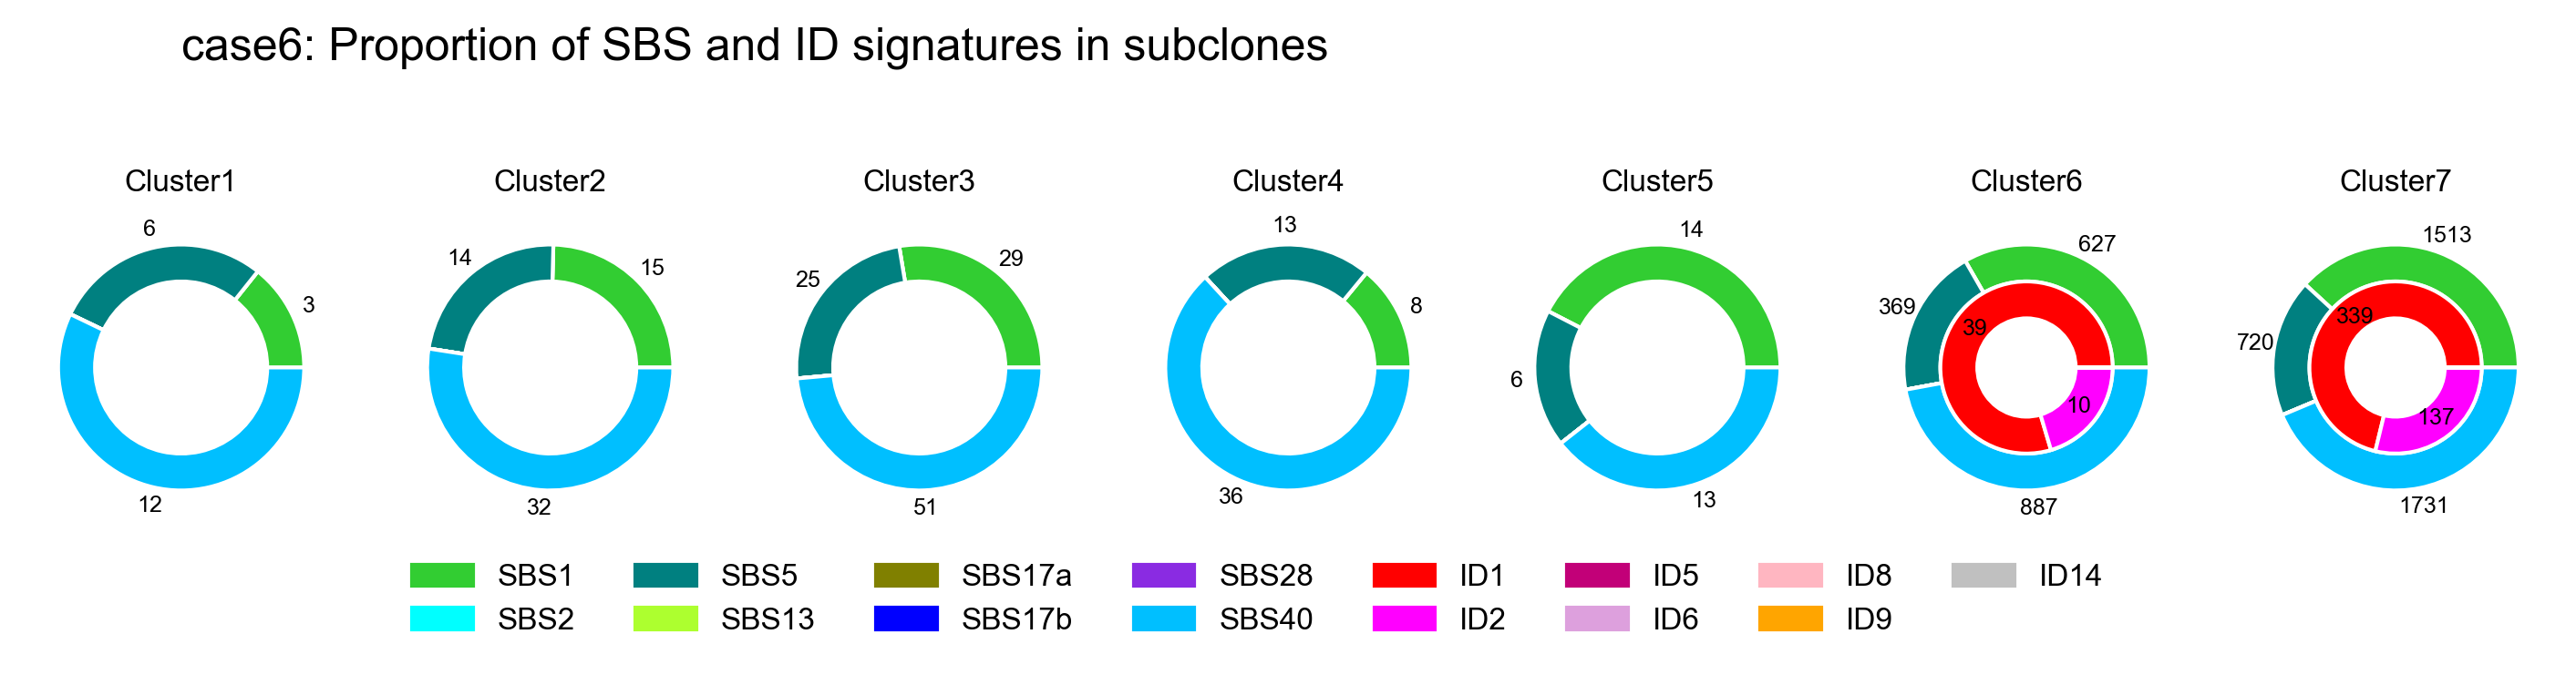

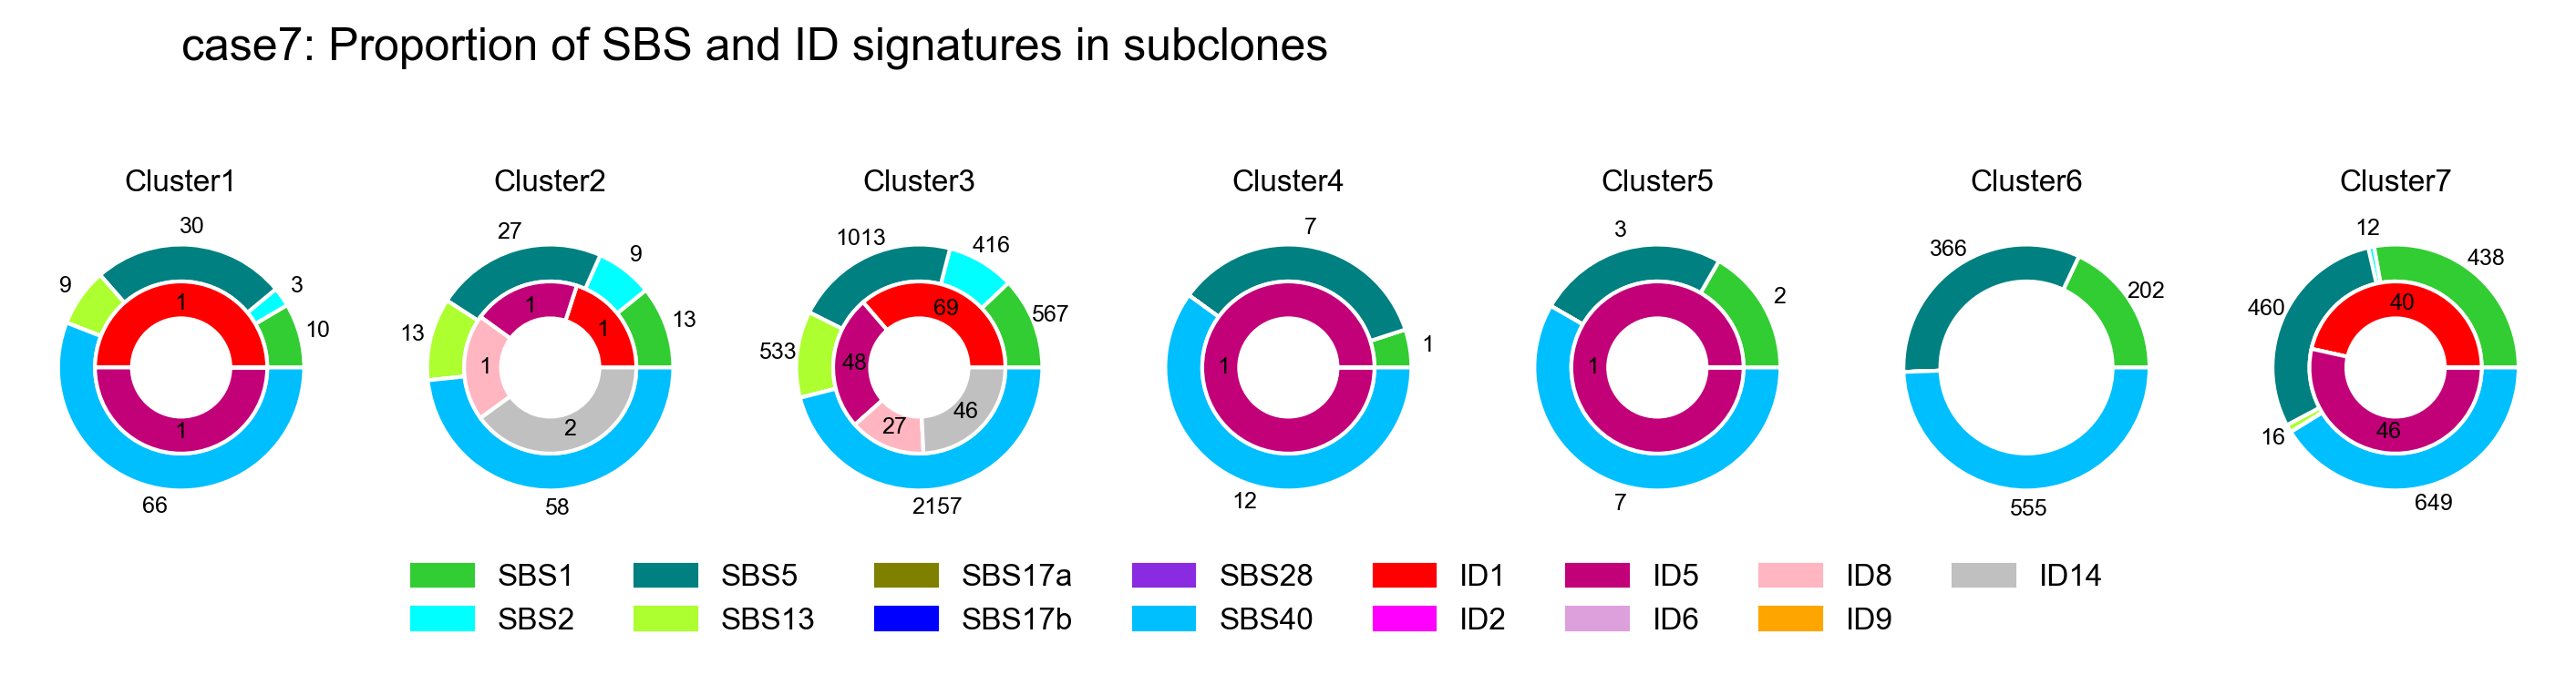

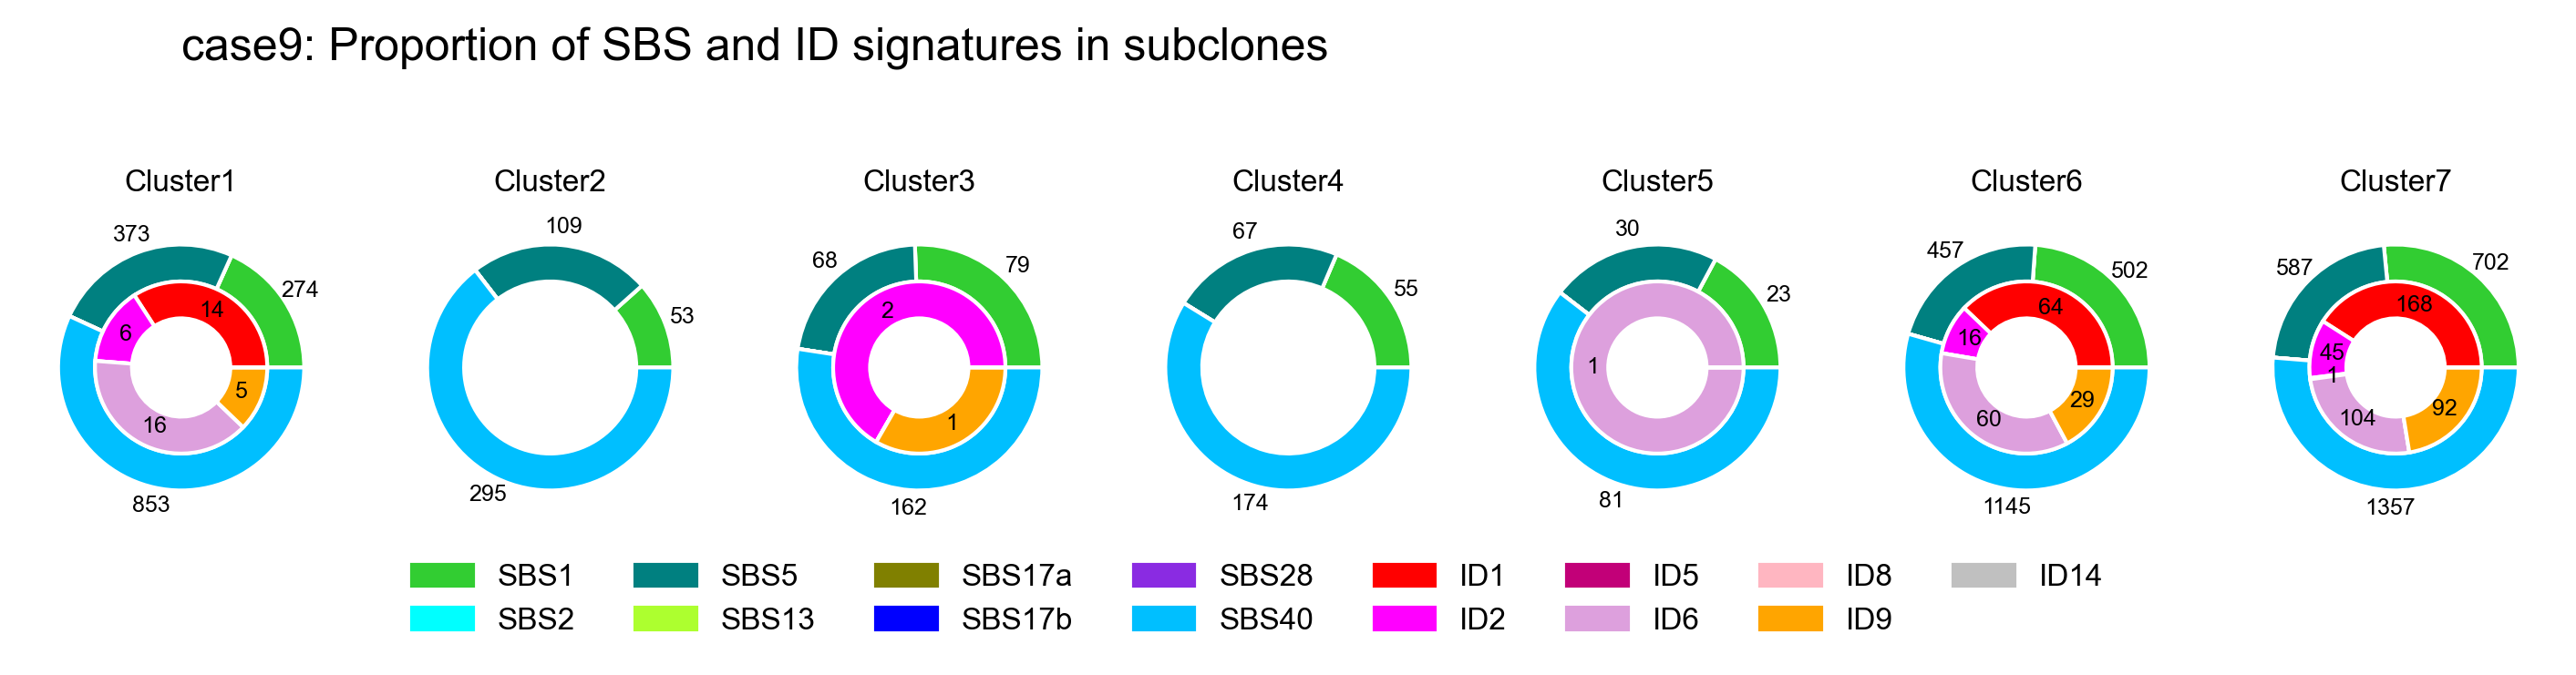

In [26]:
import os
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

#pd.options.mode.chained_assignment = None
from matplotlib import rcParams
plt.rcParams['figure.dpi'] = 300
rcParams['font.family'] = 'Arial'

os.chdir('/IPMNPDAC_WGS/Data/Data/sigDPC/step6SBS_ID_cluster4plot/')

#Helper function to display absolute numbers
def absolute_number(pct, all_vals):
    total = sum(all_vals)
    absolute = int(round(pct * total / 100.0))
    return f"{absolute}" if absolute > 0 else ''


for fn in glob('*_msDPC_SBS96_ID83.csv'):
    sbs_id = pd.read_csv(fn)
    caseID = fn.split('_')[0]
    clusterx = list(sbs_id.clusterNo)
    sig_labels = list(sbs_id)[1:]
    labels_outer = sig_labels[:7]
    labels_inner = sig_labels[7:]
    

    fig, ax = plt.subplots(1,sbs_id.shape[0], figsize=(1.7*sbs_id.shape[0], 1.7*sbs_id.shape[0]))
    #plt.subplots_adjust(wspace = 0.00, hspace= 0.2, bottom=0.12, right=0.99, top=0.99,left=0.005)

    ds=[]
    for i in range(sbs_id.shape[0]):
        x=sbs_id.iloc[[i]] 
        id83 = sbs_id.iloc[[i]].filter(regex=r'(ID[0-9])')
        sbs96 = sbs_id.iloc[[i]].filter(regex=r'(SBS[0-9])')
        testid = np.array(id83.iloc[0].values)
        testsbs = np.array(sbs96.iloc[0].values)
        ds.append(testid)
    
        size = 0.3

        outer_colors = ['limegreen','cyan','teal', 'greenyellow',
                    'olive', 'blue', 'blueviolet','deepskyblue']
        inner_colors = ['red','#FF00FF', '#C20078','#DDA0DD',
                        'lightpink', 'orange', 'silver']
    
        if testsbs.sum() > 0 :
            
            ax[i].pie(testsbs, radius=1, colors=outer_colors,
                      wedgeprops=dict(width=size, edgecolor='w'),
                      autopct=lambda pct: absolute_number(pct, testsbs.tolist()),
                      pctdistance=1.15,
                      textprops=dict(color='black', fontsize=6)) # number size
            if testid.sum() > 0:
                ax[i].pie(testid, radius=1-size, colors=inner_colors,
                          wedgeprops=dict(width=size, edgecolor='w'),
                          autopct=lambda pct: absolute_number(pct, testid.tolist()),
                          pctdistance=0.75,
                          textprops=dict(color='black', fontsize=6))
        else:
            if testid.sum() > 0:
                ax[i].pie(testid, radius=1-size, colors=inner_colors,
                          wedgeprops=dict(width=size, edgecolor='w'),
                          autopct=lambda pct: absolute_number(pct, testid.tolist()),
                          pctdistance=0.75,
                          textprops=dict(color='black', fontsize=6))
       
        #ax[i].set(title='Input cluster{}'.format(clusterx[i]))    
        ax[i].set_title('Cluster{}'.format(clusterx[i]),fontsize=8)
    allColor = outer_colors + inner_colors
    name_to_color = {name:color for name, color in zip(sig_labels, allColor)}
    handles = [plt.Rectangle((0, 0), 0, 0, color=name_to_color[name], label=name) for name in name_to_color]

    plt.legend(handles=handles, loc='upper center',  bbox_to_anchor=(-3.2, -0.05),
               fancybox=True, shadow=True, ncol=8, frameon=False, fontsize=8)

    #ax.set(aspect="equal", title='Pie plot with `ax.pie`')
    plt.text(-18, 2.5, '{}: Proportion of SBS and ID signatures in subclones'.format(caseID), fontsize = 12)
    plt.show();
    

# Assignment of SV (gene / driver) to Clustered Branches

In [40]:
%%writefile svClusterAssignment.py.py
import os
from glob import glob
import pandas as pd
import pyranges as pr

# a) function for SV matching cluster
def msClusterSV(msDPCdata, svdata, pathout):
    # 1) Load data
    caseMsDPC = pd.read_csv(msDPCdata)
    caseID = msDPCdata.split('/')[-1].split('_')[0]
    caseMsDPC['chrom'] = 'chr' + caseMsDPC['chr'].astype(str)
    caseMsDPC = caseMsDPC.rename(columns={"most.likely.cluster": "msCluster"})

    allsv = pd.read_csv(svdata)
    caseSV = allsv[allsv['samples'].str.contains(caseID)]

    # 2) Convert to PyRanges
     # SNV is a single base interval
    snv = pr.PyRanges(pd.DataFrame({"Chromosome": caseMsDPC['chrom'],"Start": caseMsDPC['pos'],"End": caseMsDPC['pos']+1,  
            "msCluster": caseMsDPC['msCluster']}))

    sv = pr.PyRanges(pd.DataFrame({"Chromosome": caseSV['CHROM'],"Start": caseSV['START'],"End": caseSV['END'],
                                   "typeTumorSample": caseSV['typeTumorSample'],"samples": caseSV['samples'],"SVLEN": caseSV['SVLEN'],
                                   "svclass": caseSV['svclass'],"CHR2": caseSV['CHR2'],"rgn": caseSV['rgn'],"gene": caseSV['gene'],
                                   "tid": caseSV['tid'],"PASS": caseSV['PASS']}))

    #3)  Perform overlap join (very fast C implementation)
    joined = snv.join(sv)
    # Convert back to pandas
    result = joined.df.rename(columns={"Start": "snvPos"})
    result.to_csv(f"{pathout}{caseID}_snvSVCluster.csv", index=False)

# b)Batch execution
def allFolderFileRun():
    pathinput = os.path.expanduser('/IPMNPDAC_WGS/Data/svDriverCluster/CasesCHROMposClusts/')
    sVdatapath = os.path.expanduser('/IPMNPDAC_WGS/Data/svDriverCluster/all41SVs.csv')
    outpathx = os.path.expanduser('/IPMNPDAC_WGS/Data/svDriverCluster/')
    for filex in glob(pathinput + '*_chrPosCluster.csv'):   
        msClusterSV(filex, sVdatapath, outpathx)
    
if __name__=="__main__":
    allFolderFileRun() 

Writing svClusterAssignment.py.py


# Assignment of CNV (gene-driver) to Clustered Branches

In [41]:
%%writefile cnvClusterAssignment.py
import os
import pandas as pd
import pyranges as pr

datapath = os.path.expanduser('/IPMNPDAC_WGS/Data/cnvDriverCluster/')

inputx = 'case16_pindelSNVmsDPC.csv'
outputx = 'case16_cnvDriverCluster.csv'

# CNV driver regions
[['hgnc_symbol','chromosome_name','start_position','end_position']]
CNVdriver = pd.read_csv(datapath + 'cnv_driversChrPos.csv')[['hgnc_symbol','chromosome_name','start_position','end_position']]
CNVdriver['chromosome_name'] = CNVdriver['chromosome_name'].astype(str)

# SNV clusters as intervals (start=end=pos)
clusterDf = pd.read_csv(datapath + inputx)[['chr', 'pos', 'most.likely.cluster']]
clusterDf['chr'] = clusterDf['chr'].astype(str)
clusterDf['start'] = clusterDf['pos']
clusterDf['end'] = clusterDf['pos'] + 1  # pyranges expects intervals

# Convert to PyRanges
gr_cnv = pr.PyRanges(CNVdriver.rename(columns={'chromosome_name':'Chromosome','start_position':'Start','end_position':'End'}))
gr_snv = pr.PyRanges(clusterDf.rename(columns={'chr':'Chromosome','start':'Start','end':'End'}))

# Find overlaps
overlaps = gr_snv.join(gr_cnv).df

# Add chr_pos field
overlaps['chr_pos'] = overlaps['Chromosome'].astype(str) + "_" + overlaps['pos'].astype(str)

# Save
overlaps.to_csv(datapath + outputx, index=False)


Writing cnvClusterAssignment.py
